In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib

In [16]:
#exel okuma
df = pd.read_excel("proje480/data2.xlsx")
df = df.select_dtypes(include = ["float64" , "int64"]) #datatype lardan sayısal değer olanları bastırdık
df

,TransactionID,TimeOfDay,RestaurantLatitude,RestaurantLongitude,TrafficMorning,TrafficNoon,TrafficAfternoon,DistanceKm,TimeMinutes,M1DeliveryCost,M2ExpectedDeliveryTime,M3MinChargeForOrdering,M3LogMinChargeForOrdering,M4NumberOfComments,M4LogNumberOfComments,M5DeliveryTimeFulfillment,M5Class,M6DeliveryCostPerKm,M6Class
0,17940,3,4.676156,-74.056414,1,1,1,4.6,16,0.0,45.0,9000.0,9.104980,0.0,NaN,29.0,1.0,0,1
1,13987,3,4.627211,-74.091024,1,2,1,7.2,17,3000.0,30.0,15000.0,9.615805,0.0,NaN,13.0,1.0,417,1
2,4111,1,4.627091,-74.075046,1,1,2,19.9,56,3000.0,40.0,15900.0,9.674074,45.0,3.806662,-16.0,0.0,151,1
3,17970,3,4.714166,-74.070364,1,2,2,13.3,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,10459,3,4.669250,-74.079962,2,2,2,7.9,21,NaN,55.0,5800.0,8.665613,34.0,3.526361,34.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,16803,2,4.686875,-74.074164,2,3,2,8.5,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
9945,14274,3,4.663448,-74.123920,1,1,1,13.7,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
9946,6945,2,4.598296,-74.075393,2,2,2,2.8,12,3000.0,40.0,5400.0,8.594154,58.0,4.060443,28.0,1.0,1071,1
9947,11464,3,4.643191,-74.122479,1,1,1,0.4,1,2000.0,45.0,10000.0,9.210340,4.0,1.386294,44.0,1.0,5000,0


In [17]:
!pip install missingno

<AxesSubplot:>

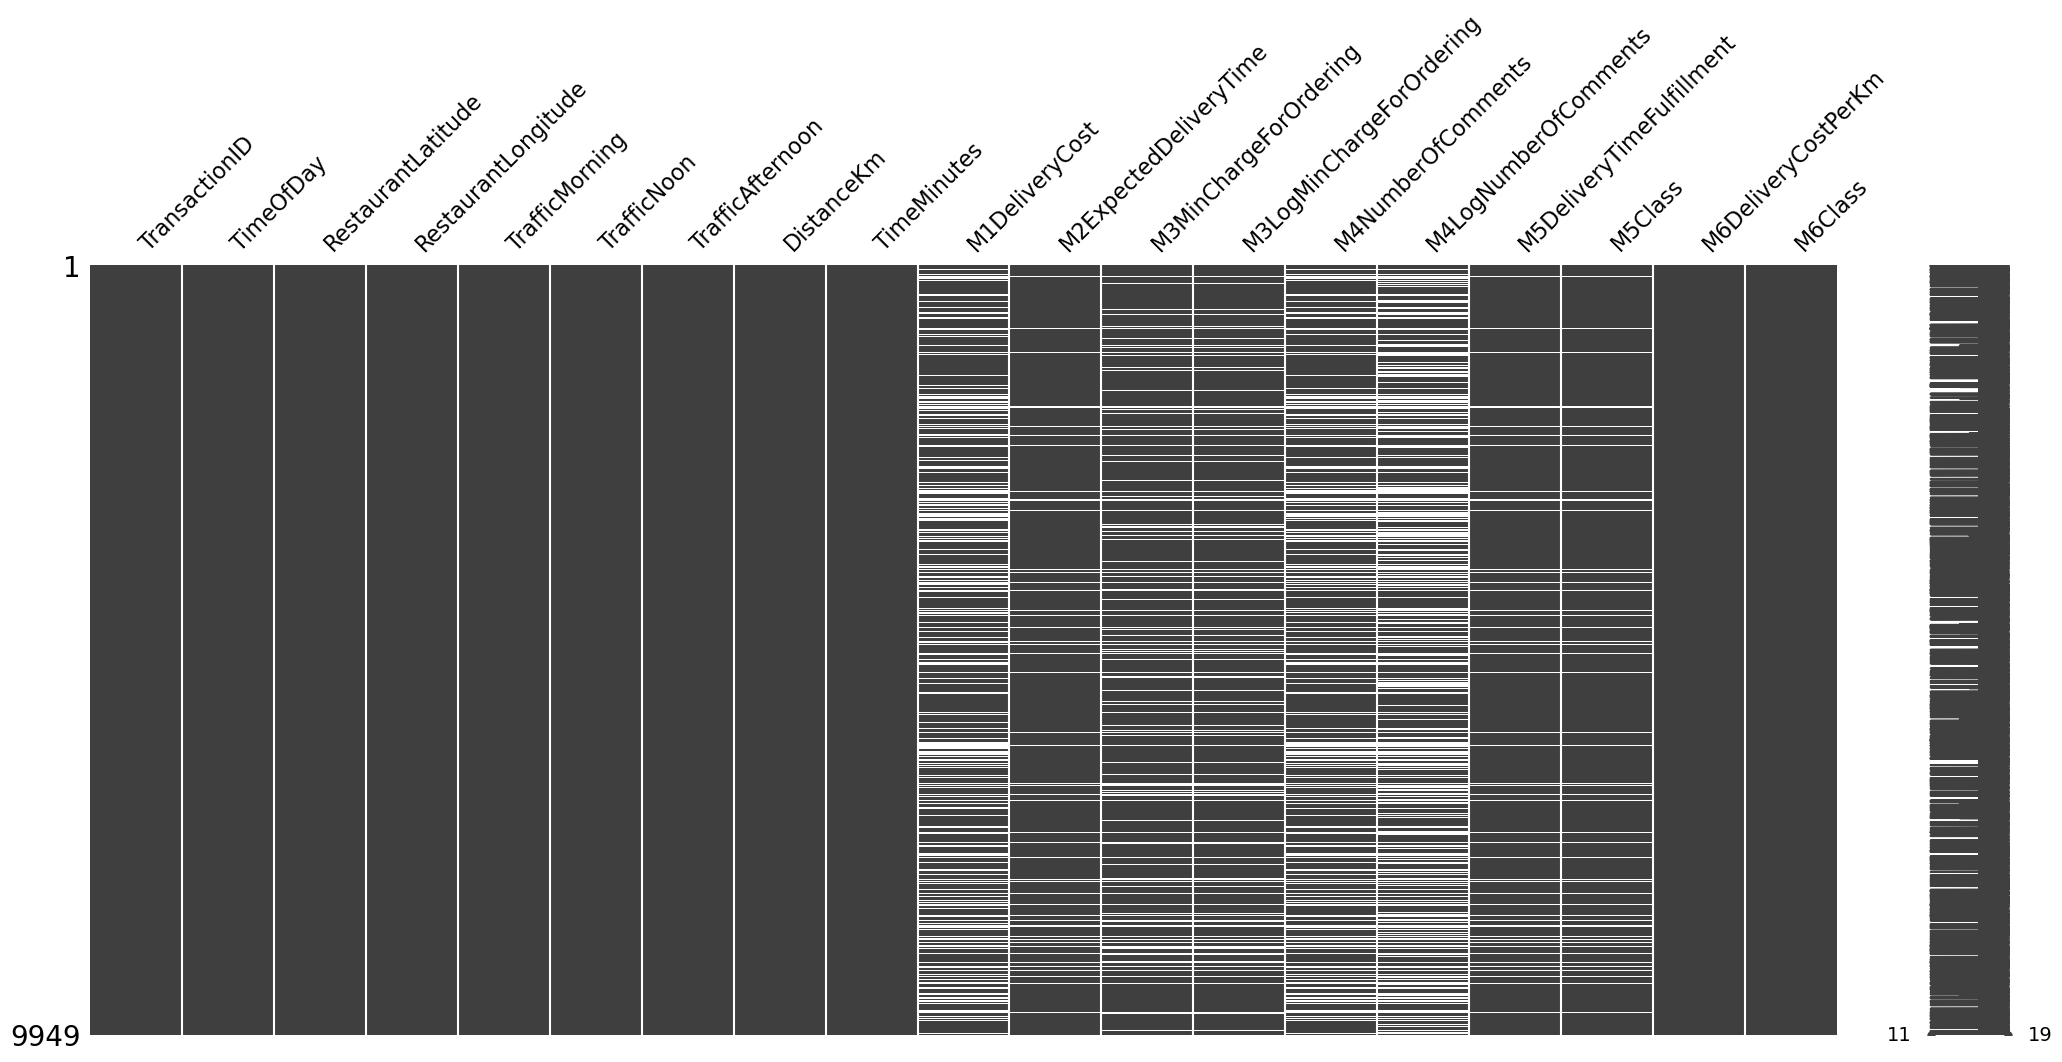

In [18]:
msno.matrix(df) #null değerler için

In [19]:
# NULL DEĞERLERİN DOLDURULMASI

In [20]:
df_M1DeliveryCost = df["M1DeliveryCost"]
df_M1DeliveryCost

0          0.0
1       3000.0
2       3000.0
3          NaN
4          NaN
         ...  
9944       NaN
9945       NaN
9946    3000.0
9947    2000.0
9948       NaN
Name: M1DeliveryCost, Length: 9949, dtype: float64

In [21]:
df_M1DeliveryCost.isnull().sum()  #total NaN sayısı

2895

In [22]:
null_index = df_M1DeliveryCost.isnull() #df deki NaN içeren değerlerin indeksi

In [23]:
null_index

0       False
1       False
2       False
3        True
4        True
        ...  
9944     True
9945     True
9946    False
9947    False
9948     True
Name: M1DeliveryCost, Length: 9949, dtype: bool

In [24]:
df_M1DeliveryCost[df_M1DeliveryCost.isnull()] #df deki NaN içeren değerler 

3      NaN
4      NaN
5      NaN
8      NaN
9      NaN
        ..
9937   NaN
9938   NaN
9944   NaN
9945   NaN
9948   NaN
Name: M1DeliveryCost, Length: 2895, dtype: float64

In [25]:
mean = np.mean(df_M1DeliveryCost)

In [26]:
mean

2591.7170399773177

In [27]:
standart_deviation = np.std(df_M1DeliveryCost)

In [28]:
standart_deviation

1396.4741958390846

In [29]:
#Interpolate in forward order across the column:
df_M1DeliveryCost.interpolate(method ='linear', limit_direction ='backward', inplace=True)
#Interpolate in forward order across the column:
df_M1DeliveryCost.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [30]:
df_M1DeliveryCost

0          0.000000
1       3000.000000
2       3000.000000
3       2750.000000
4       2500.000000
           ...     
9944    1666.666667
9945    2333.333333
9946    3000.000000
9947    2000.000000
9948    2000.000000
Name: M1DeliveryCost, Length: 9949, dtype: float64

In [31]:
df_M1DeliveryCost[null_index]

3       2750.000000
4       2500.000000
5       2250.000000
8       2833.333333
9       3166.666667
           ...     
9937    2250.000000
9938    1625.000000
9944    1666.666667
9945    2333.333333
9948    2000.000000
Name: M1DeliveryCost, Length: 2895, dtype: float64

<AxesSubplot:>

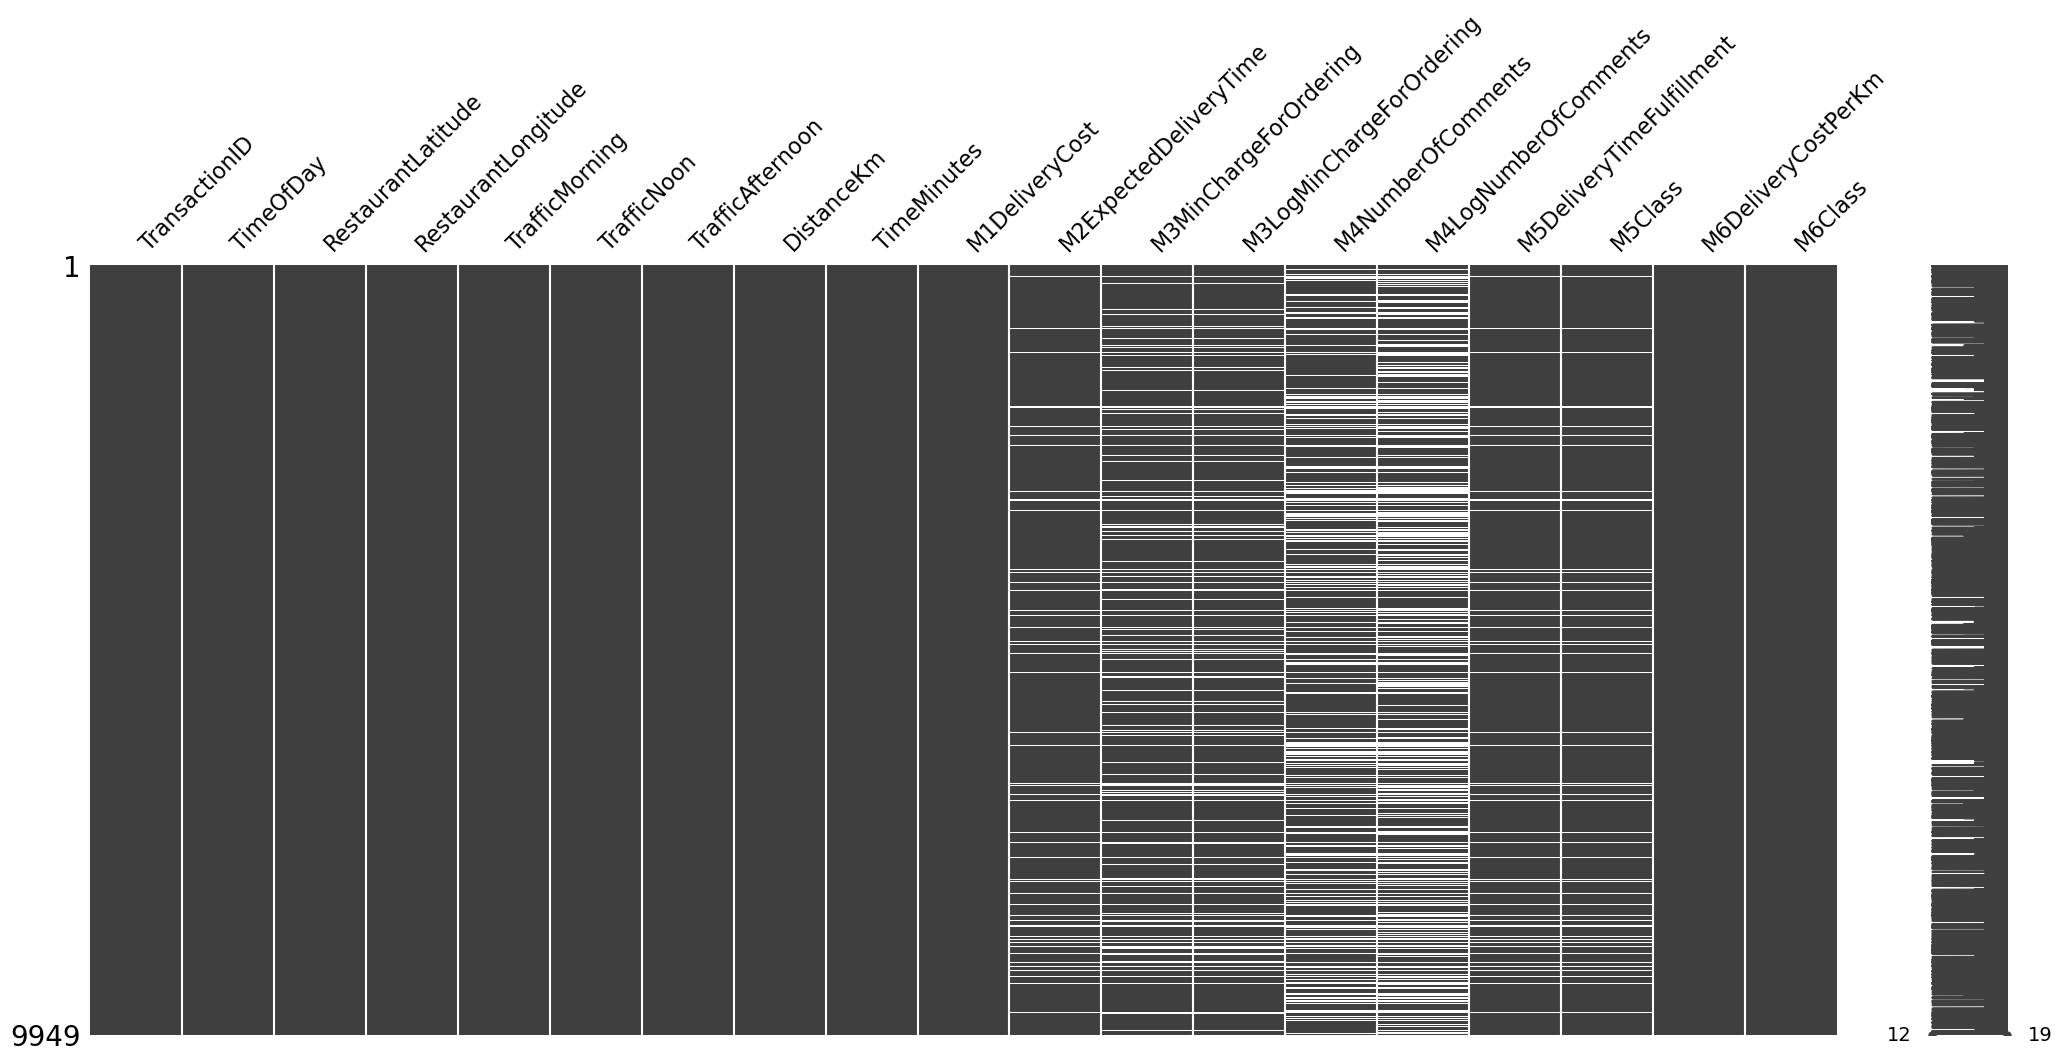

In [32]:
msno.matrix(df) #null değerler için

In [33]:
#----------------------------------------------------------------------------------------------

In [34]:
df_M2ExpectedDeliveryTime = df["M2ExpectedDeliveryTime"]
df_M2ExpectedDeliveryTime

0       45.0
1       30.0
2       40.0
3        NaN
4       55.0
        ... 
9944     NaN
9945     NaN
9946    40.0
9947    45.0
9948    45.0
Name: M2ExpectedDeliveryTime, Length: 9949, dtype: float64

In [35]:
df_M2ExpectedDeliveryTime.isnull().sum()  #total NaN sayısı

725

In [36]:
null_index = df_M2ExpectedDeliveryTime.isnull() #df deki NaN içeren değerlerin indeksi

In [37]:
null_index

0       False
1       False
2       False
3        True
4       False
        ...  
9944     True
9945     True
9946    False
9947    False
9948    False
Name: M2ExpectedDeliveryTime, Length: 9949, dtype: bool

In [38]:
df_M2ExpectedDeliveryTime[df_M2ExpectedDeliveryTime.isnull()] #df deki NaN içeren değerler 

3      NaN
9      NaN
13     NaN
17     NaN
24     NaN
        ..
9900   NaN
9908   NaN
9928   NaN
9944   NaN
9945   NaN
Name: M2ExpectedDeliveryTime, Length: 725, dtype: float64

In [39]:
#Interpolate in forward order across the column:
df_M2ExpectedDeliveryTime.interpolate(method ='linear', limit_direction ='backward', inplace=True)
#Interpolate in forward order across the column:
df_M2ExpectedDeliveryTime.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [40]:
df_M2ExpectedDeliveryTime

0       45.000000
1       30.000000
2       40.000000
3       47.500000
4       55.000000
          ...    
9944    33.333333
9945    36.666667
9946    40.000000
9947    45.000000
9948    45.000000
Name: M2ExpectedDeliveryTime, Length: 9949, dtype: float64

In [41]:
df_M2ExpectedDeliveryTime[null_index]

3       47.500000
9       42.500000
13      52.500000
17      50.000000
24      45.000000
          ...    
9900    42.500000
9908    17.500000
9928    45.000000
9944    33.333333
9945    36.666667
Name: M2ExpectedDeliveryTime, Length: 725, dtype: float64

<AxesSubplot:>

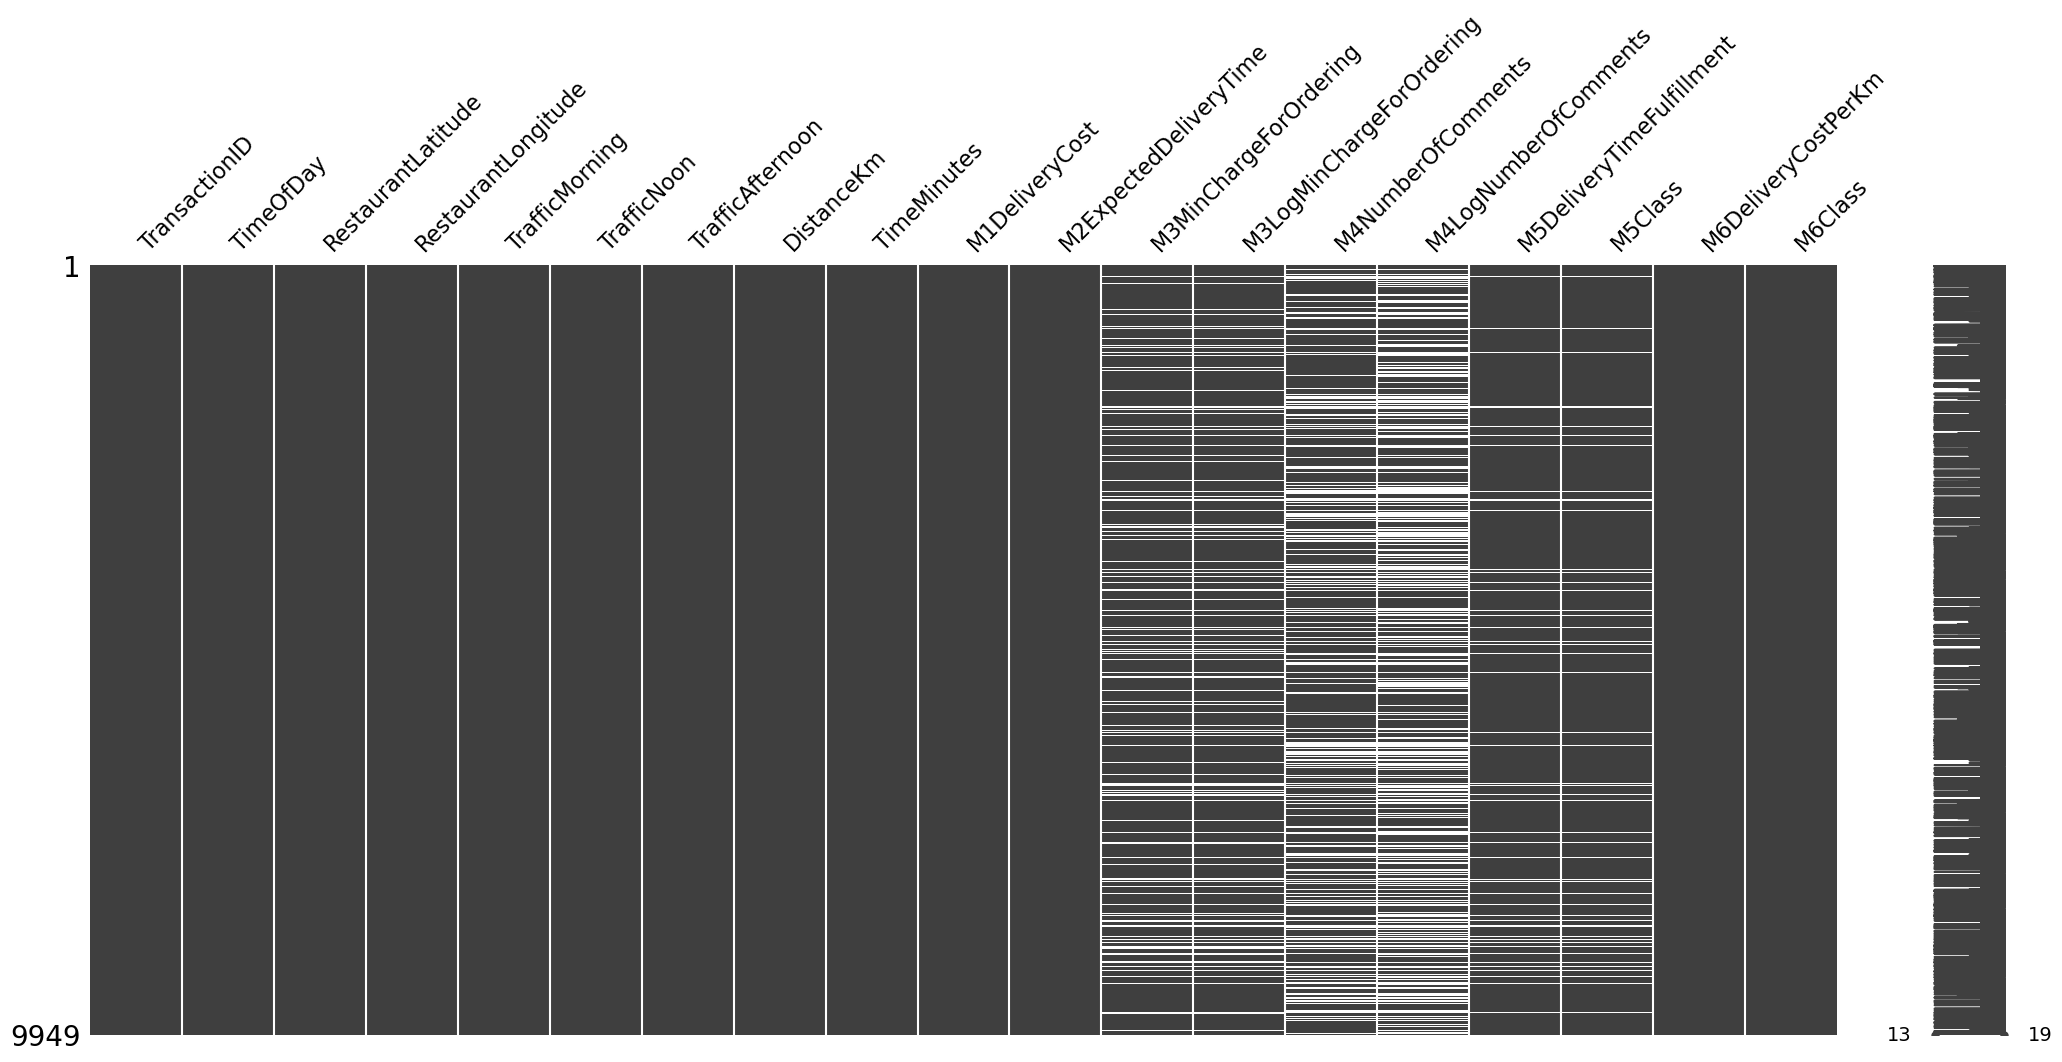

In [42]:
msno.matrix(df) #null değerler için

In [43]:
#--------------------------------------------------------------------

In [44]:

df_M3MinChargeForOrdering = df["M3MinChargeForOrdering"]
df_M3MinChargeForOrdering

0        9000.0
1       15000.0
2       15900.0
3           NaN
4        5800.0
         ...   
9944        NaN
9945        NaN
9946     5400.0
9947    10000.0
9948    10000.0
Name: M3MinChargeForOrdering, Length: 9949, dtype: float64

In [45]:
df_M3MinChargeForOrdering.isnull().sum()  #total NaN sayısı

1553

In [46]:
null_index = df_M3MinChargeForOrdering.isnull() #df deki NaN içeren değerlerin indeksi

In [47]:
null_index

0       False
1       False
2       False
3        True
4       False
        ...  
9944     True
9945     True
9946    False
9947    False
9948    False
Name: M3MinChargeForOrdering, Length: 9949, dtype: bool

In [48]:
df_M3MinChargeForOrdering[df_M3MinChargeForOrdering.isnull()] #df deki NaN içeren değerler 

3      NaN
9      NaN
13     NaN
17     NaN
24     NaN
        ..
9921   NaN
9922   NaN
9928   NaN
9944   NaN
9945   NaN
Name: M3MinChargeForOrdering, Length: 1553, dtype: float64

In [49]:
#Interpolate in forward order across the column:
df_M3MinChargeForOrdering.interpolate(method ='linear', limit_direction ='backward', inplace=True)
#Interpolate in forward order across the column:
df_M3MinChargeForOrdering.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [50]:
df_M3MinChargeForOrdering

0        9000.000000
1       15000.000000
2       15900.000000
3       10850.000000
4        5800.000000
            ...     
9944     7466.666667
9945     6433.333333
9946     5400.000000
9947    10000.000000
9948    10000.000000
Name: M3MinChargeForOrdering, Length: 9949, dtype: float64

In [51]:
df_M3MinChargeForOrdering[null_index]

3       10850.000000
9       10000.000000
13      17500.000000
17      12950.000000
24      10000.000000
            ...     
9921    12966.666667
9922    10933.333333
9928    10000.000000
9944     7466.666667
9945     6433.333333
Name: M3MinChargeForOrdering, Length: 1553, dtype: float64

<AxesSubplot:>

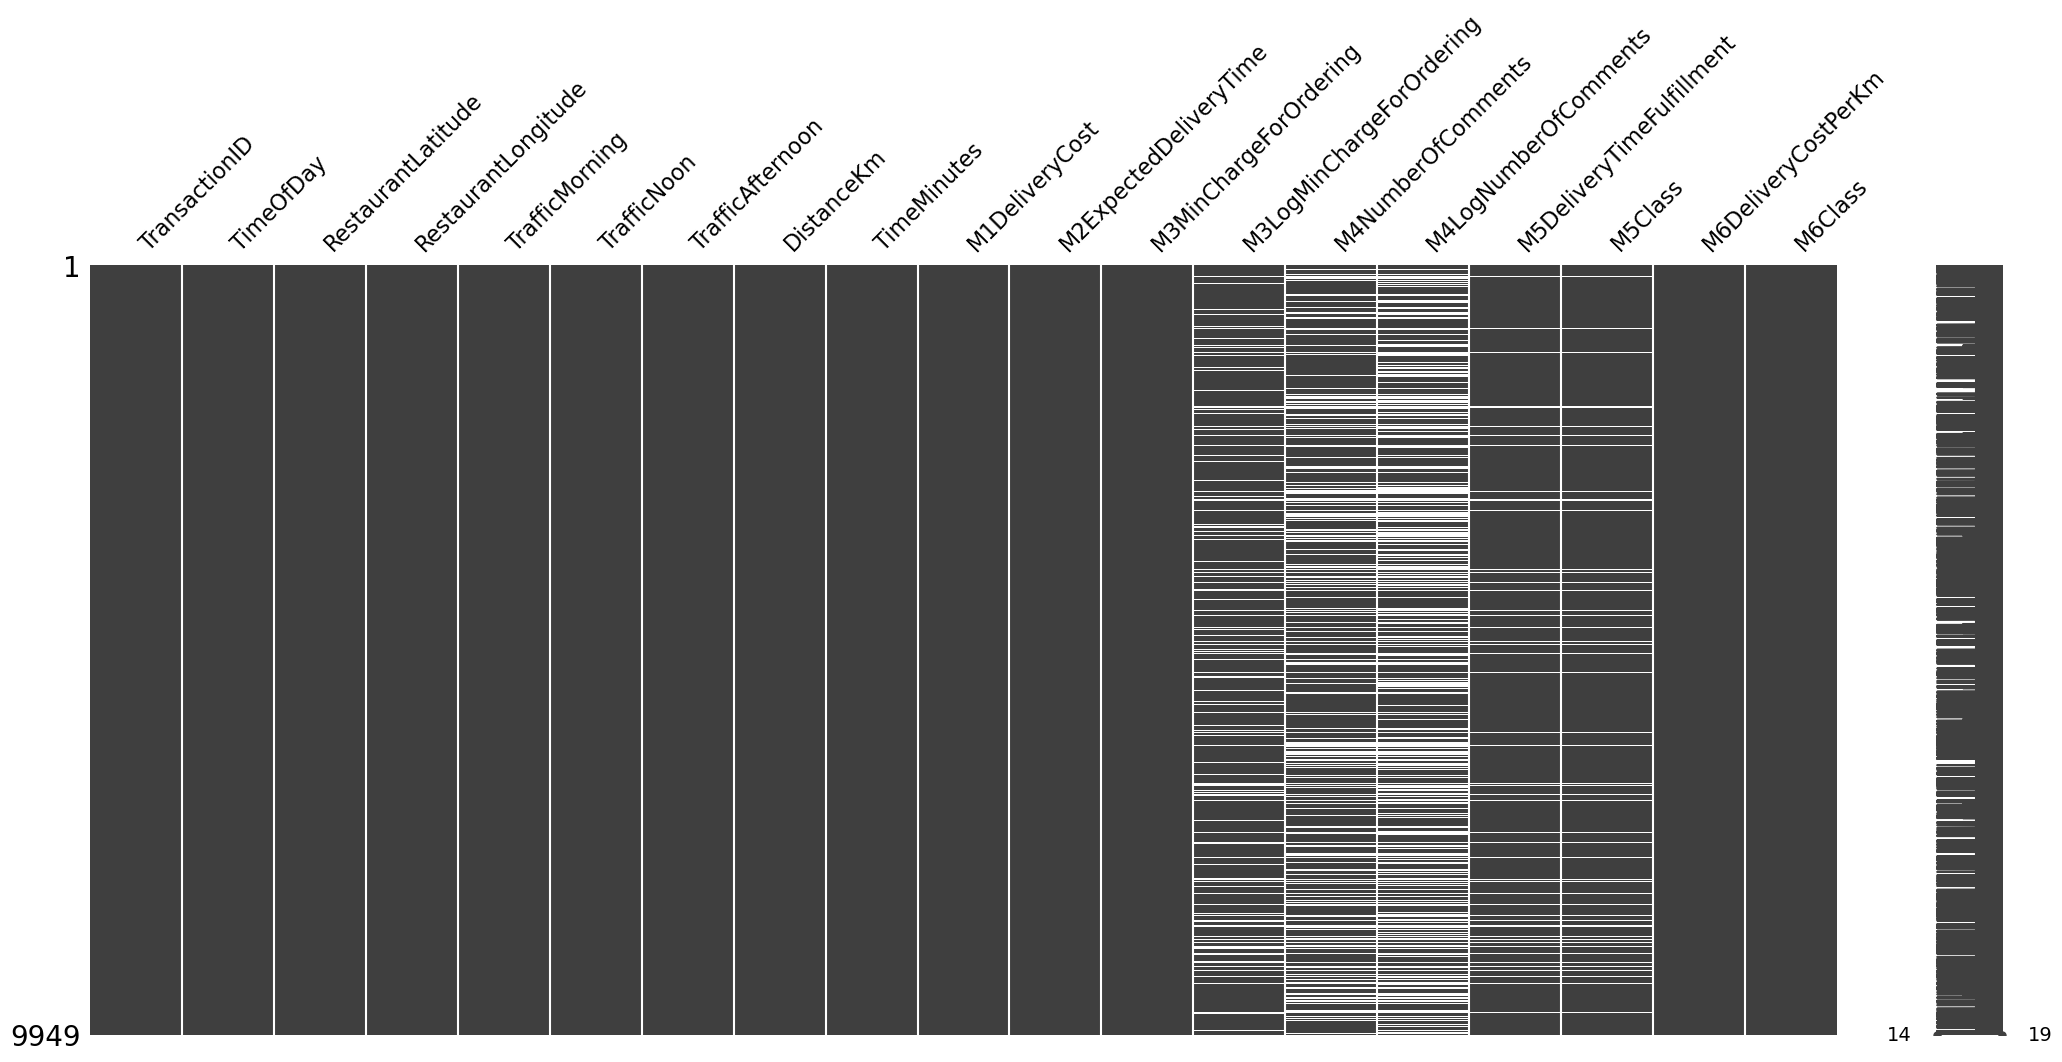

In [52]:
msno.matrix(df) #null değerler için

In [53]:
#-------------------------------------------------------------

In [54]:
df_M3LogMinChargeForOrdering = df["M3LogMinChargeForOrdering"]
df_M3LogMinChargeForOrdering

0       9.104980
1       9.615805
2       9.674074
3            NaN
4       8.665613
          ...   
9944         NaN
9945         NaN
9946    8.594154
9947    9.210340
9948    9.210340
Name: M3LogMinChargeForOrdering, Length: 9949, dtype: float64

In [55]:
df_M3LogMinChargeForOrdering.isnull().sum()  #total NaN sayısı

1553

In [56]:
null_index = df_M3LogMinChargeForOrdering.isnull() #df deki NaN içeren değerlerin indeksi

In [57]:
null_index

0       False
1       False
2       False
3        True
4       False
        ...  
9944     True
9945     True
9946    False
9947    False
9948    False
Name: M3LogMinChargeForOrdering, Length: 9949, dtype: bool

In [58]:
df_M3LogMinChargeForOrdering[df_M3LogMinChargeForOrdering.isnull()] #df deki NaN içeren değerler 

3      NaN
9      NaN
13     NaN
17     NaN
24     NaN
        ..
9921   NaN
9922   NaN
9928   NaN
9944   NaN
9945   NaN
Name: M3LogMinChargeForOrdering, Length: 1553, dtype: float64

In [59]:
#Interpolate in forward order across the column:
df_M3LogMinChargeForOrdering.interpolate(method ='linear', limit_direction ='backward', inplace=True)
#Interpolate in forward order across the column:
df_M3LogMinChargeForOrdering.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [60]:
df_M3LogMinChargeForOrdering

0       9.104980
1       9.615805
2       9.674074
3       9.169844
4       8.665613
          ...   
9944    8.896599
9945    8.745377
9946    8.594154
9947    9.210340
9948    9.210340
Name: M3LogMinChargeForOrdering, Length: 9949, dtype: float64

In [61]:
df_M3LogMinChargeForOrdering[null_index]

3       9.169844
9       9.210340
13      9.735751
17      9.456162
24      9.210340
          ...   
9921    9.441806
9922    9.267806
9928    9.210340
9944    8.896599
9945    8.745377
Name: M3LogMinChargeForOrdering, Length: 1553, dtype: float64

<AxesSubplot:>

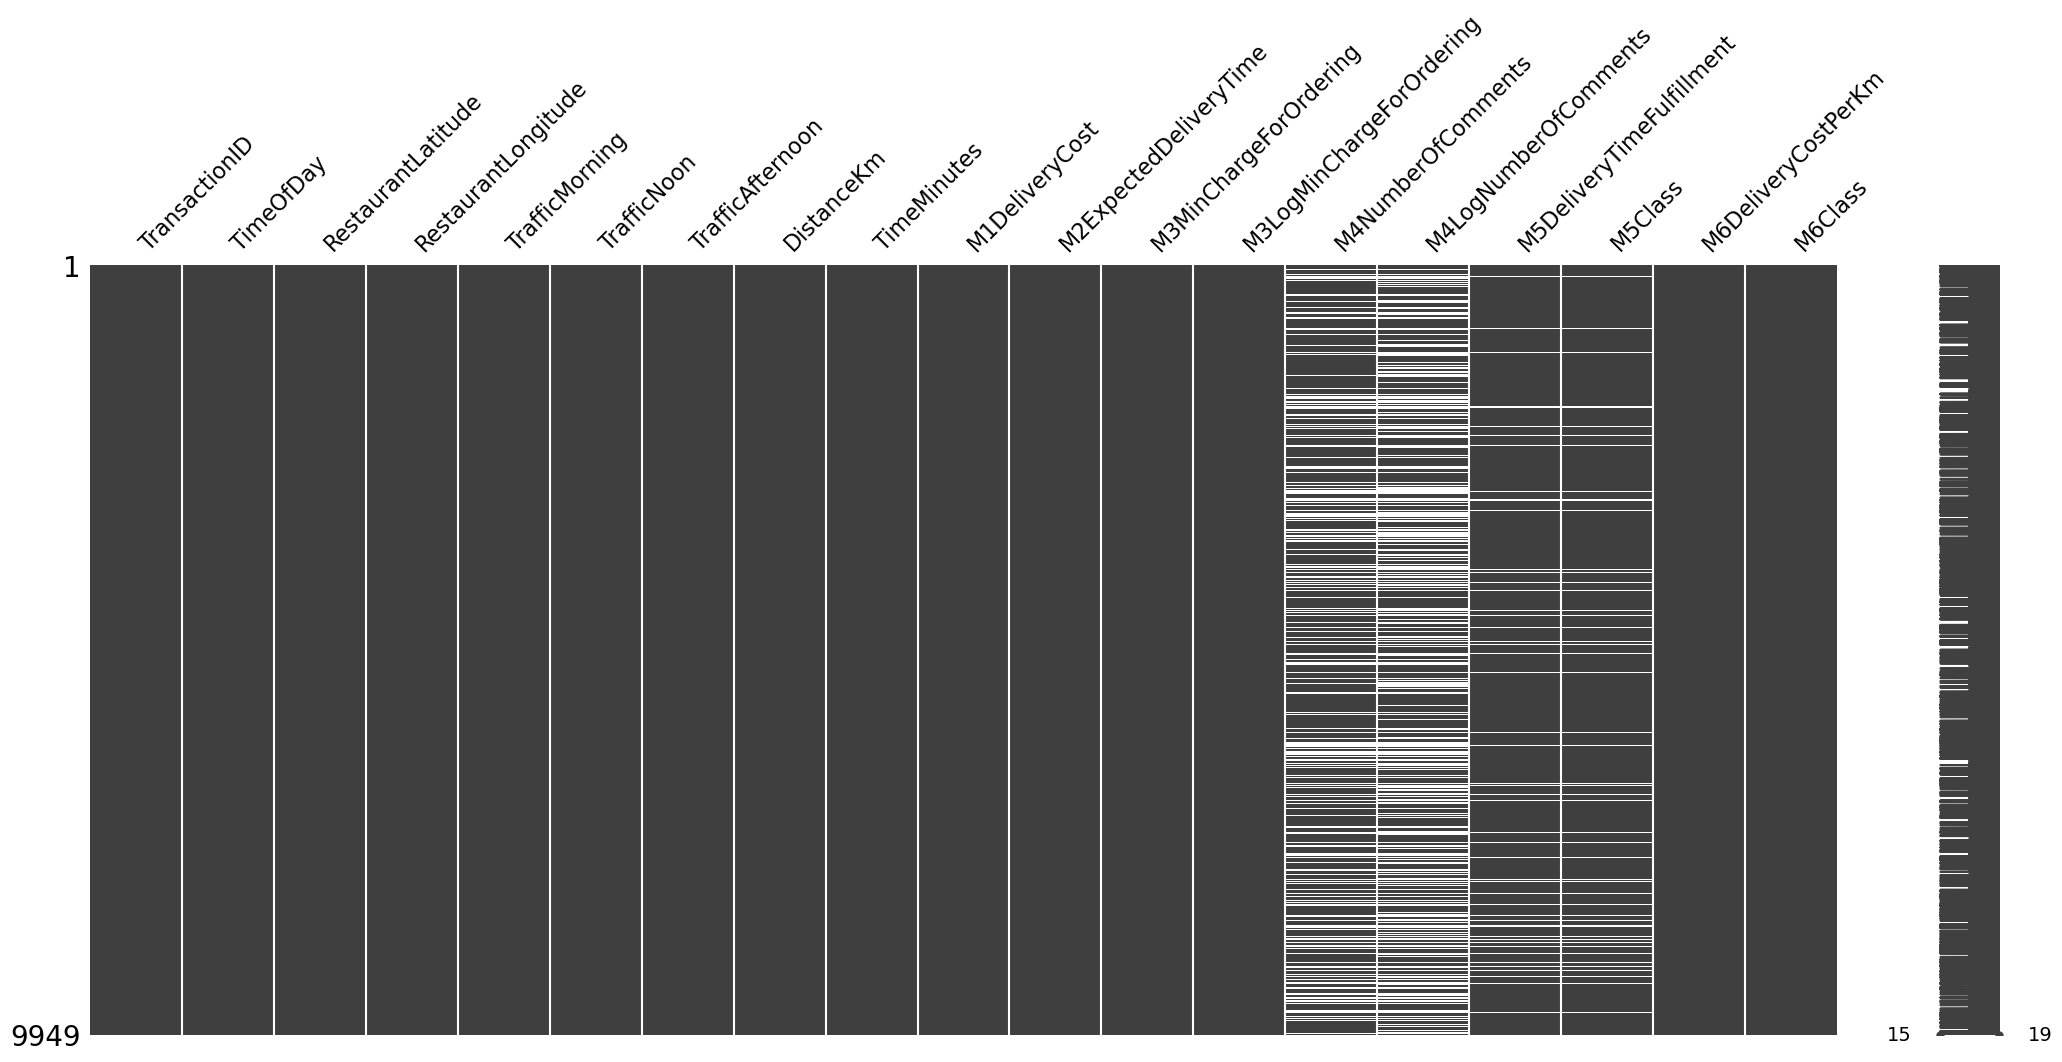

In [62]:
msno.matrix(df) #null değerler için

In [63]:
#--------------------------------------------------------------------------------

In [64]:
df_M5DeliveryTimeFulfillment = df["M5DeliveryTimeFulfillment"]
df_M5DeliveryTimeFulfillment

0       29.0
1       13.0
2      -16.0
3        NaN
4       34.0
        ... 
9944     NaN
9945     NaN
9946    28.0
9947    44.0
9948    44.0
Name: M5DeliveryTimeFulfillment, Length: 9949, dtype: float64

In [65]:
df_M5DeliveryTimeFulfillment.isnull().sum()  #total NaN sayısı

725

In [66]:
null_index = df_M5DeliveryTimeFulfillment.isnull() #df deki NaN içeren değerlerin indeksi

In [67]:
null_index

0       False
1       False
2       False
3        True
4       False
        ...  
9944     True
9945     True
9946    False
9947    False
9948    False
Name: M5DeliveryTimeFulfillment, Length: 9949, dtype: bool

In [68]:
df_M5DeliveryTimeFulfillment[df_M5DeliveryTimeFulfillment.isnull()] #df deki NaN içeren değerler 

3      NaN
9      NaN
13     NaN
17     NaN
24     NaN
        ..
9900   NaN
9908   NaN
9928   NaN
9944   NaN
9945   NaN
Name: M5DeliveryTimeFulfillment, Length: 725, dtype: float64

In [69]:
#Interpolate in forward order across the column:
df_M5DeliveryTimeFulfillment.interpolate(method ='linear', limit_direction ='backward', inplace=True)
#Interpolate in forward order across the column:
df_M5DeliveryTimeFulfillment.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [70]:
df_M5DeliveryTimeFulfillment

0       29.0
1       13.0
2      -16.0
3        9.0
4       34.0
        ... 
9944    28.0
9945    28.0
9946    28.0
9947    44.0
9948    44.0
Name: M5DeliveryTimeFulfillment, Length: 9949, dtype: float64

In [71]:
df_M5DeliveryTimeFulfillment[null_index]

3        9.0
9       30.5
13      34.0
17      17.0
24      18.0
        ... 
9900    31.0
9908   -10.5
9928    11.5
9944    28.0
9945    28.0
Name: M5DeliveryTimeFulfillment, Length: 725, dtype: float64

<AxesSubplot:>

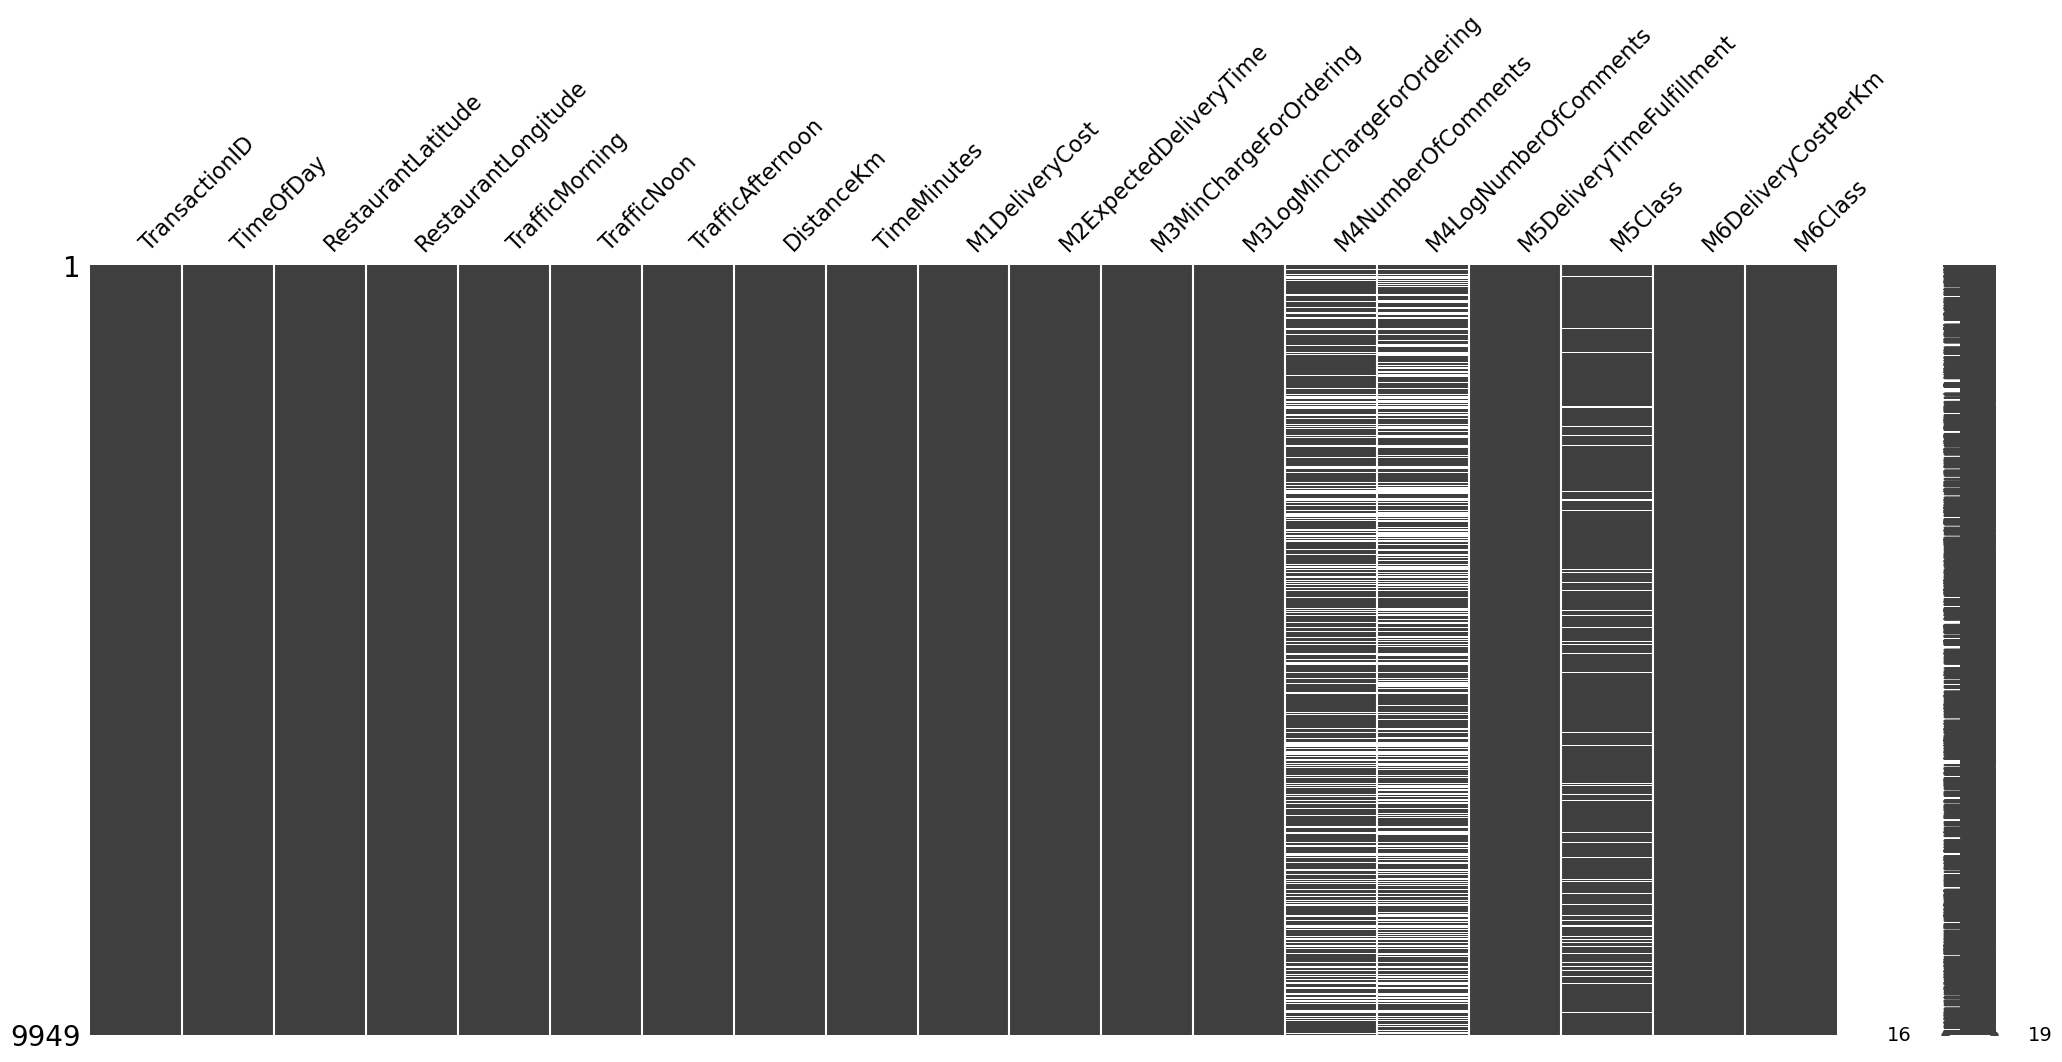

In [72]:
msno.matrix(df) #null değerler için

In [73]:
df_M5Class = df["M5Class"]
df_M5Class

0       1.0
1       1.0
2       0.0
3       NaN
4       1.0
       ... 
9944    NaN
9945    NaN
9946    1.0
9947    1.0
9948    1.0
Name: M5Class, Length: 9949, dtype: float64

In [74]:
df_M5Class.isnull().sum()  #total NaN sayısı

725

In [75]:
null_index = df_M5Class.isnull() #df deki NaN içeren değerlerin indeksi

In [76]:
null_index

0       False
1       False
2       False
3        True
4       False
        ...  
9944     True
9945     True
9946    False
9947    False
9948    False
Name: M5Class, Length: 9949, dtype: bool

In [77]:
df_M5Class[df_M5Class.isnull()] #df deki NaN içeren değerler 

3      NaN
9      NaN
13     NaN
17     NaN
24     NaN
        ..
9900   NaN
9908   NaN
9928   NaN
9944   NaN
9945   NaN
Name: M5Class, Length: 725, dtype: float64

In [78]:
#Interpolate in forward order across the column:
df_M5Class.interpolate(method ='linear', limit_direction ='backward', inplace=True)
#Interpolate in forward order across the column:
df_M5Class.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [79]:
df_M5Class

0       1.0
1       1.0
2       0.0
3       0.5
4       1.0
       ... 
9944    1.0
9945    1.0
9946    1.0
9947    1.0
9948    1.0
Name: M5Class, Length: 9949, dtype: float64

In [80]:
df_M5Class[null_index]

3       0.5
9       1.0
13      1.0
17      0.5
24      1.0
       ... 
9900    1.0
9908    0.5
9928    1.0
9944    1.0
9945    1.0
Name: M5Class, Length: 725, dtype: float64

<AxesSubplot:>

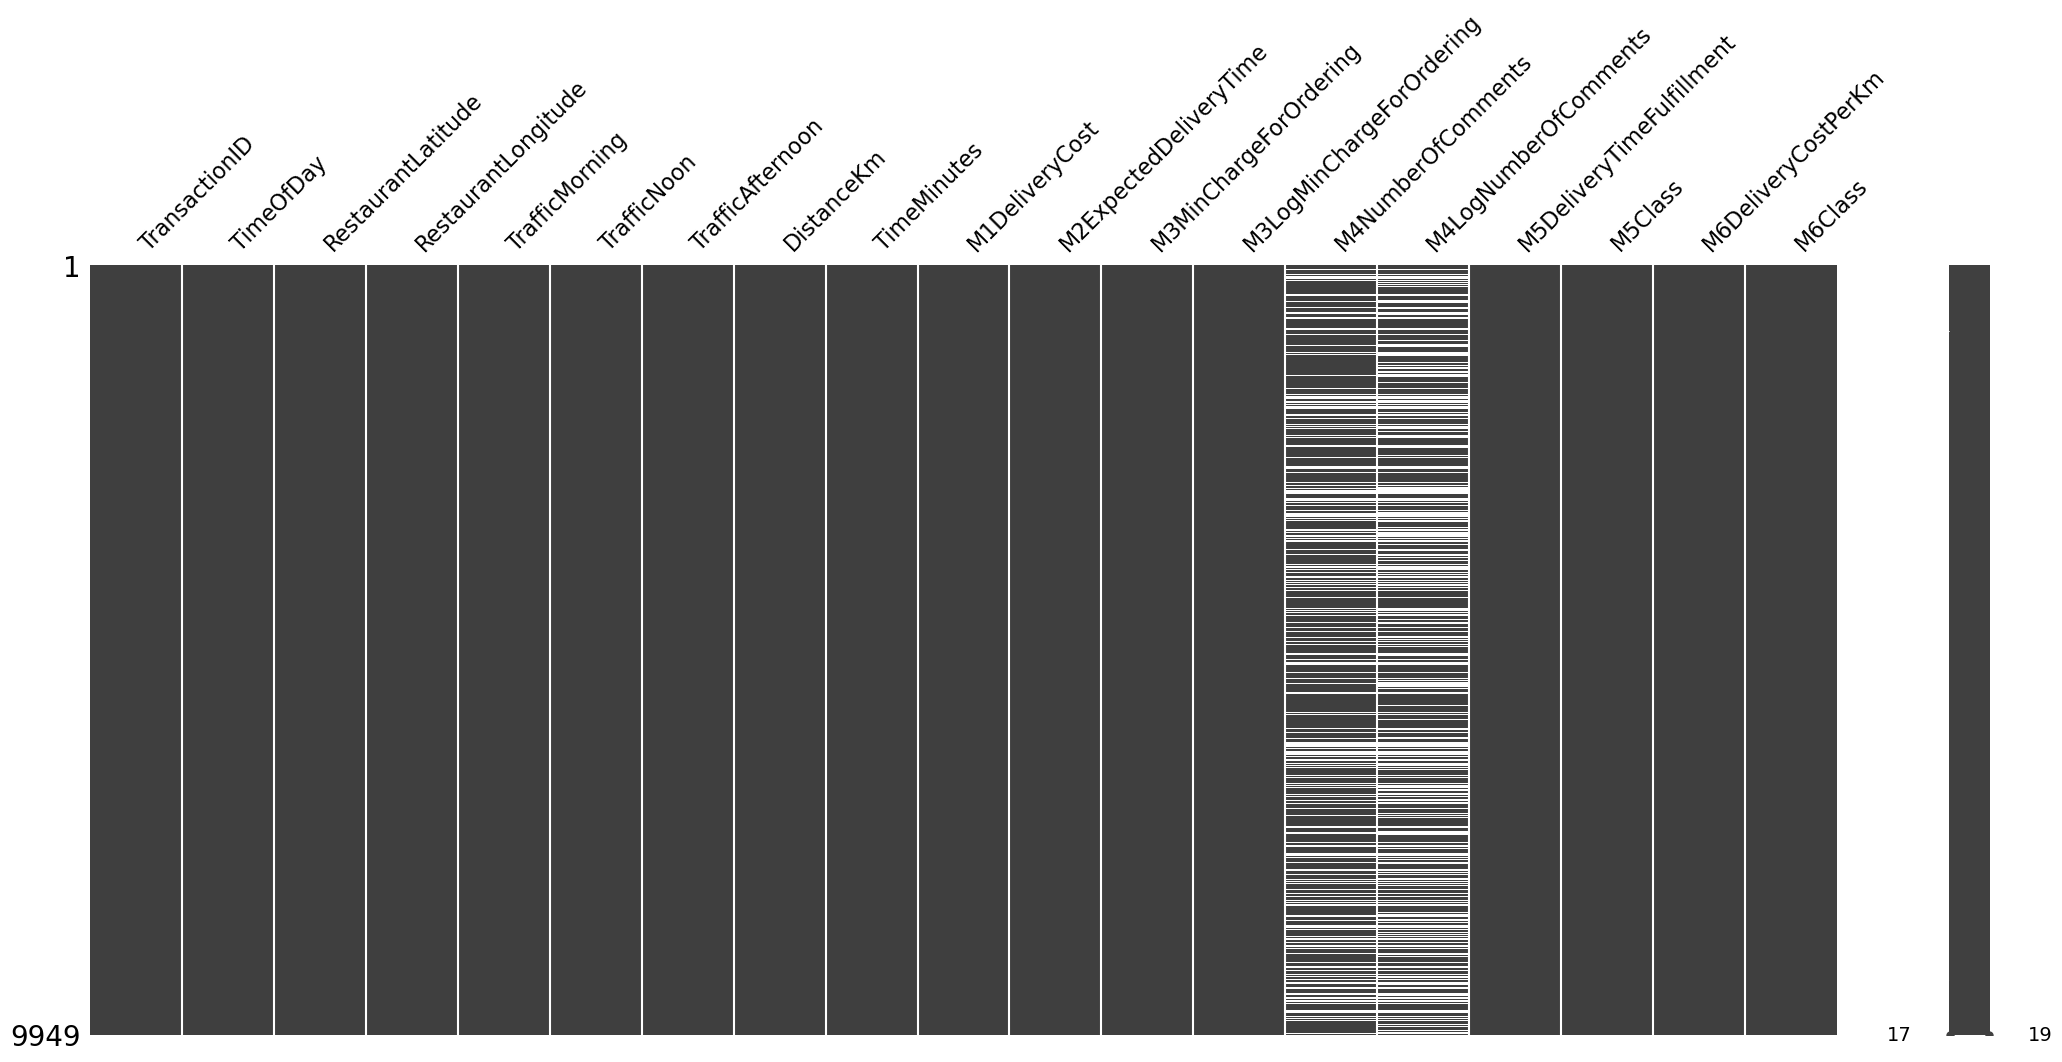

In [81]:
msno.matrix(df) #null değerler için

In [82]:
print(df.columns.tolist()) # We used this code because "M4NumberOfComments" and "M4LogNumberOfComments" columns send KeyError,then we fixed this method.

['TransactionID ', 'TimeOfDay', 'RestaurantLatitude', 'RestaurantLongitude', 'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'DistanceKm', 'TimeMinutes', 'M1DeliveryCost', 'M2ExpectedDeliveryTime', 'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering', 'M4NumberOfComments', 'M4LogNumberOfComments', 'M5DeliveryTimeFulfillment', 'M5Class', 'M6DeliveryCostPerKm', 'M6Class']


In [83]:
df_M4NumberOfComments = df["M4NumberOfComments"]
df_M4NumberOfComments

0        0.0
1        0.0
2       45.0
3        NaN
4       34.0
        ... 
9944     NaN
9945     NaN
9946    58.0
9947     4.0
9948     NaN
Name: M4NumberOfComments, Length: 9949, dtype: float64

In [84]:
df_M4NumberOfComments.isnull().sum()  #total NaN sayısı

2638

In [85]:
null_index = df_M4NumberOfComments.isnull() #df deki NaN içeren değerlerin indeksi

In [86]:
null_index

0       False
1       False
2       False
3        True
4       False
        ...  
9944     True
9945     True
9946    False
9947    False
9948     True
Name: M4NumberOfComments, Length: 9949, dtype: bool

In [87]:
df_M4NumberOfComments[df_M4NumberOfComments.isnull()] #df deki NaN içeren değerler 

3      NaN
5      NaN
8      NaN
9      NaN
13     NaN
        ..
9937   NaN
9938   NaN
9944   NaN
9945   NaN
9948   NaN
Name: M4NumberOfComments, Length: 2638, dtype: float64

In [88]:
#Interpolate in forward order across the column:
df_M4NumberOfComments.interpolate(method ='linear', limit_direction ='backward', inplace=True)
#Interpolate in forward order across the column:
df_M4NumberOfComments.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [89]:
df_M4NumberOfComments

0        0.000000
1        0.000000
2       45.000000
3       39.500000
4       34.000000
          ...    
9944    29.333333
9945    43.666667
9946    58.000000
9947     4.000000
9948     4.000000
Name: M4NumberOfComments, Length: 9949, dtype: float64

In [90]:
df_M4NumberOfComments[null_index]

3        39.500000
5        20.500000
8        39.000000
9        24.000000
13      199.500000
           ...    
9937     72.000000
9938     36.500000
9944     29.333333
9945     43.666667
9948      4.000000
Name: M4NumberOfComments, Length: 2638, dtype: float64

<AxesSubplot:>

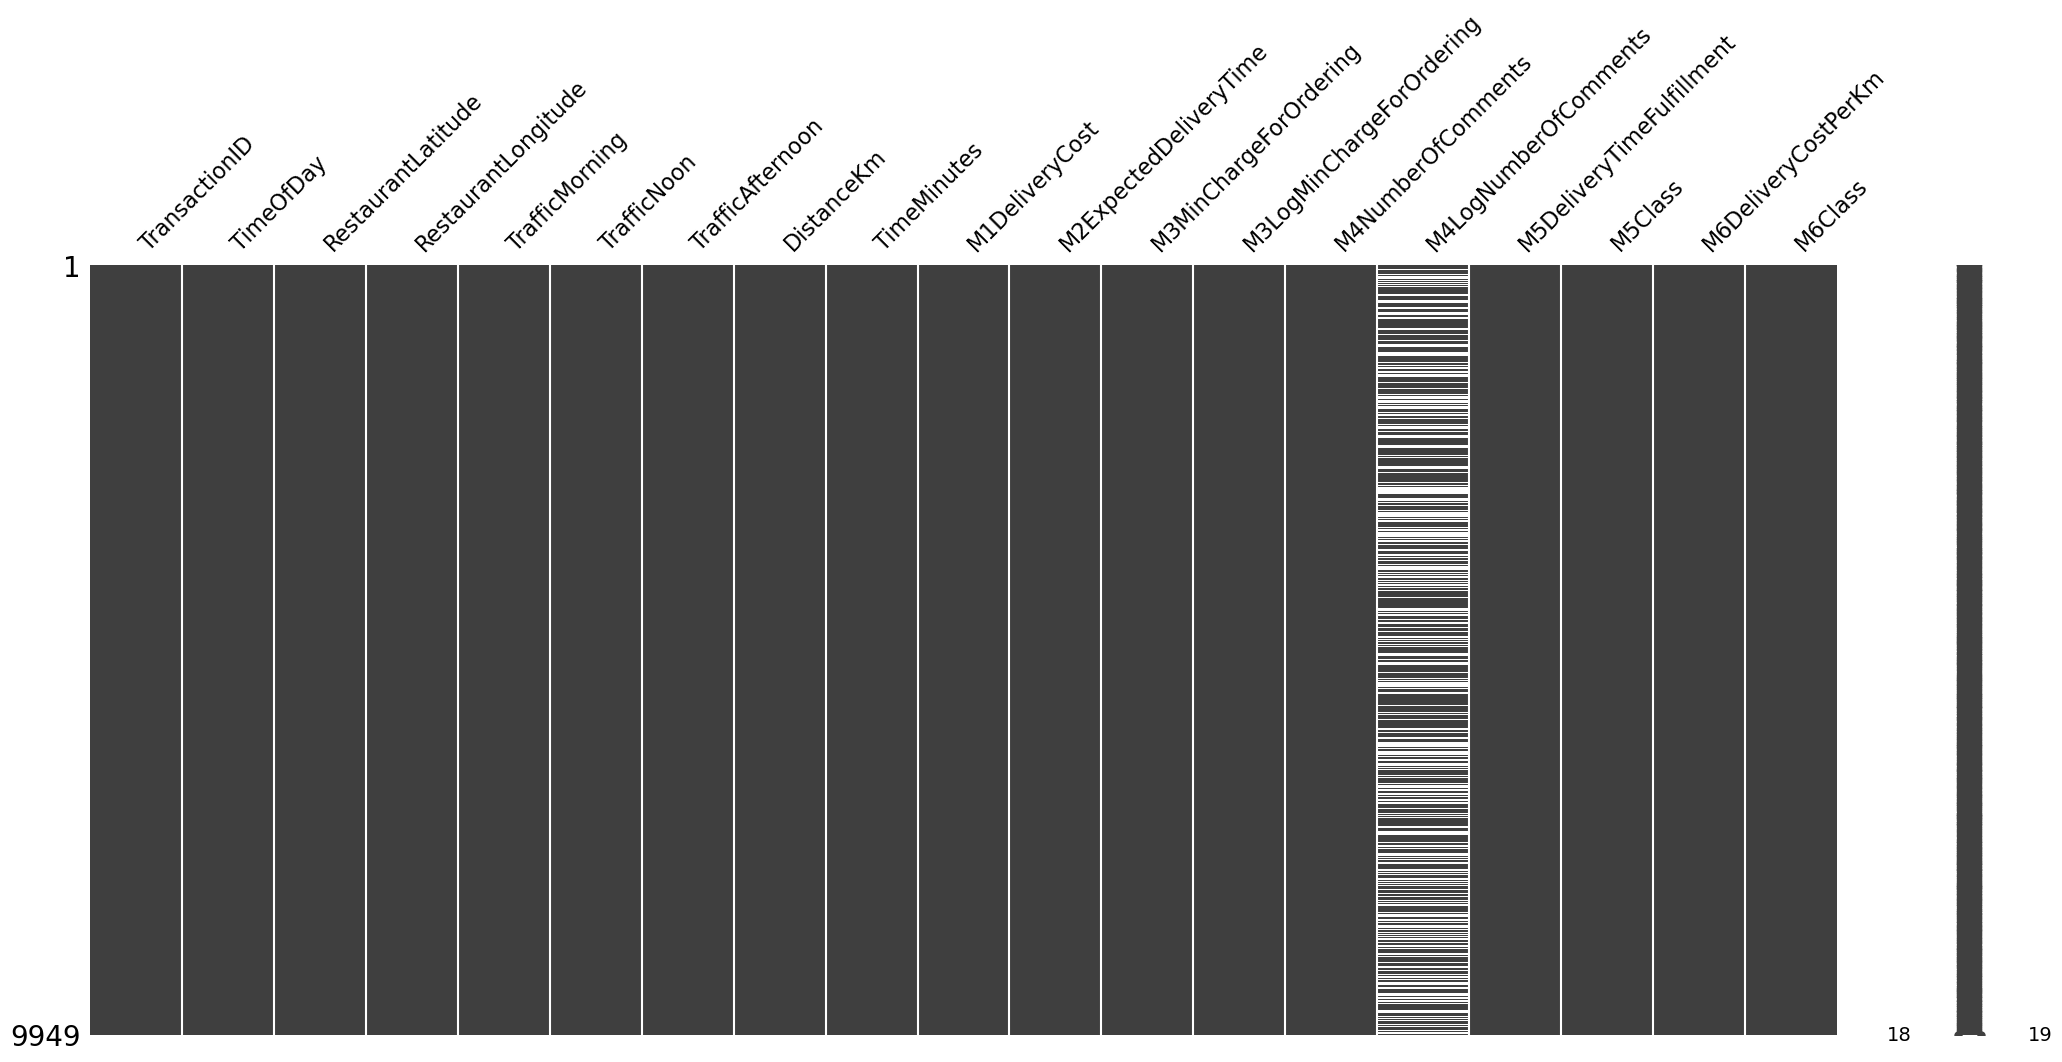

In [91]:
msno.matrix(df) #null değerler için

In [92]:
df_M4LogNumberOfComments= df["M4LogNumberOfComments"]
df_M4LogNumberOfComments

0            NaN
1            NaN
2       3.806662
3            NaN
4       3.526361
          ...   
9944         NaN
9945         NaN
9946    4.060443
9947    1.386294
9948         NaN
Name: M4LogNumberOfComments, Length: 9949, dtype: float64

In [93]:
df_M4LogNumberOfComments.isnull().sum()  #total NaN sayısı

3681

In [94]:
null_index = df_M4LogNumberOfComments.isnull() #df deki NaN içeren değerlerin indeksi

In [95]:
null_index

0        True
1        True
2       False
3        True
4       False
        ...  
9944     True
9945     True
9946    False
9947    False
9948     True
Name: M4LogNumberOfComments, Length: 9949, dtype: bool

In [96]:
df_M4LogNumberOfComments[df_M4LogNumberOfComments.isnull()] #df deki NaN içeren değerler 

0      NaN
1      NaN
3      NaN
5      NaN
8      NaN
        ..
9937   NaN
9938   NaN
9944   NaN
9945   NaN
9948   NaN
Name: M4LogNumberOfComments, Length: 3681, dtype: float64

In [97]:
#Interpolate in forward order across the column:
df_M4LogNumberOfComments.interpolate(method ='linear', limit_direction ='backward', inplace=True)
#Interpolate in forward order across the column:
df_M4LogNumberOfComments.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [98]:
df_M4LogNumberOfComments

0       3.806662
1       3.806662
2       3.806662
3       3.666512
4       3.526361
          ...   
9944    3.158848
9945    3.609645
9946    4.060443
9947    1.386294
9948    1.386294
Name: M4LogNumberOfComments, Length: 9949, dtype: float64

In [99]:
df_M4LogNumberOfComments[null_index]

0       3.806662
1       3.806662
3       3.666512
5       2.736135
8       3.391731
          ...   
9937    2.481422
9938    1.240711
9944    3.158848
9945    3.609645
9948    1.386294
Name: M4LogNumberOfComments, Length: 3681, dtype: float64

<AxesSubplot:>

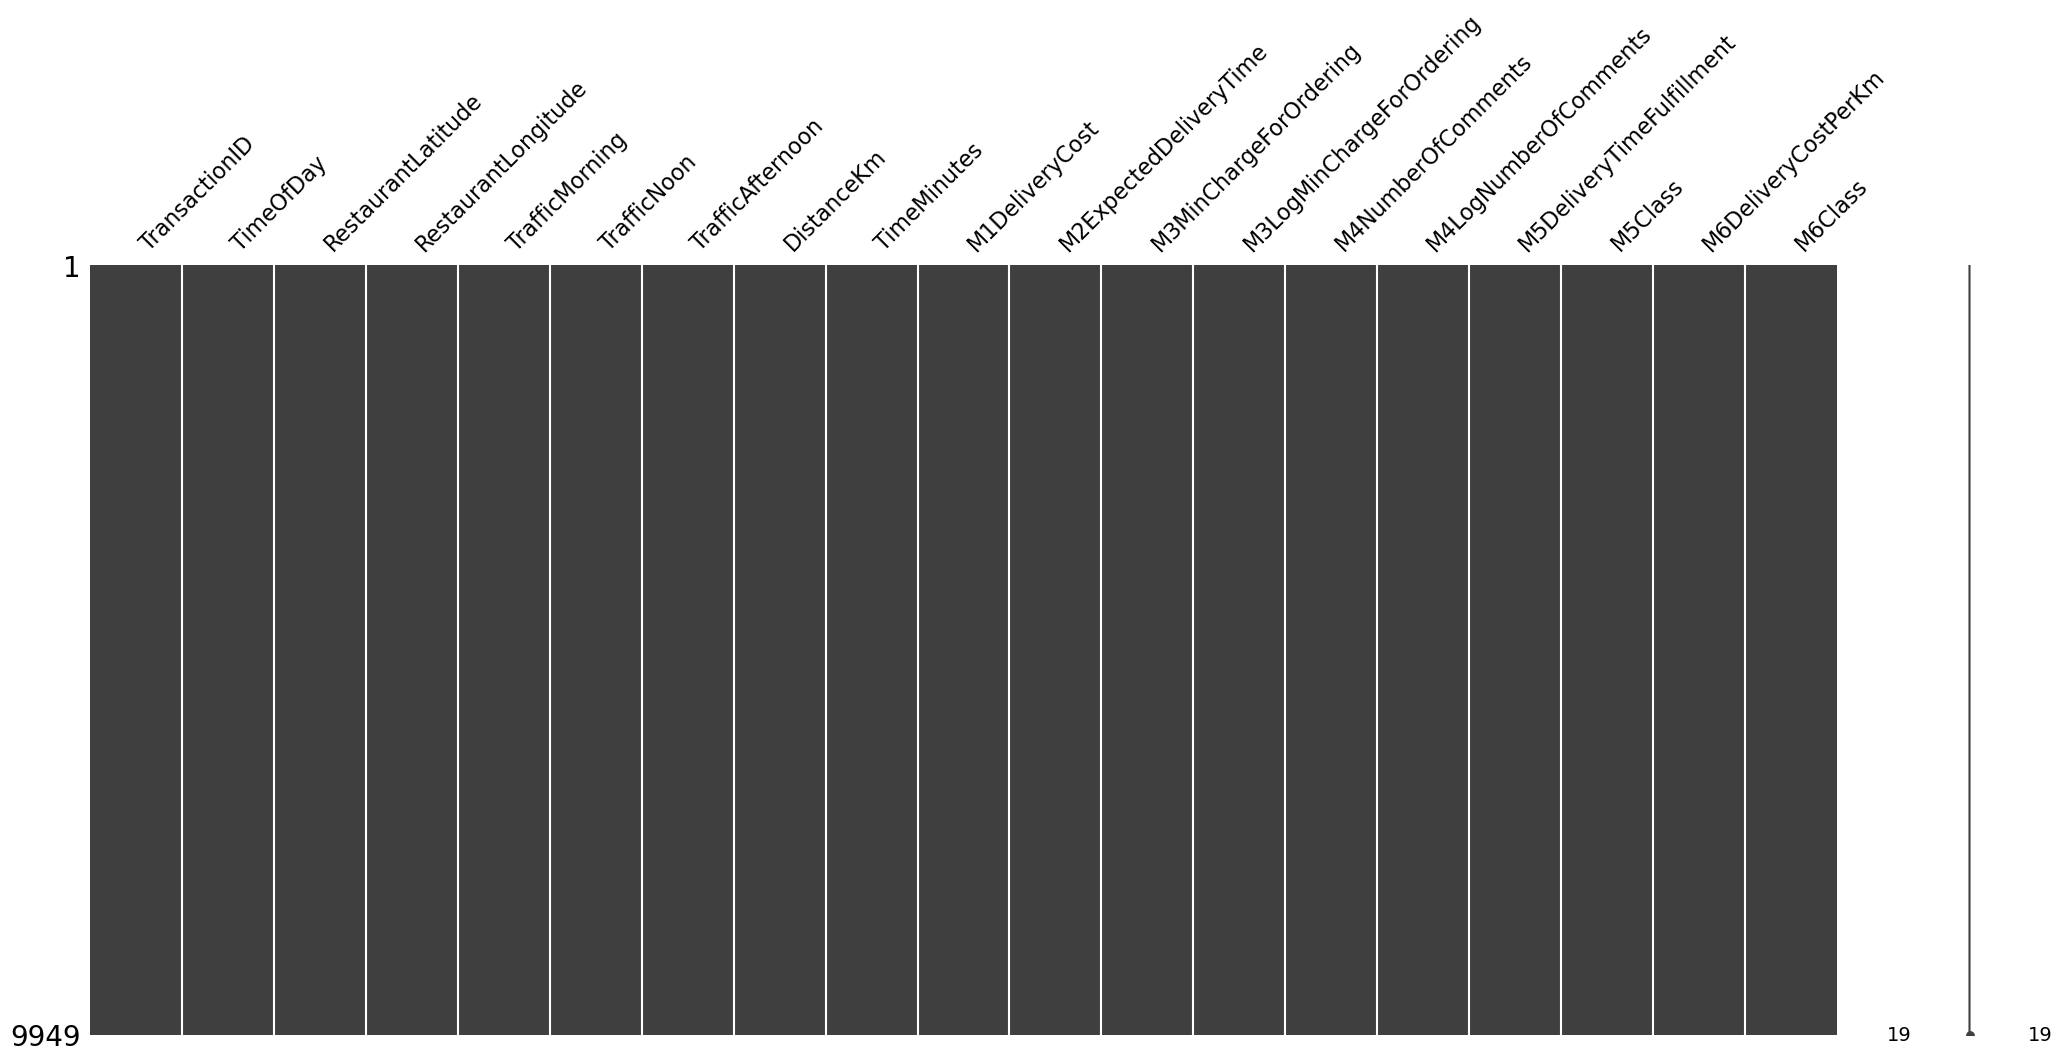

In [100]:
msno.matrix(df) #null değerler için

In [101]:
# OUTLIER ZAMANI
#Interquartile Range to Detect Outliers in Data(IQR)

In [102]:
df_RestaurantLatitude = df["RestaurantLatitude"]
df_RestaurantLatitude

0       4.676156
1       4.627211
2       4.627091
3       4.714166
4       4.669250
          ...   
9944    4.686875
9945    4.663448
9946    4.598296
9947    4.643191
9948    4.697277
Name: RestaurantLatitude, Length: 9949, dtype: float64

<AxesSubplot:xlabel='RestaurantLatitude'>

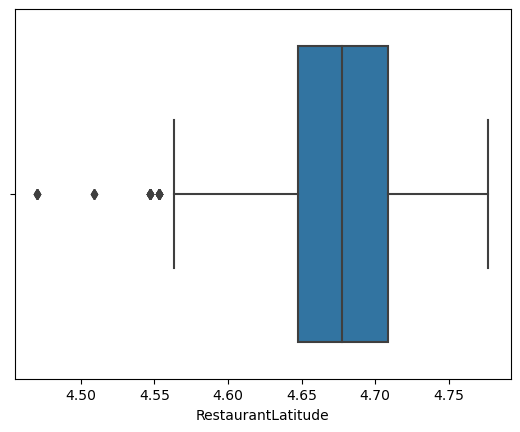

In [103]:
sns.boxplot(x = df_RestaurantLatitude)  

In [104]:
#bir aykırı değeri tanımlayabilmek için eşik değer belirlemek gerekir
#boxplot kutu grafiği kullanarak eşik değer belirleyelim

Q1 = df_RestaurantLatitude.quantile(0.25) #quantile(0.25) isimli fonks küçükten büyüğe sıralandığında 0,25 lik  indeksine karşılık gelen değeri alır
Q3 = df_RestaurantLatitude.quantile(0.75)
IQR = Q3-Q1  #veri setinin 0,25 ve 0,75 indexine karşılık gelen değerler üzerinden değer hesaplıcaz ve bu inter quartile IQR değeri elde edilir 
#kutu grafik = değişkenimizin dağılımını gösterir ve çeğrekliklerden oluşur

In [105]:
Q1

4.647844

In [106]:
Q3

4.709027

In [107]:
IQR

0.061182999999999765

In [108]:
low_boundary = Q1-1.5*IQR #birinci çeğrek değerimizden (0.25) 1,5*IQR aşağısını alt sınır(eşikdeğer olarak belirle)
upper_boundary = Q3+1.5*IQR

In [109]:
low_boundary

4.5560695

In [110]:
upper_boundary

4.8008014999999995

In [111]:
df_RestaurantLatitude < low_boundary

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: RestaurantLatitude, Length: 9949, dtype: bool

In [112]:
aykırı = (df_RestaurantLatitude < low_boundary) 

In [113]:
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: RestaurantLatitude, Length: 9949, dtype: bool

In [114]:
outliers = df_RestaurantLatitude[aykırı]

In [115]:
outliers

162     4.546795
1169    4.470490
1770    4.552826
2013    4.552826
2515    4.470490
2581    4.552826
2793    4.552826
3470    4.546795
3747    4.470490
3944    4.546795
4093    4.552826
4095    4.509246
4144    4.546795
4164    4.546795
4276    4.552826
5214    4.552826
5384    4.546795
5944    4.552826
6308    4.552826
6690    4.546795
6913    4.470490
7048    4.552826
7287    4.509246
7548    4.552826
7954    4.546795
8024    4.509246
8177    4.552826
8526    4.546795
9166    4.546795
9196    4.546795
9441    4.470490
9466    4.552826
Name: RestaurantLatitude, dtype: float64

In [116]:
mean = np.mean(df_RestaurantLatitude)

In [117]:
mean

4.676529866931333

In [118]:
standart_deviation = np.std(df_RestaurantLatitude)

In [119]:
standart_deviation

0.04326697627028968

In [120]:
df_RestaurantLatitude[aykırı] = low_boundary #aykırı değerleri silmek istemeyip ort ile doldurmak

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\3188816954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RestaurantLatitude[aykırı] = low_boundary #aykırı değerleri silmek istemeyip ort ile doldurmak


In [121]:
df_RestaurantLatitude[aykırı]

162     4.55607
1169    4.55607
1770    4.55607
2013    4.55607
2515    4.55607
2581    4.55607
2793    4.55607
3470    4.55607
3747    4.55607
3944    4.55607
4093    4.55607
4095    4.55607
4144    4.55607
4164    4.55607
4276    4.55607
5214    4.55607
5384    4.55607
5944    4.55607
6308    4.55607
6690    4.55607
6913    4.55607
7048    4.55607
7287    4.55607
7548    4.55607
7954    4.55607
8024    4.55607
8177    4.55607
8526    4.55607
9166    4.55607
9196    4.55607
9441    4.55607
9466    4.55607
Name: RestaurantLatitude, dtype: float64

<AxesSubplot:xlabel='RestaurantLatitude'>

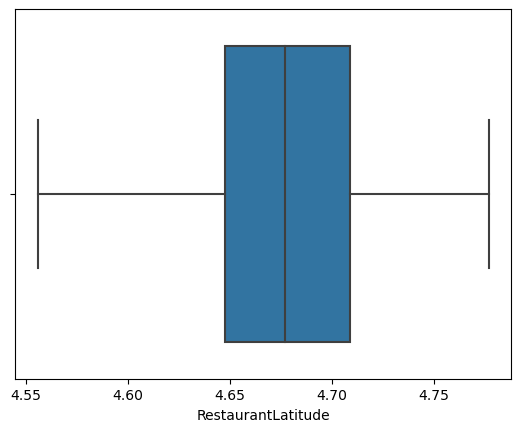

In [122]:
sns.boxplot(x = df_RestaurantLatitude) 

In [123]:
df_TimeOfDay = df["TimeOfDay"]
df_TimeOfDay

0       3
1       3
2       1
3       3
4       3
       ..
9944    2
9945    3
9946    2
9947    3
9948    3
Name: TimeOfDay, Length: 9949, dtype: int64

<AxesSubplot:xlabel='TimeOfDay'>

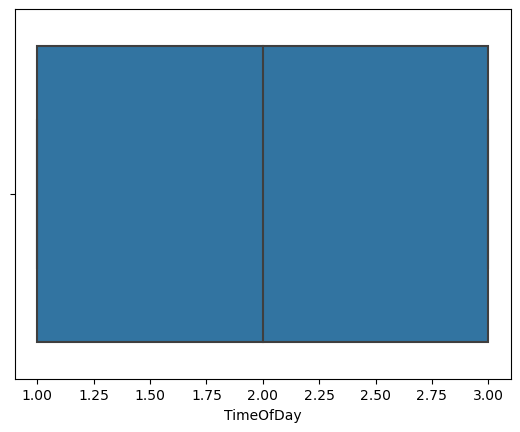

In [124]:
sns.boxplot(x = df_TimeOfDay) 

In [125]:
#This column is clear.That's why we don't need to any operation for TimeOfDay.

In [126]:
df_RestaurantLongitude = df["RestaurantLongitude"]
df_RestaurantLongitude

0      -74.056414
1      -74.091024
2      -74.075046
3      -74.070364
4      -74.079962
          ...    
9944   -74.074164
9945   -74.123920
9946   -74.075393
9947   -74.122479
9948   -74.044828
Name: RestaurantLongitude, Length: 9949, dtype: float64

<AxesSubplot:xlabel='RestaurantLongitude'>

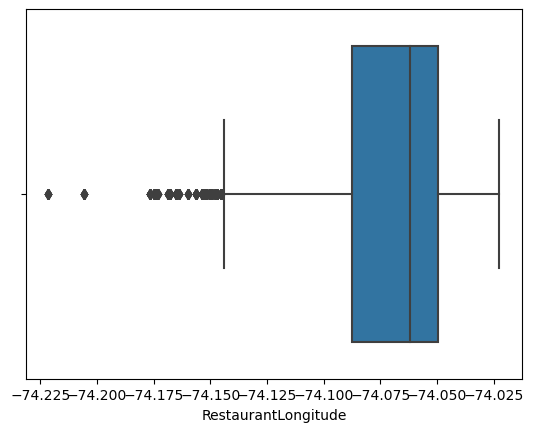

In [127]:
sns.boxplot(x = df_RestaurantLongitude)  

In [128]:
#bir aykırı değeri tanımlayabilmek için eşik değer belirlemek gerekir
#boxplot kutu grafiği kullanarak eşik değer belirleyelim

Q1 = df_RestaurantLongitude.quantile(0.25) #quantile(0.25) isimli fonks küçükten büyüğe sıralandığında 0,25 lik  indeksine karşılık gelen değeri alır
Q3 = df_RestaurantLongitude.quantile(0.75)
IQR = Q3-Q1  #veri setinin 0,25 ve 0,75 indexine karşılık gelen değerler üzerinden değer hesaplıcaz ve bu inter quartile IQR değeri elde edilir 
#kutu grafik = değişkenimizin dağılımını gösterir ve çeğrekliklerden oluşur

In [129]:
Q1

-74.087488

In [130]:
Q3

-74.04965

In [131]:
IQR

0.0378379999999936

In [132]:
low_boundary = Q1-1.5*IQR #birinci çeğrek değerimizden (0.25) 1,5*IQR aşağısını alt sınır(eşikdeğer olarak belirle)
upper_boundary = Q3+1.5*IQR

In [133]:
low_boundary

-74.14424499999998

In [134]:
upper_boundary

-73.99289300000001

In [135]:
df_RestaurantLongitude < low_boundary

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: RestaurantLongitude, Length: 9949, dtype: bool

In [136]:
aykırı = (df_RestaurantLongitude < low_boundary) 

In [137]:
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: RestaurantLongitude, Length: 9949, dtype: bool

In [138]:
outliers = df_RestaurantLongitude[aykırı]

In [139]:
outliers

75     -74.145489
79     -74.168776
149    -74.145157
161    -74.152390
182    -74.221359
          ...    
9500   -74.168776
9511   -74.156336
9535   -74.221359
9792   -74.147942
9872   -74.146950
Name: RestaurantLongitude, Length: 257, dtype: float64

In [140]:
mean = np.mean(df_RestaurantLongitude)
mean

-74.07112092033302

In [141]:
standart_deviation = np.std(df_RestaurantLongitude)
standart_deviation

0.03153047930115905

In [142]:
df_RestaurantLongitude[aykırı] = low_boundary #aykırı değerleri silmek istemeyip low bound ile doldurmak

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\3471686368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RestaurantLongitude[aykırı] = low_boundary #aykırı değerleri silmek istemeyip low bound ile doldurmak


In [143]:
df_RestaurantLongitude[aykırı]

75     -74.144245
79     -74.144245
149    -74.144245
161    -74.144245
182    -74.144245
          ...    
9500   -74.144245
9511   -74.144245
9535   -74.144245
9792   -74.144245
9872   -74.144245
Name: RestaurantLongitude, Length: 257, dtype: float64

<AxesSubplot:xlabel='RestaurantLongitude'>

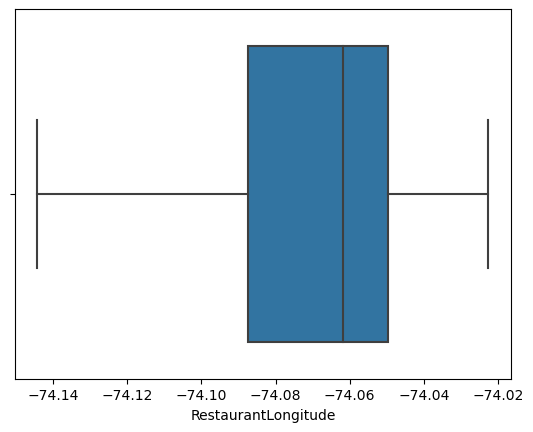

In [144]:
sns.boxplot(x = df_RestaurantLongitude)  

In [145]:
df_TrafficMorning = df["TrafficMorning"]
df_TrafficMorning

0       1
1       1
2       1
3       1
4       2
       ..
9944    2
9945    1
9946    2
9947    1
9948    1
Name: TrafficMorning, Length: 9949, dtype: int64

<AxesSubplot:xlabel='TrafficMorning'>

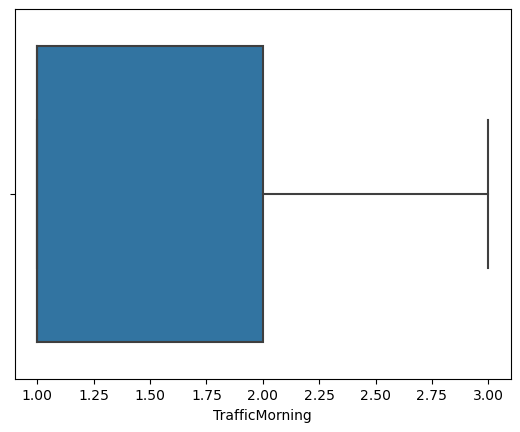

In [146]:
sns.boxplot (x = df_TrafficMorning)

In [147]:
df_TrafficNoon = df["TrafficNoon"]
df_TrafficNoon

0       1
1       2
2       1
3       2
4       2
       ..
9944    3
9945    1
9946    2
9947    1
9948    2
Name: TrafficNoon, Length: 9949, dtype: int64

<AxesSubplot:xlabel='TrafficNoon'>

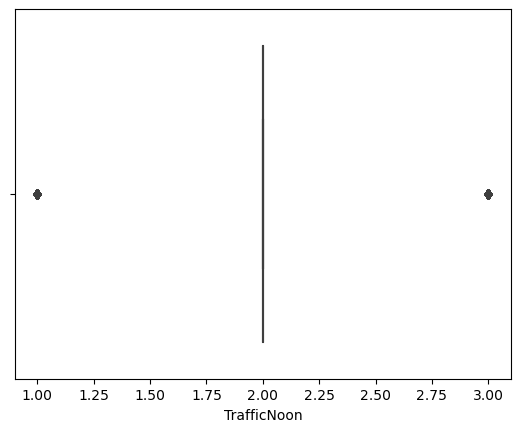

In [148]:
sns.boxplot(x = df_TrafficNoon)  

In [149]:
#bir aykırı değeri tanımlayabilmek için eşik değer belirlemek gerekir
#boxplot kutu grafiği kullanarak eşik değer belirleyelim

Q1 = df_TrafficNoon.quantile(0.25) #quantile(0.25) isimli fonks küçükten büyüğe sıralandığında 0,25 lik  indeksine karşılık gelen değeri alır
Q3 = df_TrafficNoon.quantile(0.75)
IQR = Q3-Q1  #veri setinin 0,25 ve 0,75 indexine karşılık gelen değerler üzerinden değer hesaplıcaz ve bu inter quartile IQR değeri elde edilir 
#kutu grafik = değişkenimizin dağılımını gösterir ve çeğrekliklerden oluşur

In [150]:
Q1

2.0

In [151]:
Q3

2.0

In [152]:
IQR

0.0

In [153]:
low_boundary = Q1-1.5*IQR #birinci çeğrek değerimizden (0.25) 1,5*IQR aşağısını alt sınır(eşikdeğer olarak belirle)
upper_boundary = Q3+1.5*IQR

In [154]:
low_boundary

2.0

In [155]:
upper_boundary

2.0

In [156]:
df_TrafficNoon < low_boundary

0        True
1       False
2        True
3       False
4       False
        ...  
9944    False
9945     True
9946    False
9947     True
9948    False
Name: TrafficNoon, Length: 9949, dtype: bool

In [157]:
aykırı = (df_TrafficNoon < low_boundary) 

In [158]:
aykırı

0        True
1       False
2        True
3       False
4       False
        ...  
9944    False
9945     True
9946    False
9947     True
9948    False
Name: TrafficNoon, Length: 9949, dtype: bool

In [159]:
outliers = df_TrafficNoon[aykırı]
outliers

0       1
2       1
5       1
23      1
25      1
       ..
9925    1
9932    1
9933    1
9945    1
9947    1
Name: TrafficNoon, Length: 1819, dtype: int64

In [160]:
mean = np.mean(df_TrafficNoon)
mean

1.8979796964519047

In [161]:
standart_deviation = np.std(df_TrafficNoon)
standart_deviation

0.5032260377401588

In [162]:
df_TrafficNoon[aykırı] = low_boundary #aykırı değerleri silmek istemeyip low bound ile doldurmak

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\2160660297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TrafficNoon[aykırı] = low_boundary #aykırı değerleri silmek istemeyip low bound ile doldurmak


In [163]:
df_TrafficNoon[aykırı]

0       2
2       2
5       2
23      2
25      2
       ..
9925    2
9932    2
9933    2
9945    2
9947    2
Name: TrafficNoon, Length: 1819, dtype: int64

<AxesSubplot:xlabel='TrafficNoon'>

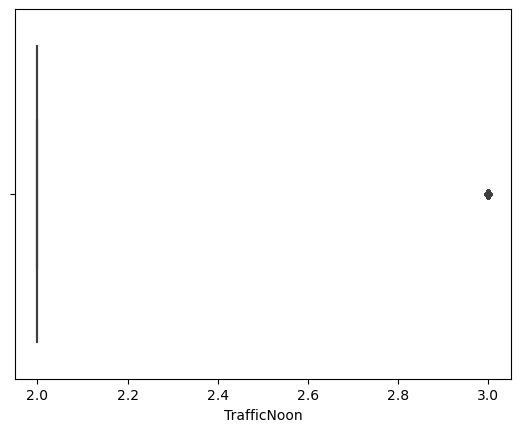

In [164]:
sns.boxplot(x = df_TrafficNoon)  

In [165]:
df_TrafficNoon > upper_boundary

0       False
1       False
2       False
3       False
4       False
        ...  
9944     True
9945    False
9946    False
9947    False
9948    False
Name: TrafficNoon, Length: 9949, dtype: bool

In [166]:
aykırı = (df_TrafficNoon > upper_boundary) 
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944     True
9945    False
9946    False
9947    False
9948    False
Name: TrafficNoon, Length: 9949, dtype: bool

In [167]:
outliers = df_TrafficNoon[aykırı]
outliers

52      3
63      3
80      3
93      3
114     3
       ..
9918    3
9922    3
9923    3
9934    3
9944    3
Name: TrafficNoon, Length: 804, dtype: int64

In [168]:
df_TrafficNoon[aykırı] = upper_boundary #aykırı değerleri silmek istemeyip low bound ile doldurmak
df_TrafficNoon[aykırı]

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\4008401933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TrafficNoon[aykırı] = upper_boundary #aykırı değerleri silmek istemeyip low bound ile doldurmak


52      2
63      2
80      2
93      2
114     2
       ..
9918    2
9922    2
9923    2
9934    2
9944    2
Name: TrafficNoon, Length: 804, dtype: int64

<AxesSubplot:xlabel='TrafficNoon'>

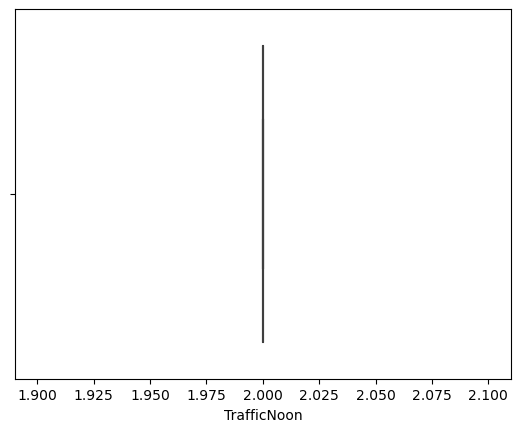

In [169]:
sns.boxplot(x = df_TrafficNoon)  

In [170]:
df_TrafficAfternoon = df["TrafficAfternoon"]
df_TrafficAfternoon

0       1
1       1
2       2
3       2
4       2
       ..
9944    2
9945    1
9946    2
9947    1
9948    1
Name: TrafficAfternoon, Length: 9949, dtype: int64

<AxesSubplot:xlabel='TrafficAfternoon'>

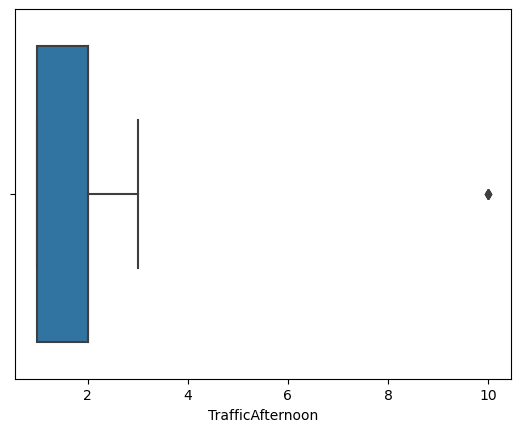

In [171]:
sns.boxplot(x = df_TrafficAfternoon) 

In [172]:
#bir aykırı değeri tanımlayabilmek için eşik değer belirlemek gerekir
#boxplot kutu grafiği kullanarak eşik değer belirleyelim

Q1 = df_TrafficAfternoon.quantile(0.25) #quantile(0.25) isimli fonks küçükten büyüğe sıralandığında 0,25 lik  indeksine karşılık gelen değeri alır
Q3 = df_TrafficAfternoon.quantile(0.75)
IQR = Q3-Q1  #veri setinin 0,25 ve 0,75 indexine karşılık gelen değerler üzerinden değer hesaplıcaz ve bu inter quartile IQR değeri elde edilir 
#kutu grafik = değişkenimizin dağılımını gösterir ve çeğrekliklerden oluşur

In [173]:
Q1

1.0

In [174]:
Q3

2.0

In [175]:
IQR

1.0

In [176]:
low_boundary = Q1-1.5*IQR #birinci çeğrek değerimizden (0.25) 1,5*IQR aşağısını alt sınır(eşikdeğer olarak belirle)
upper_boundary = Q3+1.5*IQR

In [177]:
low_boundary

-0.5

In [178]:
upper_boundary

3.5

In [179]:
df_TrafficAfternoon >upper_boundary

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: TrafficAfternoon, Length: 9949, dtype: bool

In [180]:
aykırı = (df_TrafficAfternoon > upper_boundary) 
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: TrafficAfternoon, Length: 9949, dtype: bool

In [181]:
outliers = df_TrafficAfternoon[aykırı]
outliers

1344    10
3241    10
6567    10
9509    10
Name: TrafficAfternoon, dtype: int64

In [182]:
df_TrafficAfternoon[aykırı] = upper_boundary #aykırı değerleri silmek istemeyip low bound ile doldurmak
df_TrafficAfternoon[aykırı]

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\2873855314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TrafficAfternoon[aykırı] = upper_boundary #aykırı değerleri silmek istemeyip low bound ile doldurmak


1344    3.5
3241    3.5
6567    3.5
9509    3.5
Name: TrafficAfternoon, dtype: float64

<AxesSubplot:xlabel='TrafficAfternoon'>

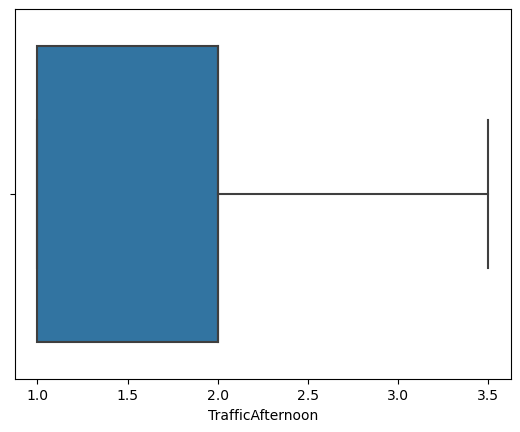

In [183]:
sns.boxplot(x = df_TrafficAfternoon)  

In [184]:
df_M6DeliveryCostPerKm = df["M6DeliveryCostPerKm"]
df_M6DeliveryCostPerKm

0          0
1        417
2        151
3          0
4          0
        ... 
9944       0
9945       0
9946    1071
9947    5000
9948       0
Name: M6DeliveryCostPerKm, Length: 9949, dtype: int64

<AxesSubplot:xlabel='M6DeliveryCostPerKm'>

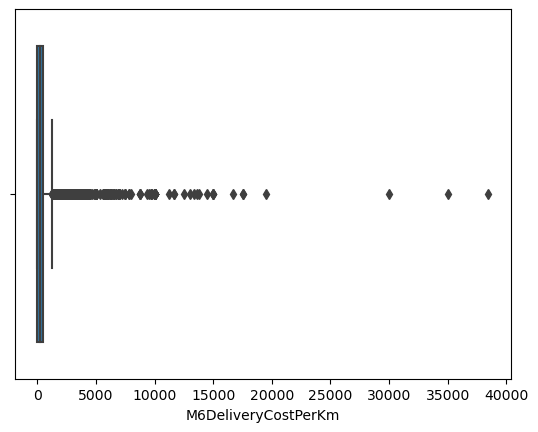

In [185]:
sns.boxplot(x = df_M6DeliveryCostPerKm)  

In [186]:
#bir aykırı değeri tanımlayabilmek için eşik değer belirlemek gerekir
#boxplot kutu grafiği kullanarak eşik değer belirleyelim

Q1 = df_M6DeliveryCostPerKm.quantile(0.25) #quantile(0.25) isimli fonks küçükten büyüğe sıralandığında 0,25 lik  indeksine karşılık gelen değeri alır
Q3 = df_M6DeliveryCostPerKm.quantile(0.75)
IQR = Q3-Q1  #veri setinin 0,25 ve 0,75 indexine karşılık gelen değerler üzerinden değer hesaplıcaz ve bu inter quartile IQR değeri elde edilir 
#kutu grafik = değişkenimizin dağılımını gösterir ve çeğrekliklerden oluşur

In [187]:
Q1

0.0

In [188]:
Q3

505.0

In [189]:
IQR

505.0

In [190]:
low_boundary = Q1-1.5*IQR #birinci çeğrek değerimizden (0.25) 1,5*IQR aşağısını alt sınır(eşikdeğer olarak belirle)
upper_boundary = Q3+1.5*IQR

In [191]:
low_boundary

-757.5

In [192]:
upper_boundary

1262.5

In [193]:
df_M6DeliveryCostPerKm > upper_boundary

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947     True
9948    False
Name: M6DeliveryCostPerKm, Length: 9949, dtype: bool

In [194]:
(df_M6DeliveryCostPerKm  <low_boundary)| (df_M6DeliveryCostPerKm  > upper_boundary)

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947     True
9948    False
Name: M6DeliveryCostPerKm, Length: 9949, dtype: bool

In [195]:
aykırı = (df_M6DeliveryCostPerKm  > upper_boundary)

In [196]:
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947     True
9948    False
Name: M6DeliveryCostPerKm, Length: 9949, dtype: bool

In [197]:
outliers = df_M6DeliveryCostPerKm [aykırı]

In [198]:
outliers

34      2000
37      1818
44      3750
87      5000
89      3000
        ... 
9915    3333
9925    3636
9941    1786
9943    2000
9947    5000
Name: M6DeliveryCostPerKm, Length: 903, dtype: int64

In [199]:
mean = np.mean(df_M6DeliveryCostPerKm)

In [200]:
standart_deviation = np.std(df_M6DeliveryCostPerKm)

In [201]:
mean

505.70409086340334

In [202]:
standart_deviation

1238.7025276633972

In [203]:
low_boundary

-757.5

In [204]:
upper_boundary

1262.5

In [205]:
df_M6DeliveryCostPerKm[aykırı] = df_M6DeliveryCostPerKm.std() #aykırı değerleri silmek istemeyip STD ile doldurmak

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\2469669994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M6DeliveryCostPerKm[aykırı] = df_M6DeliveryCostPerKm.std() #aykırı değerleri silmek istemeyip STD ile doldurmak


In [206]:
df_M6DeliveryCostPerKm[aykırı]

34      1238.764785
37      1238.764785
44      1238.764785
87      1238.764785
89      1238.764785
           ...     
9915    1238.764785
9925    1238.764785
9941    1238.764785
9943    1238.764785
9947    1238.764785
Name: M6DeliveryCostPerKm, Length: 903, dtype: float64

<AxesSubplot:xlabel='M6DeliveryCostPerKm'>

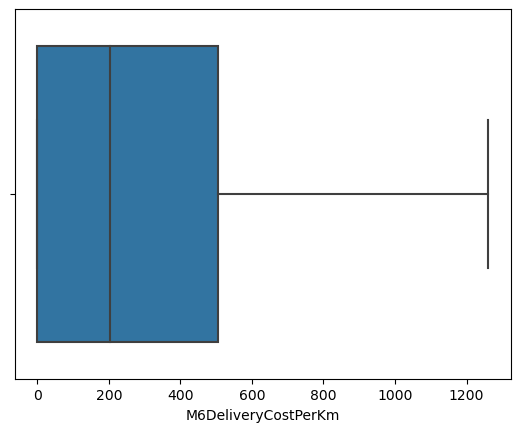

In [207]:
sns.boxplot(x = df_M6DeliveryCostPerKm) 

In [208]:
##DistanceKm 

In [209]:
df_DistanceKm = df["DistanceKm"]
df_DistanceKm 

0        4.6
1        7.2
2       19.9
3       13.3
4        7.9
        ... 
9944     8.5
9945    13.7
9946     2.8
9947     0.4
9948    22.8
Name: DistanceKm, Length: 9949, dtype: float64

<AxesSubplot:xlabel='DistanceKm'>

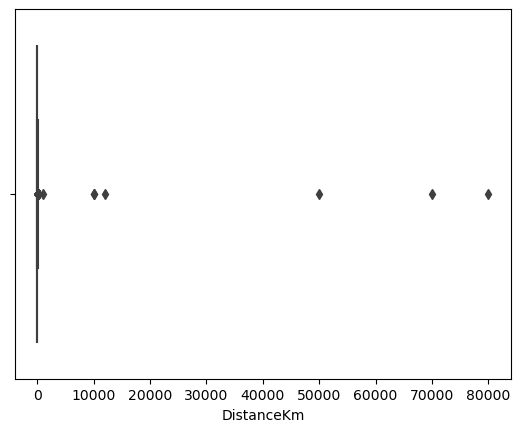

In [210]:
sns.boxplot(x = df_DistanceKm)  

In [211]:
Q1 = df_DistanceKm.quantile(0.25) 
Q3 = df_DistanceKm.quantile(0.75)
IQR = Q3-Q1

In [212]:
Q1

3.6

In [213]:
Q3

11.7

In [214]:
IQR

8.1

In [215]:
low_boundary = Q1-1.5*IQR 
upper_boundary = Q3+1.5*IQR

In [216]:
low_boundary

-8.549999999999999

In [217]:
upper_boundary 

23.849999999999998

In [218]:
df_DistanceKm

0        4.6
1        7.2
2       19.9
3       13.3
4        7.9
        ... 
9944     8.5
9945    13.7
9946     2.8
9947     0.4
9948    22.8
Name: DistanceKm, Length: 9949, dtype: float64

In [219]:
df_DistanceKm > upper_boundary

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: DistanceKm, Length: 9949, dtype: bool

In [220]:
(df_DistanceKm  < low_boundary) | (df_DistanceKm  > upper_boundary)

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: DistanceKm, Length: 9949, dtype: bool

In [221]:
aykırı = (df_DistanceKm > upper_boundary) 

In [222]:
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: DistanceKm, Length: 9949, dtype: bool

In [223]:
outliers = df_DistanceKm [aykırı]

In [224]:
outliers

5          25.0
7       10000.0
138        27.1
233        26.3
235        24.0
         ...   
9611       26.8
9702       25.4
9744       27.7
9749       25.6
9922       28.7
Name: DistanceKm, Length: 224, dtype: float64

In [225]:
mean = np.mean(df_DistanceKm)

In [226]:
mean

31.87022695748319

In [227]:
standart_deviation = np.std(df_DistanceKm)

In [228]:
standart_deviation

1191.9912040122401

In [229]:
df_DistanceKm[aykırı] = df_DistanceKm.mean()

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\3412113352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DistanceKm[aykırı] = df_DistanceKm.mean()


In [230]:
df_DistanceKm[aykırı]

5       31.870227
7       31.870227
138     31.870227
233     31.870227
235     31.870227
          ...    
9611    31.870227
9702    31.870227
9744    31.870227
9749    31.870227
9922    31.870227
Name: DistanceKm, Length: 224, dtype: float64

<AxesSubplot:xlabel='DistanceKm'>

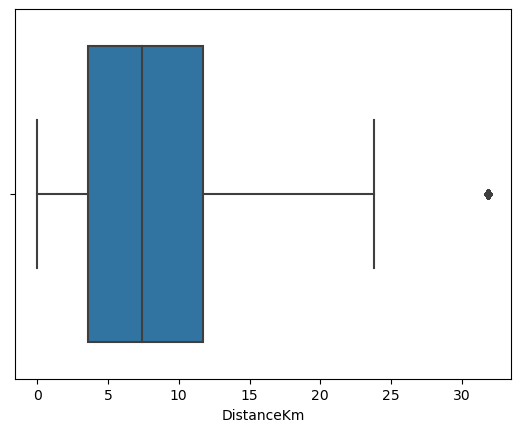

In [231]:
sns.boxplot(x = df_DistanceKm) 

In [232]:
df_DistanceKm[aykırı] = upper_boundary #aykırı değerleri silmek istemeyip low_bound ile doldurmak

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\915324874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DistanceKm[aykırı] = upper_boundary #aykırı değerleri silmek istemeyip low_bound ile doldurmak


<AxesSubplot:xlabel='DistanceKm'>

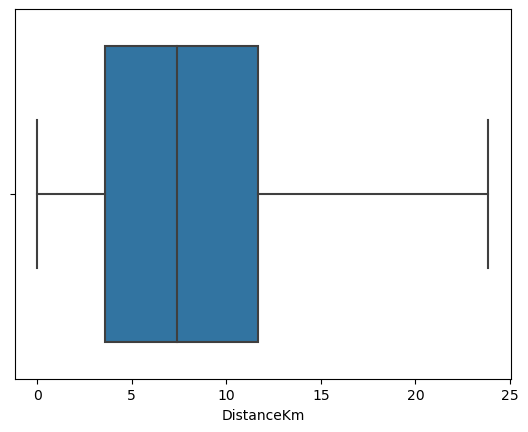

In [233]:
sns.boxplot(x = df_DistanceKm) 

In [234]:
##TimeMinutes

In [235]:
df_TimeMinutes = df["TimeMinutes"]
df_TimeMinutes

0       16
1       17
2       56
3       33
4       21
        ..
9944    25
9945    26
9946    12
9947     1
9948     1
Name: TimeMinutes, Length: 9949, dtype: int64

<AxesSubplot:xlabel='TimeMinutes'>

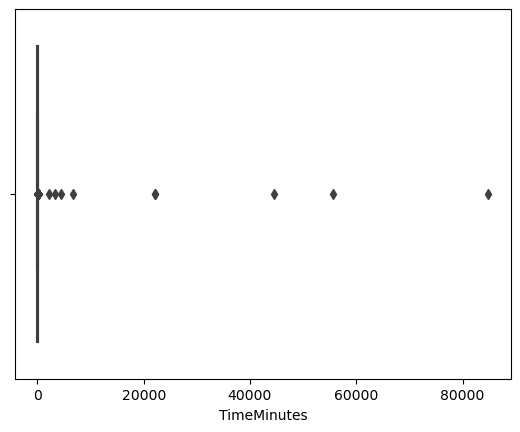

In [236]:
sns.boxplot(x = df_TimeMinutes)  

In [237]:
Q1 = df_TimeMinutes.quantile(0.25) 
Q3 = df_TimeMinutes.quantile(0.75)
IQR = Q3-Q1

In [238]:
Q1

11.0

In [239]:
Q3

28.0

In [240]:
IQR

17.0

In [241]:
low_boundary = Q1-1.5*IQR 
upper_boundary = Q3+1.5*IQR

In [242]:
low_boundary

-14.5

In [243]:
upper_boundary

53.5

In [244]:
df_TimeMinutes

0       16
1       17
2       56
3       33
4       21
        ..
9944    25
9945    26
9946    12
9947     1
9948     1
Name: TimeMinutes, Length: 9949, dtype: int64

In [245]:
df_TimeMinutes > upper_boundary

0       False
1       False
2        True
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: TimeMinutes, Length: 9949, dtype: bool

In [246]:
(df_TimeMinutes < low_boundary) | (df_TimeMinutes > upper_boundary)

0       False
1       False
2        True
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: TimeMinutes, Length: 9949, dtype: bool

In [247]:
aykırı = (df_TimeMinutes > upper_boundary) 

In [248]:
aykırı

0       False
1       False
2        True
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: TimeMinutes, Length: 9949, dtype: bool

In [249]:
outliers = df_TimeMinutes[aykırı]

In [250]:
outliers

2       56
18      57
58      54
73      56
135     54
        ..
9776    55
9812    54
9818    56
9863    55
9940    56
Name: TimeMinutes, Length: 286, dtype: int64

In [251]:
mean = np.mean(df_TimeMinutes)

In [252]:
mean

45.59543672730928

In [253]:
standart_deviation = np.std(df_TimeMinutes)

In [254]:
standart_deviation 

1156.8213444349487

In [255]:
df_TimeMinutes[aykırı] = df_TimeMinutes.mean() 

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\3305962233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TimeMinutes[aykırı] = df_TimeMinutes.mean()


In [256]:
df_TimeMinutes[aykırı]

2       45.595437
18      45.595437
58      45.595437
73      45.595437
135     45.595437
          ...    
9776    45.595437
9812    45.595437
9818    45.595437
9863    45.595437
9940    45.595437
Name: TimeMinutes, Length: 286, dtype: float64

<AxesSubplot:xlabel='TimeMinutes'>

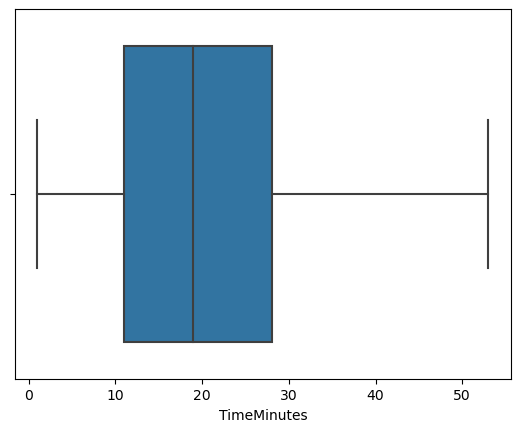

In [257]:
sns.boxplot(x = df_TimeMinutes)  

In [258]:
df_M1DeliveryCost= df["M1DeliveryCost"]
df_M1DeliveryCost

0          0.000000
1       3000.000000
2       3000.000000
3       2750.000000
4       2500.000000
           ...     
9944    1666.666667
9945    2333.333333
9946    3000.000000
9947    2000.000000
9948    2000.000000
Name: M1DeliveryCost, Length: 9949, dtype: float64

<AxesSubplot:xlabel='M1DeliveryCost'>

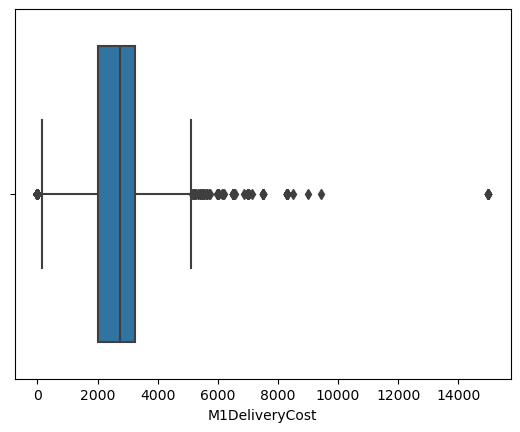

In [259]:
sns.boxplot(x = df_M1DeliveryCost)  

In [260]:
Q1 = df_M1DeliveryCost.quantile(0.25) 
Q3 = df_M1DeliveryCost.quantile(0.75)
IQR = Q3-Q1

In [261]:
Q1

2000.0

In [262]:
Q3

3250.0

In [263]:
IQR

1250.0

In [264]:
low_boundary = Q1-1.5*IQR 
upper_boundary = Q3+1.5*IQR

In [265]:
low_boundary

125.0

In [266]:
upper_boundary

5125.0

In [267]:
df_M1DeliveryCost

0          0.000000
1       3000.000000
2       3000.000000
3       2750.000000
4       2500.000000
           ...     
9944    1666.666667
9945    2333.333333
9946    3000.000000
9947    2000.000000
9948    2000.000000
Name: M1DeliveryCost, Length: 9949, dtype: float64

In [268]:
df_M1DeliveryCost > upper_boundary

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M1DeliveryCost, Length: 9949, dtype: bool

In [269]:
df_M1DeliveryCost < low_boundary

0        True
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M1DeliveryCost, Length: 9949, dtype: bool

In [270]:
(df_M1DeliveryCost < low_boundary) | (df_M1DeliveryCost > upper_boundary)

0        True
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M1DeliveryCost, Length: 9949, dtype: bool

In [271]:
aykırı = (df_M1DeliveryCost > upper_boundary) 
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M1DeliveryCost, Length: 9949, dtype: bool

In [272]:
outliers = df_M1DeliveryCost[aykırı]
outliers

30      6000.000000
71      7000.000000
73      5333.333333
74      6166.666667
75      7000.000000
           ...     
9450    7000.000000
9604    7000.000000
9613    7000.000000
9686    7000.000000
9826    6000.000000
Name: M1DeliveryCost, Length: 196, dtype: float64

In [273]:
mean = np.mean(df_M1DeliveryCost)
mean

2594.53050557845

In [274]:
standart_devision = np.std(df_M1DeliveryCost)
standart_devision

1288.2060812731293

In [275]:
df_M1DeliveryCost[aykırı] = upper_boundary

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\3324935362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M1DeliveryCost[aykırı] = upper_boundary


In [276]:
df_M1DeliveryCost[aykırı]

30      5125.0
71      5125.0
73      5125.0
74      5125.0
75      5125.0
         ...  
9450    5125.0
9604    5125.0
9613    5125.0
9686    5125.0
9826    5125.0
Name: M1DeliveryCost, Length: 196, dtype: float64

In [277]:
aykırı = (df_M1DeliveryCost < low_boundary) 
aykırı

0        True
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M1DeliveryCost, Length: 9949, dtype: bool

In [278]:
outliers = df_M1DeliveryCost[aykırı]
outliers

0       0.0
20      0.0
61      0.0
77      0.0
78      0.0
       ... 
9801    0.0
9846    0.0
9864    0.0
9913    0.0
9934    0.0
Name: M1DeliveryCost, Length: 582, dtype: float64

In [279]:
df_M1DeliveryCost[aykırı] = low_boundary

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\1324457906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M1DeliveryCost[aykırı] = low_boundary


In [280]:
df_M1DeliveryCost[aykırı]

0       125.0
20      125.0
61      125.0
77      125.0
78      125.0
        ...  
9801    125.0
9846    125.0
9864    125.0
9913    125.0
9934    125.0
Name: M1DeliveryCost, Length: 582, dtype: float64

<AxesSubplot:xlabel='M1DeliveryCost'>

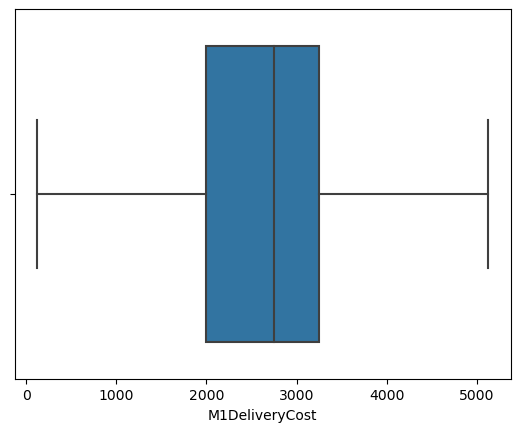

In [281]:
sns.boxplot(x = df_M1DeliveryCost)  

In [282]:
df_M2ExpectedDeliveryTime= df["M2ExpectedDeliveryTime"]
df_M2ExpectedDeliveryTime

0       45.000000
1       30.000000
2       40.000000
3       47.500000
4       55.000000
          ...    
9944    33.333333
9945    36.666667
9946    40.000000
9947    45.000000
9948    45.000000
Name: M2ExpectedDeliveryTime, Length: 9949, dtype: float64

<AxesSubplot:xlabel='M2ExpectedDeliveryTime'>

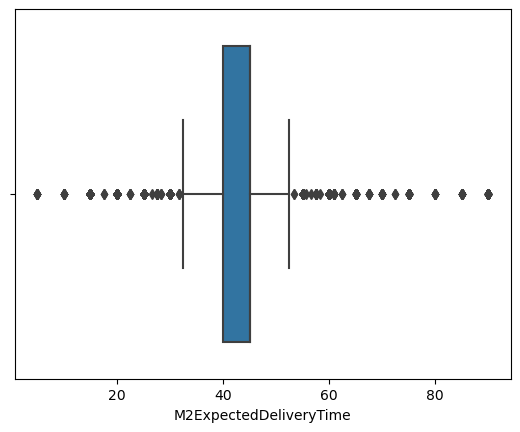

In [283]:
sns.boxplot(x = df_M2ExpectedDeliveryTime)  

In [284]:
Q1 = df_M2ExpectedDeliveryTime.quantile(0.25) 
Q3 = df_M2ExpectedDeliveryTime.quantile(0.75)
IQR = Q3-Q1

In [285]:
Q1

40.0

In [286]:
Q3

45.0

In [287]:
IQR

5.0

In [288]:
low_boundary = Q1-1.5*IQR 
upper_boundary = Q3+1.5*IQR

In [289]:
low_boundary

32.5

In [290]:
upper_boundary

52.5

In [291]:
mean = np.mean(df_M2ExpectedDeliveryTime)
mean

44.39380842295708

In [292]:
standart_devision = np.std(df_M2ExpectedDeliveryTime)
standart_devision

12.343430277676905

In [293]:
aykırı = (df_M2ExpectedDeliveryTime > upper_boundary) 
aykırı

0       False
1       False
2       False
3       False
4        True
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M2ExpectedDeliveryTime, Length: 9949, dtype: bool

In [294]:
outliers = df_M2ExpectedDeliveryTime[aykırı]
outliers

4       55.0
5       55.0
11      75.0
14      60.0
16      60.0
        ... 
9906    60.0
9923    60.0
9932    60.0
9935    60.0
9941    60.0
Name: M2ExpectedDeliveryTime, Length: 1884, dtype: float64

In [295]:
df_M2ExpectedDeliveryTime[aykırı] = upper_boundary

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\3560830324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M2ExpectedDeliveryTime[aykırı] = upper_boundary


In [296]:
df_M2ExpectedDeliveryTime[aykırı]

4       52.5
5       52.5
11      52.5
14      52.5
16      52.5
        ... 
9906    52.5
9923    52.5
9932    52.5
9935    52.5
9941    52.5
Name: M2ExpectedDeliveryTime, Length: 1884, dtype: float64

In [297]:
aykırı = (df_M2ExpectedDeliveryTime < low_boundary) 
aykırı

0       False
1        True
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M2ExpectedDeliveryTime, Length: 9949, dtype: bool

In [298]:
outliers = df_M2ExpectedDeliveryTime[aykırı]
outliers

1       30.0
29      25.0
30      30.0
33      30.0
39      30.0
        ... 
9915    30.0
9916    15.0
9918    30.0
9930    20.0
9943    30.0
Name: M2ExpectedDeliveryTime, Length: 1565, dtype: float64

In [299]:
df_M2ExpectedDeliveryTime[aykırı] = low_boundary

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\3932969063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M2ExpectedDeliveryTime[aykırı] = low_boundary


<AxesSubplot:xlabel='M2ExpectedDeliveryTime'>

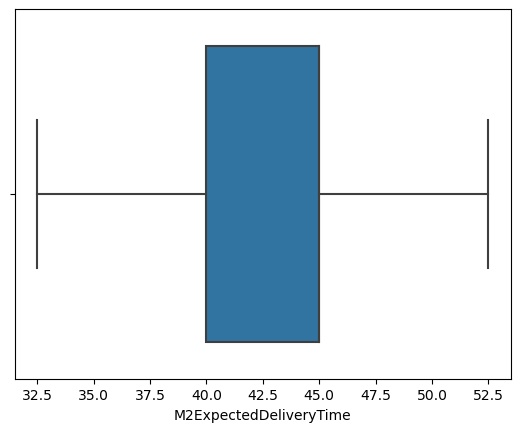

In [300]:
sns.boxplot(x = df_M2ExpectedDeliveryTime) 

In [301]:
df_M3MinChargeForOrdering= df["M3MinChargeForOrdering" ]
df_M3MinChargeForOrdering

0        9000.000000
1       15000.000000
2       15900.000000
3       10850.000000
4        5800.000000
            ...     
9944     7466.666667
9945     6433.333333
9946     5400.000000
9947    10000.000000
9948    10000.000000
Name: M3MinChargeForOrdering, Length: 9949, dtype: float64

<AxesSubplot:xlabel='M3MinChargeForOrdering'>

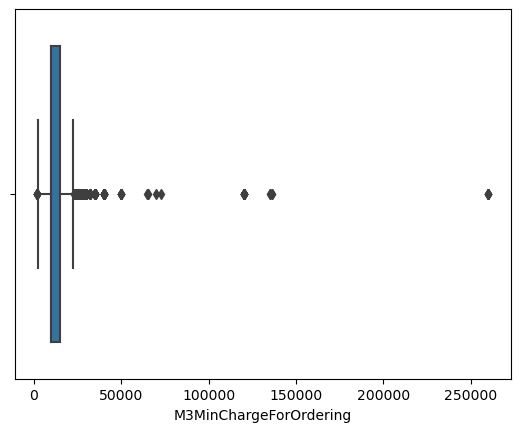

In [302]:
sns.boxplot(x = df_M3MinChargeForOrdering) 

In [303]:
mean = np.mean(df_M3MinChargeForOrdering)
mean

13007.028344557242

In [304]:
standart_devision = np.std(df_M3MinChargeForOrdering)
standart_devision

9986.086914210597

In [305]:
Q1 = df_M3MinChargeForOrdering.quantile(0.25) 
Q3 = df_M3MinChargeForOrdering.quantile(0.75)
IQR = Q3-Q1

In [306]:
Q1

9900.0

In [307]:
Q3

15000.0

In [308]:
IQR

5100.0

In [309]:
low_boundary = Q1-1.5*IQR 
upper_boundary = Q3+1.5*IQR

In [310]:
low_boundary

2250.0

In [311]:
upper_boundary

22650.0

In [312]:
aykırı = (df_M3MinChargeForOrdering > upper_boundary) 
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M3MinChargeForOrdering, Length: 9949, dtype: bool

In [313]:
outliers = df_M3MinChargeForOrdering[aykırı]
outliers

11      32000.0
37      25000.0
39      30000.0
61      40000.0
132     30000.0
         ...   
9864    30000.0
9879    30000.0
9892    29800.0
9903    30000.0
9904    35000.0
Name: M3MinChargeForOrdering, Length: 505, dtype: float64

In [314]:
df_M3MinChargeForOrdering[aykırı] = upper_boundary

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\537380133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M3MinChargeForOrdering[aykırı] = upper_boundary


In [315]:
df_M3MinChargeForOrdering[aykırı]

11      22650.0
37      22650.0
39      22650.0
61      22650.0
132     22650.0
         ...   
9864    22650.0
9879    22650.0
9892    22650.0
9903    22650.0
9904    22650.0
Name: M3MinChargeForOrdering, Length: 505, dtype: float64

In [316]:
aykırı = (df_M3MinChargeForOrdering < low_boundary) 
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M3MinChargeForOrdering, Length: 9949, dtype: bool

In [317]:
outliers = df_M3MinChargeForOrdering[aykırı]
outliers

1463    2000.0
2312    2000.0
3957    2000.0
4174    2000.0
4576    2000.0
4651    2000.0
4735    2000.0
5570    2000.0
7041    2000.0
8090    2000.0
8228    2000.0
8575    2000.0
9836    2000.0
Name: M3MinChargeForOrdering, dtype: float64

In [318]:
df_M3MinChargeForOrdering[aykırı] = low_boundary

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\2190741524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M3MinChargeForOrdering[aykırı] = low_boundary


In [319]:
df_M3MinChargeForOrdering[aykırı] 

1463    2250.0
2312    2250.0
3957    2250.0
4174    2250.0
4576    2250.0
4651    2250.0
4735    2250.0
5570    2250.0
7041    2250.0
8090    2250.0
8228    2250.0
8575    2250.0
9836    2250.0
Name: M3MinChargeForOrdering, dtype: float64

<AxesSubplot:xlabel='M3MinChargeForOrdering'>

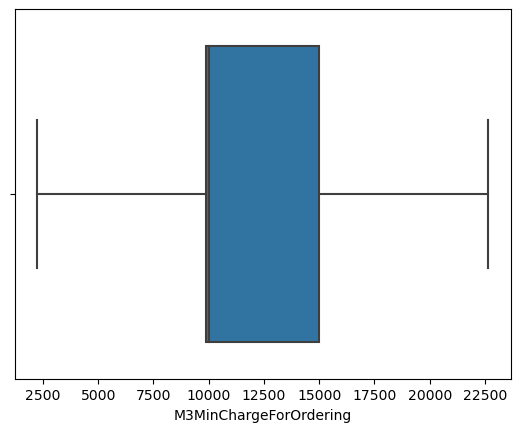

In [320]:
sns.boxplot(x = df_M3MinChargeForOrdering) 

In [321]:
df_M3LogMinChargeForOrdering= df["M3LogMinChargeForOrdering" ]
df_M3LogMinChargeForOrdering

0       9.104980
1       9.615805
2       9.674074
3       9.169844
4       8.665613
          ...   
9944    8.896599
9945    8.745377
9946    8.594154
9947    9.210340
9948    9.210340
Name: M3LogMinChargeForOrdering, Length: 9949, dtype: float64

<AxesSubplot:xlabel='M3LogMinChargeForOrdering'>

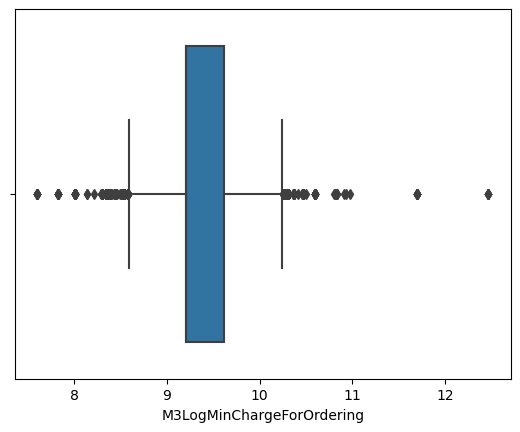

In [322]:
sns.boxplot(x = df_M3LogMinChargeForOrdering) 

In [323]:
Q1 = df_M3LogMinChargeForOrdering.quantile(0.25) 
Q3 = df_M3LogMinChargeForOrdering.quantile(0.75)
IQR = Q3-Q1

In [324]:
Q1

9.20029003612268

In [325]:
Q3

9.615805480084347

In [326]:
IQR

0.4155154439616666

In [327]:
mean = np.mean(df_M3LogMinChargeForOrdering)
mean

9.358770801753389

In [328]:
standart_devision = np.std(df_M3LogMinChargeForOrdering)
standart_devision

0.41943156254217057

In [329]:
low_boundary = Q1-1.5*IQR 
upper_boundary = Q3+1.5*IQR

In [330]:
low_boundary

8.57701687018018

In [331]:
upper_boundary

10.239078646026847

In [332]:
aykırı = (df_M3LogMinChargeForOrdering < low_boundary) 
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M3LogMinChargeForOrdering, Length: 9949, dtype: bool

In [333]:
outliers = df_M3LogMinChargeForOrdering[aykırı]
outliers

32      7.824046
49      8.517193
109     8.389360
147     8.006368
148     8.430016
          ...   
9534    8.294050
9596    8.366370
9787    8.006368
9836    7.600902
9894    8.575462
Name: M3LogMinChargeForOrdering, Length: 259, dtype: float64

In [334]:
df_M3LogMinChargeForOrdering[aykırı] = low_boundary

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\1024182866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M3LogMinChargeForOrdering[aykırı] = low_boundary


In [335]:
df_M3LogMinChargeForOrdering[aykırı]

32      8.577017
49      8.577017
109     8.577017
147     8.577017
148     8.577017
          ...   
9534    8.577017
9596    8.577017
9787    8.577017
9836    8.577017
9894    8.577017
Name: M3LogMinChargeForOrdering, Length: 259, dtype: float64

In [336]:
aykırı = (df_M3LogMinChargeForOrdering > upper_boundary) 
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M3LogMinChargeForOrdering, Length: 9949, dtype: bool

In [337]:
outliers = df_M3LogMinChargeForOrdering[aykırı]
outliers

11      10.373491
39      10.308953
61      10.596635
132     10.308953
144     10.596635
          ...    
9864    10.308953
9879    10.308953
9892    10.302264
9903    10.308953
9904    10.463103
Name: M3LogMinChargeForOrdering, Length: 267, dtype: float64

In [338]:
df_M3LogMinChargeForOrdering[aykırı] = upper_boundary

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\1450708558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M3LogMinChargeForOrdering[aykırı] = upper_boundary


In [339]:
df_M3LogMinChargeForOrdering[aykırı]

11      10.239079
39      10.239079
61      10.239079
132     10.239079
144     10.239079
          ...    
9864    10.239079
9879    10.239079
9892    10.239079
9903    10.239079
9904    10.239079
Name: M3LogMinChargeForOrdering, Length: 267, dtype: float64

<AxesSubplot:xlabel='M3LogMinChargeForOrdering'>

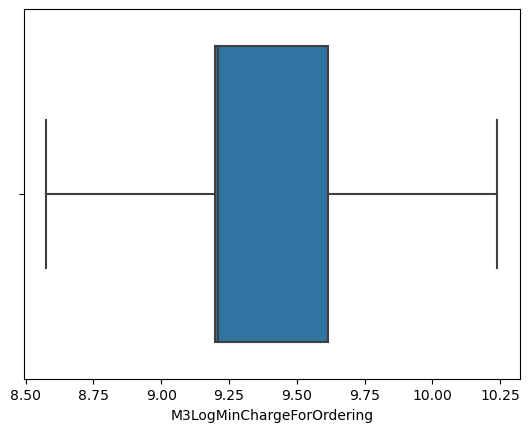

In [340]:
sns.boxplot(x = df_M3LogMinChargeForOrdering) 

In [341]:
df_M4NumberOfComments= df["M4NumberOfComments"]
df_M4NumberOfComments


0        0.000000
1        0.000000
2       45.000000
3       39.500000
4       34.000000
          ...    
9944    29.333333
9945    43.666667
9946    58.000000
9947     4.000000
9948     4.000000
Name: M4NumberOfComments, Length: 9949, dtype: float64

<AxesSubplot:xlabel='M4NumberOfComments'>

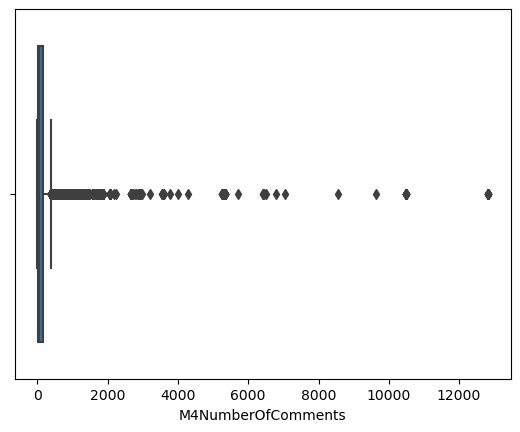

In [342]:
sns.boxplot(x = df_M4NumberOfComments) 

In [343]:
Q1 = df_M4NumberOfComments.quantile(0.25) 
Q3 = df_M4NumberOfComments.quantile(0.75)
IQR = Q3-Q1

In [344]:
Q1

5.0

Q3

In [345]:
Q3

153.0

In [346]:
IQR

148.0

In [347]:
mean = np.mean(df_M4NumberOfComments)
mean

209.59131571012162

In [348]:
std = np.std(df_M4NumberOfComments)
std

792.2630106369626

In [349]:
low_boundary = Q1-1.5*IQR 
upper_boundary = Q3+1.5*IQR

In [350]:
low_boundary

-217.0

In [351]:
upper_boundary

375.0

In [352]:
aykırı = (df_M4NumberOfComments > upper_boundary) 
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M4NumberOfComments, Length: 9949, dtype: bool

In [353]:
outliers = df_M4NumberOfComments[aykırı]
outliers

14       394.0
16       760.0
17       514.0
20       733.0
33       611.0
         ...  
9892     419.0
9898     623.0
9903     474.0
9923    1330.0
9925     941.0
Name: M4NumberOfComments, Length: 1217, dtype: float64

In [354]:
df_M4NumberOfComments[aykırı] = upper_boundary

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\4021481613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M4NumberOfComments[aykırı] = upper_boundary


In [355]:
df_M4NumberOfComments[aykırı] 

14      375.0
16      375.0
17      375.0
20      375.0
33      375.0
        ...  
9892    375.0
9898    375.0
9903    375.0
9923    375.0
9925    375.0
Name: M4NumberOfComments, Length: 1217, dtype: float64

<AxesSubplot:xlabel='M4NumberOfComments'>

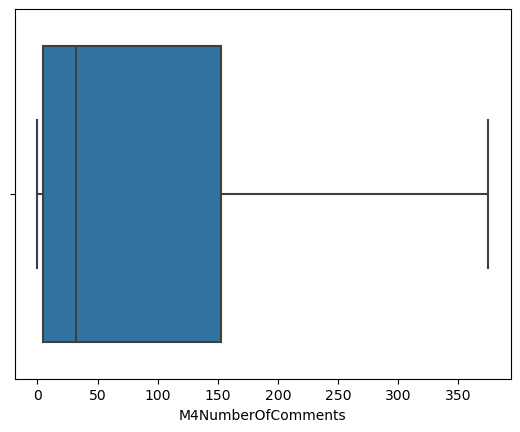

In [356]:
sns.boxplot(x = df_M4NumberOfComments) 

In [357]:
df_M4LogNumberOfComments= df["M4LogNumberOfComments"]
df_M4LogNumberOfComments


0       3.806662
1       3.806662
2       3.806662
3       3.666512
4       3.526361
          ...   
9944    3.158848
9945    3.609645
9946    4.060443
9947    1.386294
9948    1.386294
Name: M4LogNumberOfComments, Length: 9949, dtype: float64

<AxesSubplot:xlabel='M4LogNumberOfComments'>

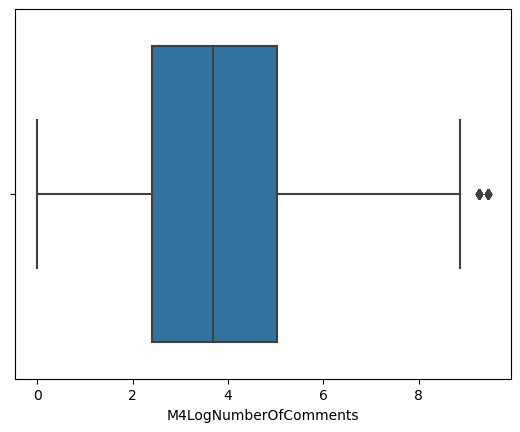

In [358]:
sns.boxplot(x = df_M4LogNumberOfComments) 

In [359]:
Q1 = df_M4LogNumberOfComments.quantile(0.25) 
Q3 = df_M4LogNumberOfComments.quantile(0.75)
IQR = Q3-Q1

In [360]:
Q1

2.3978952727983707

In [361]:
Q3

5.017279836814924

In [362]:
IQR

2.6193845640165536

In [363]:
mean = np.mean(df_M4LogNumberOfComments)
mean

3.683359249133498

In [364]:
std = np.std(df_M4LogNumberOfComments)
std

1.802854631157431

In [365]:
low_boundary = Q1-1.5*IQR 
upper_boundary = Q3+1.5*IQR

In [366]:
low_boundary

-1.5311815732264598

In [367]:
upper_boundary

8.946356682839754

In [368]:
aykırı = (df_M4LogNumberOfComments > upper_boundary) 
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M4LogNumberOfComments, Length: 9949, dtype: bool

In [369]:
outliers = df_M4LogNumberOfComments[aykırı]
outliers

506     9.257415
600     9.257415
1222    9.257415
1380    9.459697
1638    9.459697
2039    9.459697
2357    9.459697
3122    9.257415
4311    9.257415
4409    9.257415
4437    9.459697
5373    9.459697
5503    9.257415
5912    9.459697
5984    9.459697
6192    9.257415
7284    9.257415
7474    9.459697
8016    9.257415
8158    9.257415
8281    9.257415
8289    9.257415
8459    9.257415
8756    9.459697
8899    9.257415
8923    9.459697
9120    9.459697
9671    9.459697
Name: M4LogNumberOfComments, dtype: float64

In [370]:
df_M4LogNumberOfComments[aykırı] = upper_boundary

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\1499439797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M4LogNumberOfComments[aykırı] = upper_boundary


In [371]:
df_M4LogNumberOfComments[aykırı]

506     8.946357
600     8.946357
1222    8.946357
1380    8.946357
1638    8.946357
2039    8.946357
2357    8.946357
3122    8.946357
4311    8.946357
4409    8.946357
4437    8.946357
5373    8.946357
5503    8.946357
5912    8.946357
5984    8.946357
6192    8.946357
7284    8.946357
7474    8.946357
8016    8.946357
8158    8.946357
8281    8.946357
8289    8.946357
8459    8.946357
8756    8.946357
8899    8.946357
8923    8.946357
9120    8.946357
9671    8.946357
Name: M4LogNumberOfComments, dtype: float64

<AxesSubplot:xlabel='M4LogNumberOfComments'>

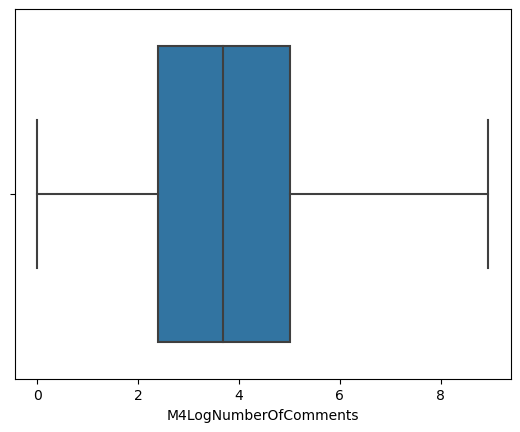

In [372]:
sns.boxplot(x = df_M4LogNumberOfComments) 

In [373]:
df_M5DeliveryTimeFulfillment= df["M5DeliveryTimeFulfillment"]
df_M5DeliveryTimeFulfillment


0       29.0
1       13.0
2      -16.0
3        9.0
4       34.0
        ... 
9944    28.0
9945    28.0
9946    28.0
9947    44.0
9948    44.0
Name: M5DeliveryTimeFulfillment, Length: 9949, dtype: float64

<AxesSubplot:xlabel='M5DeliveryTimeFulfillment'>

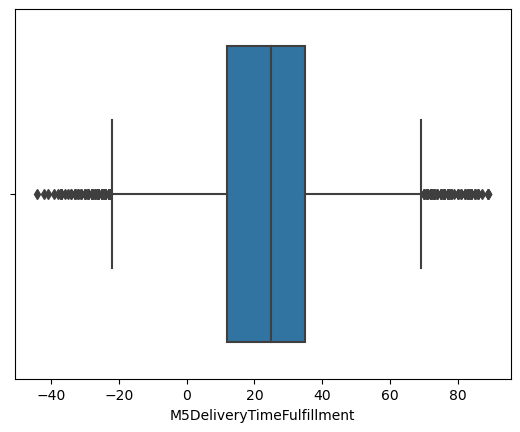

In [374]:
sns.boxplot(x = df_M5DeliveryTimeFulfillment) 

In [375]:
Q1 = df_M5DeliveryTimeFulfillment.quantile(0.25) 
Q3 = df_M5DeliveryTimeFulfillment.quantile(0.75)
IQR = Q3-Q1

In [376]:
mean = np.mean(df_M5DeliveryTimeFulfillment)
mean

23.43908935571414

In [377]:
std = np.std(df_M5DeliveryTimeFulfillment)
std

17.865163681503265

In [378]:
low_boundary = Q1-1.5*IQR 
upper_boundary = Q3+1.5*IQR

In [379]:
low_boundary

-22.5

In [380]:
upper_boundary

69.5

In [381]:
aykırı = (df_M5DeliveryTimeFulfillment > upper_boundary) 
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M5DeliveryTimeFulfillment, Length: 9949, dtype: bool

In [382]:
outliers = df_M5DeliveryTimeFulfillment[aykırı]
outliers

177     83.0
259     72.0
313     80.0
331     85.0
439     73.0
        ... 
9036    71.0
9448    76.0
9491    89.0
9613    83.0
9734    71.0
Name: M5DeliveryTimeFulfillment, Length: 88, dtype: float64

In [383]:
df_M5DeliveryTimeFulfillment[aykırı] = upper_boundary

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\3136914230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M5DeliveryTimeFulfillment[aykırı] = upper_boundary


In [384]:
aykırı = (df_M5DeliveryTimeFulfillment < low_boundary) 
aykırı

0       False
1       False
2       False
3       False
4       False
        ...  
9944    False
9945    False
9946    False
9947    False
9948    False
Name: M5DeliveryTimeFulfillment, Length: 9949, dtype: bool

In [385]:
outliers = df_M5DeliveryTimeFulfillment[aykırı]
outliers

62     -23.0
183    -28.0
193    -26.0
246    -27.0
358    -28.0
        ... 
9376   -24.0
9548   -26.0
9619   -30.0
9804   -23.0
9909   -38.0
Name: M5DeliveryTimeFulfillment, Length: 93, dtype: float64

In [386]:
df_M5DeliveryTimeFulfillment[aykırı] = low_boundary

C:\Users\esaty\AppData\Local\Temp\ipykernel_32780\463988654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M5DeliveryTimeFulfillment[aykırı] = low_boundary


<AxesSubplot:xlabel='M5DeliveryTimeFulfillment'>

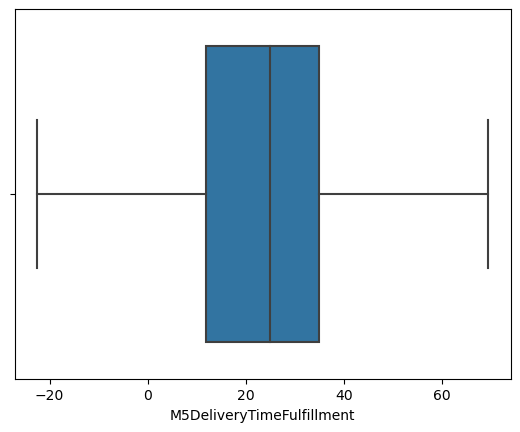

In [387]:
sns.boxplot(x = df_M5DeliveryTimeFulfillment) 

In [388]:
#classoversampling-balanced

In [389]:
# class count
class_count_0 = df['M5Class'].value_counts()

# Separate class
class_0 = df[df['M5Class'] == 0]
class_1 = df[df['M5Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (945, 19)
class 1: (8868, 19)


C:\Users\esaty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


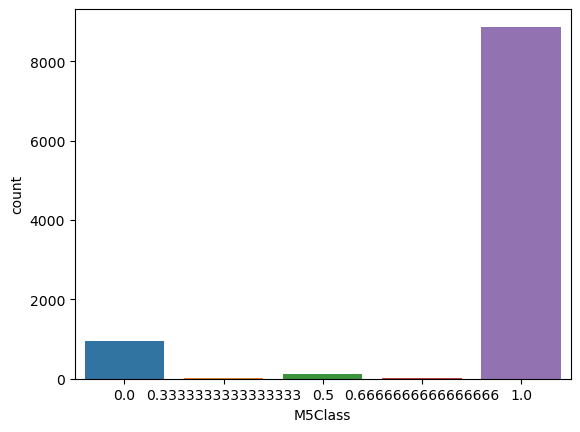

In [390]:
sns.countplot(df['M5Class'])
from sklearn.utils import resample, shuffle
zero= df[df['M5Class']==0]
ones= df[df['M5Class']==1]

In [391]:
upsampled= resample(ones, replace=True, n_samples=zero.shape[0])

In [392]:
df_new1= pd.concat([zero, upsampled])
df_new1= shuffle(df_new1)

C:\Users\esaty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='M5Class', ylabel='count'>

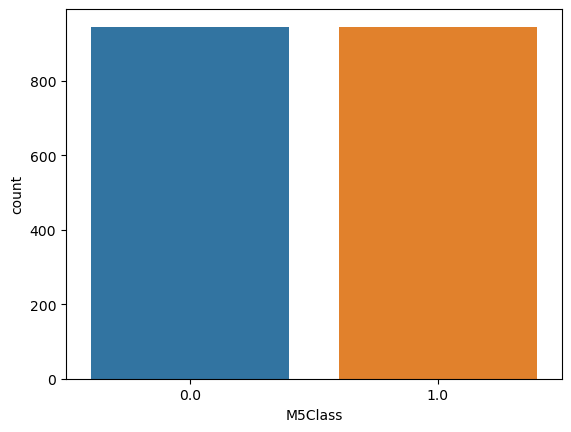

In [393]:
sns.countplot(df_new1['M5Class'])

In [394]:
# class count
class_count_0, class_count_1 = df['M6Class'].value_counts()

# Separate class
class_0 = df[df['M6Class'] == 0]
class_1 = df[df['M6Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (336, 19)
class 1: (9613, 19)


C:\Users\esaty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


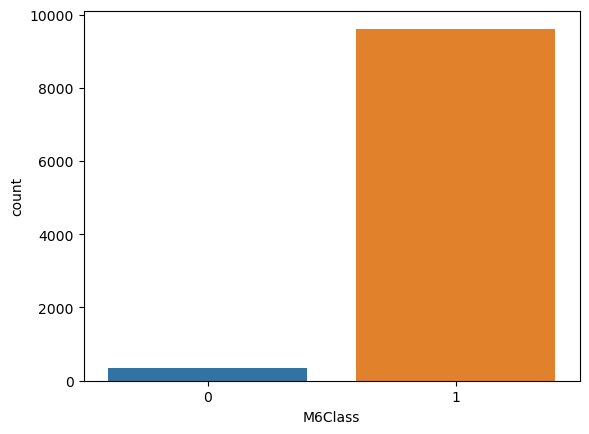

In [395]:
sns.countplot(df['M6Class'])
from sklearn.utils import resample, shuffle
zero= df[df['M6Class']==0]
ones= df[df['M6Class']==1]

In [396]:
upsampled= resample(ones, replace=True, n_samples=zero.shape[0])

C:\Users\esaty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


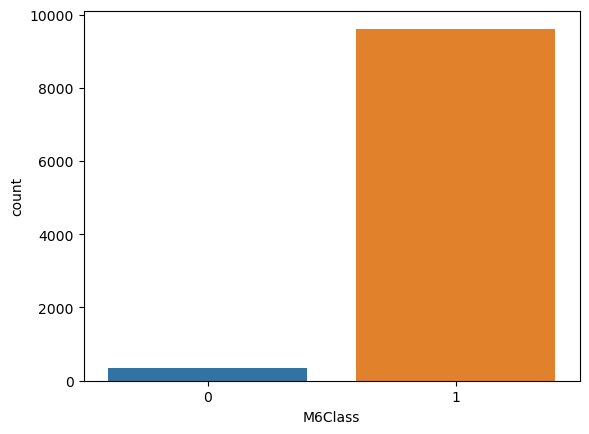

In [397]:
sns.countplot(df['M6Class'])
from sklearn.utils import resample, shuffle
zero= df[df['M6Class']==0]
ones= df[df['M6Class']==1]


In [398]:
upsampled= resample(ones, replace=True, n_samples=zero.shape[0])

In [399]:
df_new2= pd.concat([zero, upsampled])
df_new2= shuffle(df_new2)

C:\Users\esaty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='M6Class', ylabel='count'>

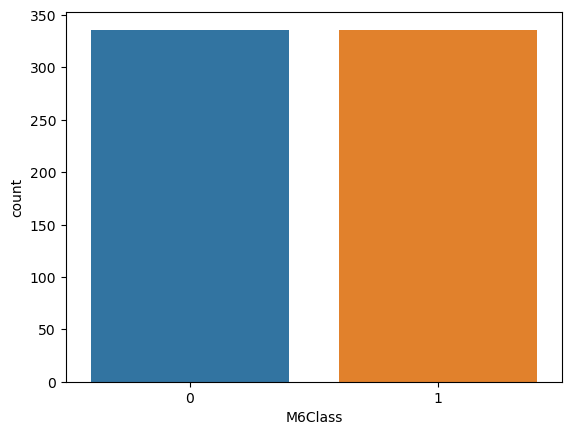

In [400]:
sns.countplot(df_new2['M6Class'])

In [401]:
#FEATURESELECTIONNUMBER1FORM6

In [402]:
y = df_new2['M6Class']
 #Load X Variables into a Pandas Dataframe with columns 
X = df_new2.drop(['M5Class','M6Class','TransactionID '], axis = 1)

In [403]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42 ,test_size=0.3)

In [404]:
%matplotlib inline
def correlation(data_df, threshold):
    col_corr = set()  
    corr_matrix = data_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: colname = corr_matrix.columns[i]                  
    col_corr.add(colname)
    return col_corr

In [405]:
corr_features = correlation(X_train, 0.7)
corr_features

{'M6DeliveryCostPerKm'}

In [406]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)
X_train

,TimeOfDay,RestaurantLatitude,RestaurantLongitude,TrafficMorning,TrafficNoon,TrafficAfternoon,DistanceKm,TimeMinutes,M1DeliveryCost,M2ExpectedDeliveryTime,M3MinChargeForOrdering,M3LogMinChargeForOrdering,M4NumberOfComments,M4LogNumberOfComments,M5DeliveryTimeFulfillment,M6DeliveryCostPerKm
9710,3,4.636775,-74.074914,2,2,2.0,0.3,1.000000,3000.000000,52.5,11000.0,9.305651,254.000000,5.537334,54.0,1238.764785
8522,3,4.684059,-74.046898,1,2,1.0,1.6,6.000000,4100.000000,50.0,20000.0,9.903488,375.000000,6.529419,44.0,1238.764785
7978,1,4.736632,-74.100267,2,2,2.0,1.2,5.000000,5000.000000,52.5,12800.0,9.457200,105.000000,4.653960,55.0,1238.764785
412,3,4.638224,-74.063120,2,2,2.0,1.7,45.595437,2500.000000,52.5,10000.0,9.210340,120.000000,4.787492,47.0,1238.764785
2348,2,4.631854,-74.084877,2,2,1.0,1.0,5.000000,3000.000000,45.0,15200.0,9.277606,0.000000,2.138333,40.0,1238.764785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222,2,4.673158,-74.050228,1,2,1.0,9.0,18.000000,2833.333333,40.0,10000.0,9.210340,11.333333,1.155245,22.0,0.000000
1121,2,4.719535,-74.047104,2,2,2.0,1.1,4.000000,3800.000000,52.5,18500.0,9.825526,181.000000,5.198497,56.0,1238.764785
6801,2,4.640118,-74.076134,2,2,2.0,0.2,1.000000,3000.000000,52.5,13000.0,9.472705,375.000000,6.228511,59.0,1238.764785
5970,1,4.755008,-74.080259,2,2,2.0,8.8,21.000000,4000.000000,52.5,16000.0,9.680344,254.000000,5.537334,39.0,455.000000


In [407]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.0520528 , 0.01325315, 0.        , 0.        ,
       0.        , 0.52864666, 0.50164213, 0.12248753, 0.00586487,
       0.02929151, 0.03781706, 0.        , 0.        , 0.24308906,
       0.58989813])

In [408]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

M6DeliveryCostPerKm          0.589898
DistanceKm                   0.528647
TimeMinutes                  0.501642
M5DeliveryTimeFulfillment    0.243089
M1DeliveryCost               0.122488
RestaurantLatitude           0.052053
M3LogMinChargeForOrdering    0.037817
M3MinChargeForOrdering       0.029292
RestaurantLongitude          0.013253
M2ExpectedDeliveryTime       0.005865
TimeOfDay                    0.000000
TrafficMorning               0.000000
TrafficNoon                  0.000000
TrafficAfternoon             0.000000
M4NumberOfComments           0.000000
M4LogNumberOfComments        0.000000
dtype: float64

In [409]:
from sklearn.feature_selection import SelectKBest
#No we Will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=6)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['RestaurantLatitude', 'DistanceKm', 'TimeMinutes', 'M1DeliveryCost',
       'M5DeliveryTimeFulfillment', 'M6DeliveryCostPerKm'],
      dtype='object')

In [410]:
#FEATURESELECTIONNUMBER1FORM5

In [411]:
y = df_new1['M5Class']
 #Load X Variables into a Pandas Dataframe with columns 
X = df_new1.drop(['M5Class','M6Class'], axis = 1)

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42 ,test_size=0.3)

In [413]:
%matplotlib inline
def correlation(data_df, threshold):
    col_corr = set()  
    corr_matrix = data_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: colname = corr_matrix.columns[i]                  
    col_corr.add(colname)
    return col_corr

In [414]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)
X_train

,TransactionID,TimeOfDay,RestaurantLatitude,RestaurantLongitude,TrafficMorning,TrafficNoon,TrafficAfternoon,DistanceKm,TimeMinutes,M1DeliveryCost,M2ExpectedDeliveryTime,M3MinChargeForOrdering,M3LogMinChargeForOrdering,M4NumberOfComments,M4LogNumberOfComments,M5DeliveryTimeFulfillment,M6DeliveryCostPerKm
976,4086,1,4.713288,-74.033804,1,2,2.0,23.85,45.595437,3800.0,52.5,22500.0,10.015059,349.0,5.855072,-3.0,148.0
8187,11991,3,4.627740,-74.066068,2,2,2.0,20.90,51.000000,2000.0,45.0,10000.0,9.210340,150.0,4.963480,-6.0,0.0
7643,18114,2,4.700286,-74.031155,1,2,1.0,10.60,23.000000,2000.0,45.0,10000.0,9.210340,1.0,0.000000,22.0,189.0
2977,19392,1,4.570441,-74.082362,2,2,2.0,1.50,6.000000,125.0,32.5,8000.0,8.843356,3.0,1.098612,9.0,0.0
1717,19714,2,4.674605,-74.142462,1,2,2.0,8.30,21.000000,1000.0,32.5,7500.0,8.922658,1.0,0.000000,-1.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,6998,2,4.616369,-74.069626,2,2,2.0,0.60,2.000000,2500.0,40.0,20000.0,9.903488,14.0,3.406586,38.0,0.0
1533,646,3,4.724348,-74.030173,1,2,2.0,23.85,53.000000,3000.0,52.5,8100.0,8.999619,375.0,6.504288,7.0,123.0
6077,6683,2,4.642805,-74.127098,1,2,2.0,8.80,29.000000,3100.0,32.5,11900.0,9.384294,44.0,3.784190,-9.0,352.0
8870,6494,2,4.630532,-74.074783,1,2,1.0,19.90,45.595437,2000.0,50.0,20500.0,9.928180,59.0,4.077537,-8.0,101.0


In [415]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.1199742 , 0.        , 0.11995501, 0.12011911, 0.00421693,
       0.        , 0.02985919, 0.24843193, 0.29016284, 0.0245293 ,
       0.13898214, 0.05822305, 0.04547503, 0.06378278, 0.08290461,
       0.69337413, 0.1653423 ])

In [416]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

M5DeliveryTimeFulfillment    0.693374
TimeMinutes                  0.290163
DistanceKm                   0.248432
M6DeliveryCostPerKm          0.165342
M2ExpectedDeliveryTime       0.138982
RestaurantLongitude          0.120119
TransactionID                0.119974
RestaurantLatitude           0.119955
M4LogNumberOfComments        0.082905
M4NumberOfComments           0.063783
M3MinChargeForOrdering       0.058223
M3LogMinChargeForOrdering    0.045475
TrafficAfternoon             0.029859
M1DeliveryCost               0.024529
TrafficMorning               0.004217
TrafficNoon                  0.000000
TimeOfDay                    0.000000
dtype: float64

In [417]:
from sklearn.feature_selection import SelectKBest
#No we Will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=8)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['TransactionID ', 'RestaurantLatitude', 'RestaurantLongitude',
       'DistanceKm', 'TimeMinutes', 'M2ExpectedDeliveryTime',
       'M5DeliveryTimeFulfillment', 'M6DeliveryCostPerKm'],
      dtype='object')

In [418]:
pip install skfeature-chappers

     -------------------------------------- 66.3/66.3 kB 904.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [405]:
#model oluşturma vakti

In [406]:
 #datatype lardan sayısal değer olanları bastırdık
df

,TransactionID,TimeOfDay,RestaurantLatitude,RestaurantLongitude,TrafficMorning,TrafficNoon,TrafficAfternoon,DistanceKm,TimeMinutes,M1DeliveryCost,M2ExpectedDeliveryTime,M3MinChargeForOrdering,M3LogMinChargeForOrdering,M4NumberOfComments,M4LogNumberOfComments,M5DeliveryTimeFulfillment,M5Class,M6DeliveryCostPerKm,M6Class
0,17940,3,4.676156,-74.056414,1,2,1.0,4.6,16.000000,125.000000,45.000000,9000.000000,9.104980,0.000000,3.806662,29.0,1.0,0.000000,1
1,13987,3,4.627211,-74.091024,1,2,1.0,7.2,17.000000,3000.000000,32.500000,15000.000000,9.615805,0.000000,3.806662,13.0,1.0,417.000000,1
2,4111,1,4.627091,-74.075046,1,2,2.0,19.9,45.595437,3000.000000,40.000000,15900.000000,9.674074,45.000000,3.806662,-16.0,0.0,151.000000,1
3,17970,3,4.714166,-74.070364,1,2,2.0,13.3,33.000000,2750.000000,47.500000,10850.000000,9.169844,39.500000,3.666512,9.0,0.5,0.000000,1
4,10459,3,4.669250,-74.079962,2,2,2.0,7.9,21.000000,2500.000000,52.500000,5800.000000,8.665613,34.000000,3.526361,34.0,1.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,16803,2,4.686875,-74.074164,2,2,2.0,8.5,25.000000,1666.666667,33.333333,7466.666667,8.896599,29.333333,3.158848,28.0,1.0,0.000000,1
9945,14274,3,4.663448,-74.123920,1,2,1.0,13.7,26.000000,2333.333333,36.666667,6433.333333,8.745377,43.666667,3.609645,28.0,1.0,0.000000,1
9946,6945,2,4.598296,-74.075393,2,2,2.0,2.8,12.000000,3000.000000,40.000000,5400.000000,8.594154,58.000000,4.060443,28.0,1.0,1071.000000,1
9947,11464,3,4.643191,-74.122479,1,2,1.0,0.4,1.000000,2000.000000,45.000000,10000.000000,9.210340,4.000000,1.386294,44.0,1.0,1238.764785,0


<AxesSubplot:>

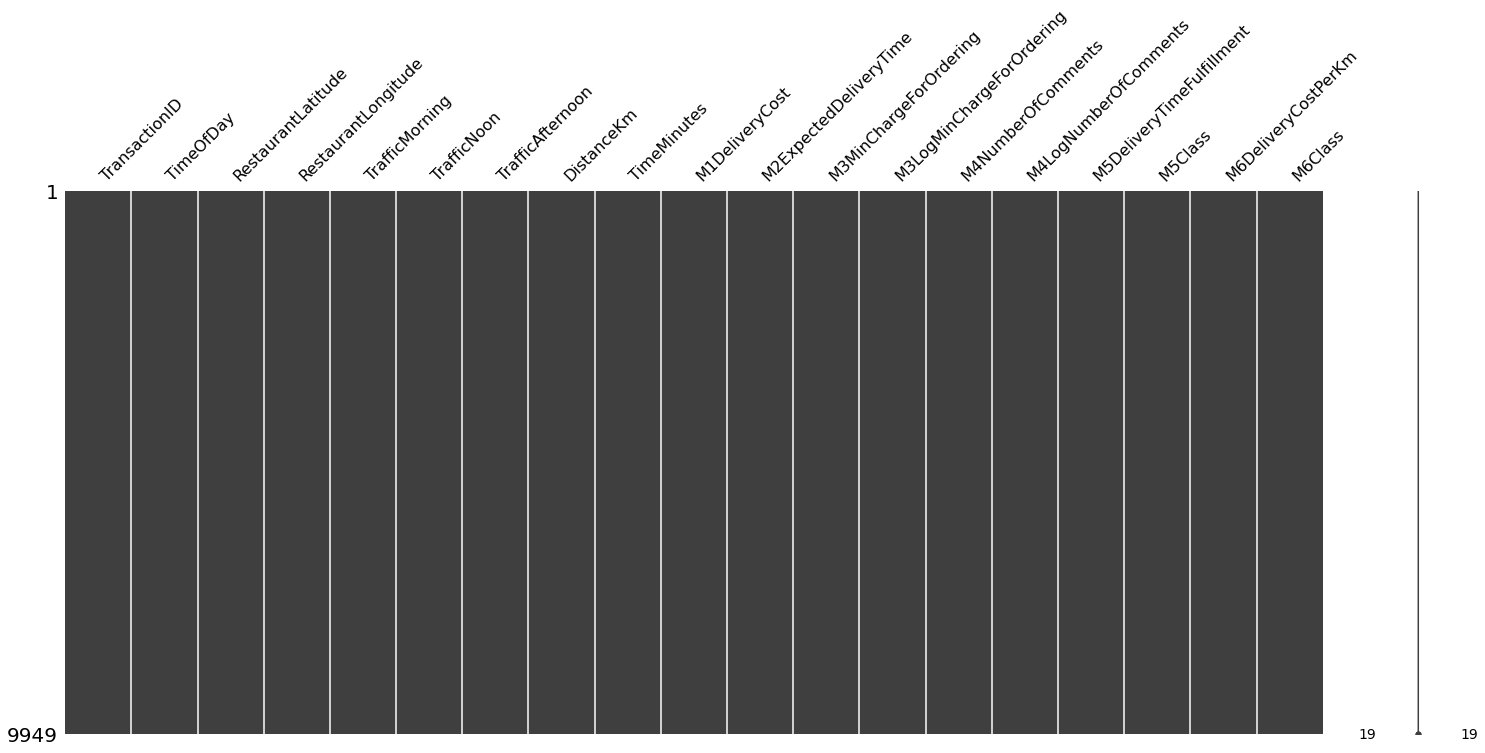

In [407]:
msno.matrix(df)

In [408]:
#random forets y=M6 GridSearchCV

In [450]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier


In [451]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [452]:
random_forest_model = RandomForestClassifier().fit(X_train, y_train)
random_forest_model

RandomForestClassifier()

In [453]:
y_predict = random_forest_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.9953098827470687

In [454]:
?random_forest_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\asus\anaconda\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for 

In [455]:
random_forest_parameter = {"max_depth" : [3,5],
                           "max_features": [2,5],
                           "n_estimators": [10,20],
                           "min_samples_split": [2,5,8]}
#max_depth = random forest derinliği
#max_features = değişken sayısı
#n_estimators = ağaç sayısı
#min_samples_split = 

In [456]:
random_forest_model = RandomForestClassifier()
random_forest_model_cv = GridSearchCV(random_forest_model, random_forest_parameter, cv = 10, n_jobs = -1, verbose = 2)
#gridsearch ile cross validation
#n_jobs=-1 verbose=2 işlemcinin max performansını sağlamak


In [457]:
random_forest_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'max_features': [2, 5],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [10, 20]},
             verbose=2)

In [458]:
print("best parameters:" +str(random_forest_model_cv.best_params_))

best parameters:{'max_depth': 5, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 20}


In [459]:
final_random_forest_model = RandomForestClassifier(max_depth = 5, max_features = 5, min_samples_split = 2 , n_estimators = 20)
final_random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=20)

In [460]:
y_predict = final_random_forest_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.992964824120603

In [463]:
#RandomForest with feature selection

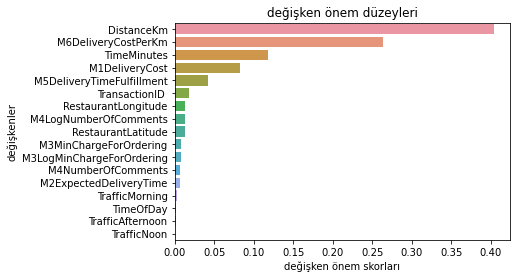

In [464]:
feature_importance = pd.Series(final_random_forest_model.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [465]:
y = df["M6Class"]
X = df.drop(['TimeOfDay','TrafficMorning', 'TrafficNoon','TrafficAfternoon', 
             'M6Class', 'M5Class','TransactionID ', 'RestaurantLatitude',
             'RestaurantLongitude','M4LogNumberOfComments', 'M4NumberOfComments',
            'M3MinChargeForOrdering','M2ExpectedDeliveryTime'], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [466]:
# Train a  model
final_random_forest_model = RandomForestClassifier().fit(X_train, y_train)

In [467]:
# Evaluate the model on the test set
accuracy = final_random_forest_model.score(X_test, y_test)
print("Random forest accuracy:", accuracy)


Random forest accuracy: 0.9969849246231156


In [468]:
recall = recall_score(y_test, y_predict)
print("recall:", recall)

recall: 0.9975711311589174


In [469]:
precision = precision_score(y_test, y_predict)
print("precision:", precision)

precision: 0.9951540325372101


In [470]:
#randomForestModel

In [471]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier



In [472]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [473]:
rfm_model = RandomForestClassifier().fit(X_train, y_train)

y_predict = rfm_model.predict(X_test)

In [474]:
# Evaluate the model on the test set
accuracy = rfm_model.score(X_test, y_test)
print("Random Forest accuracy:", accuracy)


Random Forest accuracy: 0.9949748743718593


In [457]:
#feature selection

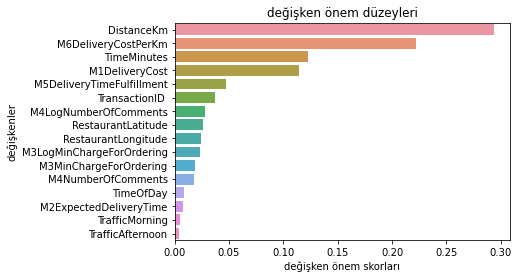

In [458]:
feature_importance = pd.Series(rfm_model.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [459]:
y = df["M6Class"]
X = df.drop([ 'TrafficNoon','M6Class', 'M5Class','TimeOfDay','TrafficMorning', 'TrafficNoon','TrafficAfternoon','M4NumberOfComments',
            'M3MinChargeForOrdering','M2ExpectedDeliveryTime','TransactionID '], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)


In [460]:
rfm_model = RandomForestClassifier().fit(X_train, y_train)

y_predict = rfm_model.predict(X_test)

In [477]:
# Evaluate the model on the test set
accuracy = rfm_model.score(X_test, y_test)
print("Random Forest accuracy:", accuracy)


Random Forest accuracy: 0.9949748743718593


In [478]:
recall = recall_score(y_test, y_predict)
print("recall:", recall)

recall: 0.9986120749479528


In [479]:
precision = precision_score(y_test, y_predict)
print("precision:", precision)

precision: 0.9961924541363794


In [480]:
#Gradient Boosting Machines (GBM) y=M6 GridSearchCV

In [488]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score
from sklearn.ensemble import GradientBoostingClassifier

In [489]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [490]:
gradient_boosting_model = GradientBoostingClassifier().fit(X_train , y_train)
gradient_boosting_model

GradientBoostingClassifier()

In [491]:
y_predict = gradient_boosting_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.997319932998325

In [499]:
?gradient_boosting_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
File:        c:\users\asus\anaconda\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    The loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
    Learning rate shrinks the con

In [500]:
gradient_boosting_model = GradientBoostingClassifier()

gradient_boosting_parameters = {"learning_rate": [0.1 , 0.01],
                                "n_estimators":[100,300],
                                "max_depth": [2,3,5]}

In [501]:
gradient_boosting_model_cv = GridSearchCV(gradient_boosting_model , gradient_boosting_parameters , cv = 10 , n_jobs = -1 , verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [502]:
gradient_boosting_model_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [503]:
final_gradient_boosting_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
final_gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [504]:
y_predict = final_gradient_boosting_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.997319932998325

In [505]:
#feature selection 

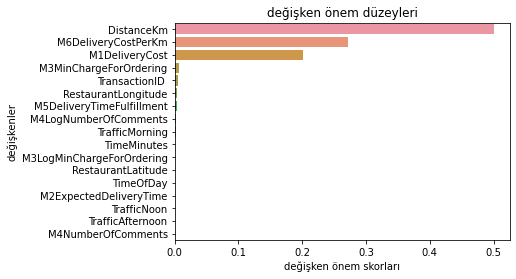

In [506]:
feature_importance = pd.Series(final_gradient_boosting_model.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [507]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude','TimeMinutes','RestaurantLatitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments','M5DeliveryTimeFulfillment','TransactionID '] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [508]:
final_gradient_boosting_model = GradientBoostingClassifier().fit(X_train, y_train)

y_predict = final_gradient_boosting_model.predict(X_test)

In [509]:
# Evaluate the model on the test set
accuracy = final_gradient_boosting_model.score(X_test, y_test)
print("GBMaccuracy:", accuracy)


GBMaccuracy: 0.9986599664991624


In [510]:
recall = recall_score(y_test, y_predict)
print("recall:", recall)

recall: 0.9996530187369882


In [512]:
precision = precision_score(y_test, y_predict)
print("precision:", precision)

precision: 0.9989597780859917


In [513]:
#Gradient Boosting Machines(GBM) y=M6 GBM model

In [514]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [515]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [516]:
# Train a random forest model
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [517]:
# Evaluate the model on the test set
accuracy = gbm_model.score(X_test, y_test)
print("GBM accuracy:", accuracy)


GBM accuracy: 0.997319932998325


In [518]:
#feature selection

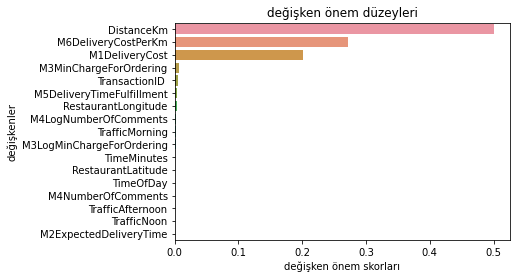

In [519]:
feature_importance = pd.Series(gbm_model.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [520]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude','TimeMinutes','RestaurantLatitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments','M5DeliveryTimeFulfillment','TransactionID '] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [521]:
# Train a random forest model
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [522]:
# Evaluate the model on the test set
accuracy = gbm_model.score(X_test, y_test)
print("GBM accuracy:", accuracy)


GBM accuracy: 0.9986599664991624


In [523]:
recall = recall_score(y_test, y_predict)
print("recall:", recall)

recall: 0.9996530187369882


In [524]:
precision = precision_score(y_test, y_predict)
print("precision:", precision)

precision: 0.9989597780859917


In [525]:
#Light Gradient-Boosting Machine(light GBM) y =M6 crosvalidationCV

In [526]:
!pip install lightgbm

In [527]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier

In [528]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [529]:
light_gb_model = LGBMClassifier().fit(X_train , y_train)
light_gb_model

LGBMClassifier()

In [530]:
y_pred = light_gb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9989949748743718

In [531]:
?light_gb_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\users\asus\anaconda\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (defau

In [532]:
light_gb_model = LGBMClassifier()

light_gb_model_parameters = {"n_estimators" : [100,500],
                        "subsample":[0.6,0.8],
                        "max_depth":[3,5],
                        "learning_rate":[0.1,0.001]}

In [533]:
light_gb_model_cv = GridSearchCV(light_gb_model, light_gb_model_parameters , cv = 10 , n_jobs = -1 , verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [534]:
light_gb_model_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}

In [535]:
final_light_gb_model = LGBMClassifier(learning_rate = 0.1, max_depth = 5, n_estimators =100, subsample = 0.6)
final_light_gb_model.fit(X_train, y_train)

LGBMClassifier(max_depth=5, subsample=0.6)

In [536]:
y_predict = final_light_gb_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.998324958123953

In [537]:
#featureSelection

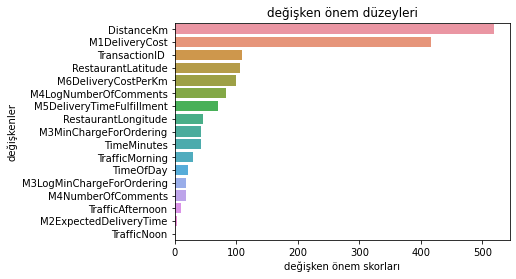

In [538]:
feature_importance = pd.Series(final_light_gb_model.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [539]:
y = df["M6Class"]
X = df.drop([ 'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
             'M6Class', 'M5Class','TransactionID ','M4NumberOfComments','M3LogMinChargeForOrdering',
            'TimeOfDay'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)


In [540]:
final_light_gb_model = LGBMClassifier().fit(X_train, y_train)

y_predict = final_light_gb_model.predict(X_test)

In [541]:
# Train a random forest model
final_light_gb_model = LGBMClassifier().fit(X_train, y_train)

In [542]:
# Evaluate the model on the test set
accuracy = final_light_gb_model.score(X_test, y_test)
print("LGBM accuracy:", accuracy)


LGBM accuracy: 0.9979899497487437


In [543]:
recall = recall_score(y_test, y_predict)
print("recall:", recall)

recall: 0.9996530187369882


In [544]:
precision = precision_score(y_test, y_predict)
print("precision:", precision)

precision: 0.9982674982674983


In [545]:
#Light Gradient-Boosting Machine(light GBM) y =M6 -LightGBM model

In [546]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score
from lightgbm import LGBMClassifier

In [547]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [548]:
# Train a light GBM model
lgbm = LGBMClassifier().fit(X_train, y_train)

In [549]:
 #Evaluate the model on the test set
accuracy = lgbm.score(X_test, y_test)
print("light GBM accuracy:", accuracy)

light GBM accuracy: 0.9989949748743718


In [550]:
#feature selection

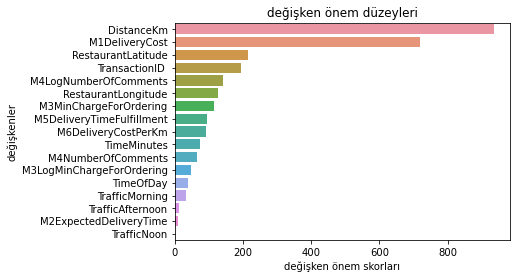

In [551]:
feature_importance = pd.Series(lgbm.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [552]:
y = df["M6Class"]
X = df.drop(['TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
             'M6Class', 'M5Class','TransactionID ','TimeMinutes','M3LogMinChargeForOrdering',] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)


In [553]:
lgbm= LGBMClassifier().fit(X_train, y_train)

y_predict = lgbm.predict(X_test)


In [554]:
# Evaluate the model on the test set
accuracy = lgbm.score(X_test, y_test)
print("light GBM accuracy", accuracy)

light GBM accuracy 0.9979899497487437


In [555]:
recall = recall_score(y_test, y_predict)
print("recall:", recall)

recall: 0.9996530187369882


In [556]:
precision = precision_score(y_test, y_predict)
print("precision:", precision)

precision: 0.9982674982674983


In [534]:
#random forest y=M5 GridSearchCV

In [559]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer

In [560]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X = pd.DataFrame(X)

In [561]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [562]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [563]:
random_forest_model = RandomForestClassifier().fit(X_train, y_train)
random_forest_model

C:\Users\asus\AppData\Local\Temp\ipykernel_9448\3689364789.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model = RandomForestClassifier().fit(X_train, y_train)


RandomForestClassifier()

In [564]:
y_predict = random_forest_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.9845896147403685

In [565]:
random_forest_parameter = {"max_depth" : [3,5],
                           "max_features": [2,5],
                           "n_estimators": [10,20],
                           "min_samples_split": [2,5,8]}
#max_depth = random forest derinliği
#max_features = değişken sayısı
#n_estimators = ağaç sayısı
#min_samples_split = 

In [566]:
random_forest_model = RandomForestClassifier()
random_forest_model_cv = GridSearchCV(random_forest_model, random_forest_parameter, cv = 10, n_jobs = -1, verbose = 2)
#gridsearch ile cross validation
#n_jobs=-1 verbose=2 işlemcinin max performansını sağlamak

In [567]:
random_forest_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'max_features': [2, 5],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [10, 20]},
             verbose=2)

In [568]:
print("best parameters:" +str(random_forest_model_cv.best_params_))

best parameters:{'max_depth': 5, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 20}


In [569]:
final_random_forest_model = RandomForestClassifier(max_depth = 5, max_features = 5, min_samples_split = 8 , n_estimators = 20)
final_random_forest_model.fit(X_train, y_train)

C:\Users\asus\AppData\Local\Temp\ipykernel_9448\2034691521.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_random_forest_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, max_features=5, min_samples_split=8,
                       n_estimators=20)

In [570]:
y_predict = final_random_forest_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9842546063651592

In [571]:
#feature selection

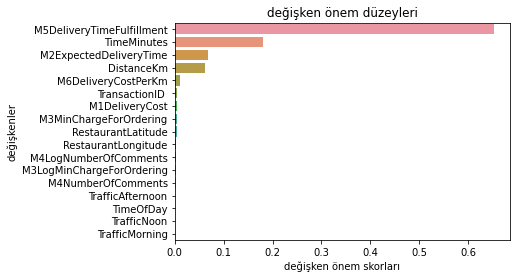

In [572]:
feature_importance = pd.Series(final_random_forest_model.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [573]:
y = df["M5Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude','RestaurantLatitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments','TimeOfDay','TransactionID '] , axis = 1)

In [574]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [575]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [576]:
final_random_forest_model= RandomForestClassifier().fit(X_train, y_train)

y_predict = final_random_forest_model.predict(X_test)


C:\Users\asus\AppData\Local\Temp\ipykernel_9448\224328720.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_random_forest_model= RandomForestClassifier().fit(X_train, y_train)


In [577]:
# Evaluate the model on the test set
accuracy = final_random_forest_model.score(X_test, y_test)
print("random forest accuracy", accuracy)

random forest accuracy 0.9845896147403685


In [596]:
#random forest y=M5 randomforest model

In [579]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score
from sklearn import tree
from sklearn.preprocessing import KBinsDiscretizer

In [598]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X = pd.DataFrame(X)

In [599]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [600]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [601]:
# Train a random forest model
rmf = RandomForestClassifier().fit(X_train, y_train)

C:\Users\asus\AppData\Local\Temp\ipykernel_3340\2028592726.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rmf = RandomForestClassifier().fit(X_train, y_train)


In [602]:
# Evaluate the model on the test set
accuracy = rmf.score(X_test, y_test)
print("Random forest accuracy:", accuracy)

Random forest accuracy: 0.9845896147403685


In [696]:
#feature selection

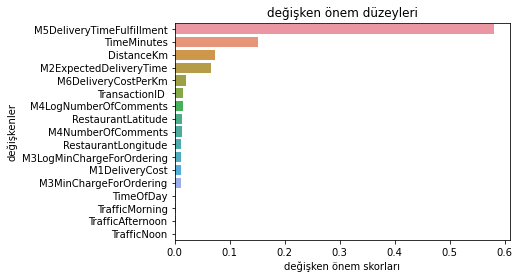

In [603]:
feature_importance = pd.Series(rmf.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [706]:
y = df["M5Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude','TimeMinutes','RestaurantLatitude',
            'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon','M6Class', 'M5Class','TransactionID ','M4NumberOfComments', 'M4LogNumberOfComments',
            'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering'] , axis = 1)



In [707]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [708]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [709]:
rmf = RandomForestClassifier().fit(X_train, y_train)

y_predict = rmf.predict(X_test)


C:\Users\asus\AppData\Local\Temp\ipykernel_3340\2645090770.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rmf = RandomForestClassifier().fit(X_train, y_train)


In [710]:
# Evaluate the model on the test set
accuracy = rmf.score(X_test, y_test)
print("rf accuracy", accuracy)

rf accuracy 0.9852596314907873


In [609]:
#y=M5 Gradient Boosting Machines (GBM)-GridSearchCV

In [610]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import KBinsDiscretizer

In [611]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X = pd.DataFrame(X)

In [612]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [613]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [614]:
gradient_boosting_model = GradientBoostingClassifier().fit(X_train , y_train)
gradient_boosting_model

C:\Users\asus\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [615]:
y_predict = gradient_boosting_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.9829145728643216

In [616]:
gradient_boosting_model = GradientBoostingClassifier()

gradient_boosting_parameters = {"learning_rate": [0.1 , 0.01],
                                "n_estimators":[100,300],
                                "max_depth": [2,3,5]}

In [617]:
gradient_boosting_model_cv = GridSearchCV(gradient_boosting_model , gradient_boosting_parameters , cv = 10 , n_jobs = -1 , verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\asus\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [619]:
gradient_boosting_model_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [620]:
final_gradient_boosting_model = GradientBoostingClassifier(learning_rate= 0.1, n_estimators=300, max_depth=5)
final_gradient_boosting_model.fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=5, n_estimators=300)

In [621]:
y_predict = final_gradient_boosting_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9865996649916248

In [622]:
#feature selection

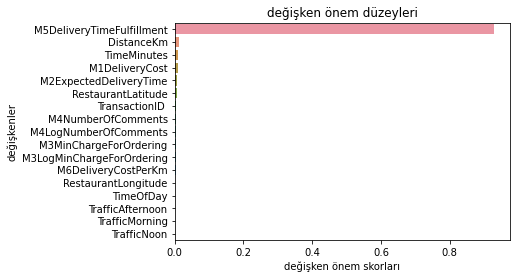

In [623]:
feature_importance = pd.Series(final_gradient_boosting_model.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [631]:
y = df["M5Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude','RestaurantLatitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments','DistanceKm','TimeMinutes', 'M1DeliveryCost', 'M6DeliveryCostPerKm'] , axis = 1)

In [632]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [633]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [634]:
final_gradient_boosting_model = GradientBoostingClassifier().fit(X_train, y_train)

y_predict = final_gradient_boosting_model.predict(X_test)


C:\Users\asus\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [635]:
# Evaluate the model on the test set
accuracy = final_gradient_boosting_model.score(X_test, y_test)
print("gbm accuracy", accuracy)

gbm accuracy 0.9845896147403685


In [636]:
#Gradient Boosting Machines(GBM) y=M5 GBM model

In [580]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import KBinsDiscretizer

In [638]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X = pd.DataFrame(X)

In [639]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [640]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [641]:
# Train a random forest model
gbm = GradientBoostingClassifier().fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [642]:
# Evaluate the model on the test set
accuracy = gbm.score(X_test, y_test)
print("GBM accuracy:", accuracy)


GBM accuracy: 0.983249581239531


In [643]:
#feature selection

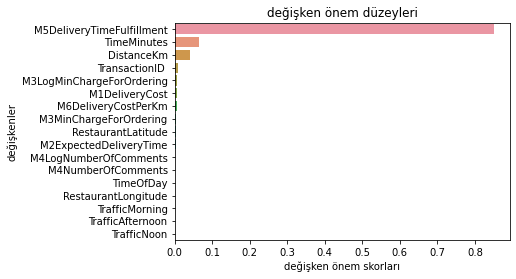

In [644]:
feature_importance = pd.Series(gbm.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [647]:
y = df["M5Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude','RestaurantLatitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments', 'M1DeliveryCost', 'M6DeliveryCostPerKm'] , axis = 1)

In [648]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [649]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [650]:
# Train a random forest model
gbm = GradientBoostingClassifier().fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [651]:
# Evaluate the model on the test set
accuracy = gbm.score(X_test, y_test)
print("GBM accuracy:", accuracy)


GBM accuracy: 0.9829145728643216


In [652]:
#Light Gradient-Boosting Machine(light GBM) y =M5 crosvalidationCV

In [653]:
!pip install lightgbm

In [581]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import KBinsDiscretizer

In [655]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X = pd.DataFrame(X)

In [656]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [657]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [658]:
light_gb_model = LGBMClassifier().fit(X_train , y_train)
light_gb_model

C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier()

In [659]:
y_predict = light_gb_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.8180904522613065

In [660]:
?light_gb_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\users\asus\anaconda\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (defau

In [661]:
light_gb_model = LGBMClassifier()

light_gb_model_parameters = {"n_estimators" : [100,500],
                        "subsample":[0.6,0.8],
                        "max_depth":[3,5],
                        "learning_rate":[0.1,0.001]}

In [662]:
light_gb_model_cv = GridSearchCV(light_gb_model, light_gb_model_parameters , cv = 10 , n_jobs = -1 , verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [663]:
light_gb_model_cv.best_params_

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.6}

In [664]:
final_light_gb_model = LGBMClassifier(learning_rate = 0.001, max_depth = 3, n_estimators =500, subsample = 0.6)
final_light_gb_model.fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(learning_rate=0.001, max_depth=3, n_estimators=500,
               subsample=0.6)

In [665]:
y_predict = final_light_gb_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9812395309882747

In [666]:
#feature selection

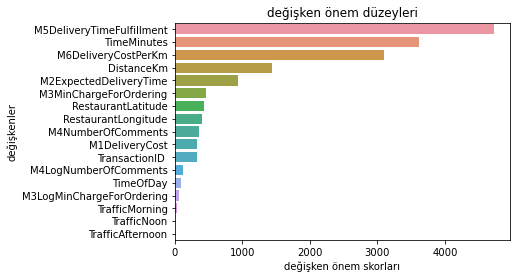

In [667]:
feature_importance = pd.Series(final_light_gb_model.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [742]:
y = df["M5Class"]
X = df.drop(['TimeOfDay','TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments', 'M1DeliveryCost'] , axis = 1)


In [743]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [744]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [745]:
# Train a model
final_light_gb_model = LGBMClassifier().fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [746]:
# Evaluate the model on the test set
accuracy = final_light_gb_model.score(X_test, y_test)
print("LGBM accuracy:", accuracy)


LGBM accuracy: 0.9514237855946399


In [723]:
#Light Gradient-Boosting Machine(light GBM) y =M5 -LightGBM model

In [436]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import KBinsDiscretizer

In [725]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X = pd.DataFrame(X)

In [726]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [727]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [737]:
# Train a model
lgbm = GradientBoostingClassifier().fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [729]:
# Evaluate the model on the test set
accuracy = lgbm.score(X_test, y_test)
print("LightGBM accuracy:", accuracy)

LightGBM accuracy: 0.983249581239531


In [730]:
#feature selection 

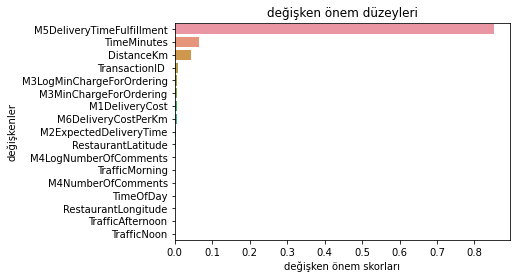

In [731]:
feature_importance = pd.Series(lgbm.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [732]:
y = df["M5Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude','RestaurantLatitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments','TimeOfDay'] , axis = 1)

In [733]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [734]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [735]:
# Train a random forest model
lgbm = LGBMClassifier().fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [736]:
# Evaluate the model on the test set
accuracy = lgbm.score(X_test, y_test)
print("lgbm accuracy:", accuracy)

lgbm accuracy: 0.9675041876046901


In [747]:
#ADABOOST
#TARGET M6

In [419]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [420]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [422]:
# Create adaboost classifer object
abc_model = AdaBoostClassifier().fit(X_train, y_train)

#Predict the response for test dataset
y_pred = abc_model.predict(X_test)

In [423]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.998324958123953


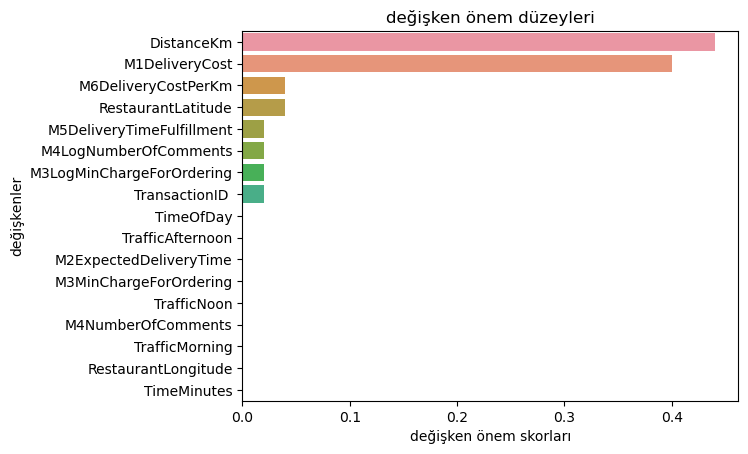

In [424]:
feature_importance = pd.Series(abc_model.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [425]:
#WithFeatureSelection

In [755]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [426]:
y = df["M6Class"]
X = df.drop([ 'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
             'M6Class', 'M5Class','TransactionID ','M4NumberOfComments','M3LogMinChargeForOrdering',
            'TimeOfDay'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [428]:
# Create adaboost classifer object
abc_model = AdaBoostClassifier().fit(X_train, y_train)

#Predict the response for test dataset
y_pred = abc_model.predict(X_test)

In [429]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.998324958123953


In [760]:
#With GridSearch

In [761]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [762]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [763]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [764]:
abc_model = AdaBoostClassifier().fit(X_train , y_train)
abc_model

AdaBoostClassifier()

In [765]:
y_predict = abc_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız


0.998324958123953

In [766]:
?abc_model

Type:        AdaBoostClassifier
String form: AdaBoostClassifier()
Length:      50
File:        c:\users\asus\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py
Docstring:  
An AdaBoost classifier.

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

This class implements the algorithm known as AdaBoost-SAMME [2].

Read more in the :ref:`User Guide <adaboost>`.

.. versionadded:: 0.14

Parameters
----------
base_estimator : object, default=None
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper
    ``classes_`` and ``n_classes_`` attributes. If ``None``, then
    the base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`
    initial

In [767]:
abc_model = AdaBoostClassifier()

abc_model_parameters = {"n_estimators" : [100,300],
                        "learning_rate":[0.1,0.001]}

In [768]:
abc_model_cv = GridSearchCV(abc_model, abc_model_parameters , cv = 10 , n_jobs = -1 , verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [769]:
abc_model_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [770]:
abc_model_final = AdaBoostClassifier(learning_rate = 0.1, n_estimators =100)
abc_model_final.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [771]:
y_predict = abc_model_final.predict(X_test)
accuracy_score(y_test, y_predict)

0.995644891122278

In [430]:
feature_importance = pd.Series(abc_model_final.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

NameError: name 'abc_model_final' is not defined

In [772]:
#WithFeatureSelection

In [437]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [438]:
y = df["M6Class"]
X = df.drop([ 'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
             'M6Class', 'M5Class','TransactionID ','M4NumberOfComments','M3LogMinChargeForOrdering',
            'TimeOfDay'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [439]:
abc_model = AdaBoostClassifier().fit(X_train , y_train)
abc_model

AdaBoostClassifier()

In [440]:
y_predict = abc_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız


0.998324958123953

In [441]:
?abc_model

Type:        AdaBoostClassifier
String form: AdaBoostClassifier()
Length:      50
File:        c:\users\esaty\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py
Docstring:  
An AdaBoost classifier.

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

This class implements the algorithm known as AdaBoost-SAMME [2].

Read more in the :ref:`User Guide <adaboost>`.

.. versionadded:: 0.14

Parameters
----------
base_estimator : object, default=None
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper
    ``classes_`` and ``n_classes_`` attributes. If ``None``, then
    the base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`
    initi

In [442]:
abc_model = AdaBoostClassifier()

abc_model_parameters = {"n_estimators" : [100,300],
                        "learning_rate":[0.1,0.001]}

In [443]:
abc_model_cv = GridSearchCV(abc_model, abc_model_parameters , cv = 10 , n_jobs = -1 , verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [444]:
abc_model_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [445]:
abc_model_final = AdaBoostClassifier(learning_rate = 0.1, n_estimators =100)
abc_model_final.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [446]:
y_predict = abc_model_final.predict(X_test)
accuracy_score(y_test, y_predict)

0.995644891122278

In [785]:
#ADABOOST
#TARGET M5

In [786]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [787]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [788]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [789]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [790]:
# Create adaboost classifer object
abc = AdaBoostClassifier().fit(X_train, y_train)

#Predict the response for test dataset
y_pred = abc.predict(X_test)

In [791]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9072026800670017


In [14]:
feature_importance = pd.Series(abc.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

NameError: name 'abc' is not defined

In [792]:
#WithFeatureSelection

In [794]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [795]:
y = df["M5Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude','RestaurantLatitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments', 'M1DeliveryCost', 'M6DeliveryCostPerKm'] , axis = 1)

In [796]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [797]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [798]:
# Create adaboost classifer object
abc = AdaBoostClassifier().fit(X_train, y_train)

#Predict the response for test dataset
y_pred = abc.predict(X_test)

In [799]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9072026800670017


In [800]:
#WithGridSearch

In [801]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [802]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [803]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [804]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [805]:
abc_model = AdaBoostClassifier().fit(X_train , y_train)
abc_model

AdaBoostClassifier()

In [806]:
y_predict = abc_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.9072026800670017

In [807]:
abc_model = AdaBoostClassifier()

abc_model_parameters = {"n_estimators" : [100,300],
                        "learning_rate":[0.1,0.001]}

In [808]:
abc_model_cv = GridSearchCV(abc_model, abc_model_parameters , cv = 10 , n_jobs = -1 , verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [809]:
abc_model_cv.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [810]:
abc_model_final = AdaBoostClassifier(learning_rate = 0.1, n_estimators =300)
abc_model_final.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=300)

In [811]:
y_predict = abc_model_final.predict(X_test)
accuracy_score(y_test, y_predict)

0.9403685092127303

In [ ]:
feature_importance = pd.Series(abc_model_final.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [812]:
#WithFeatureSelection

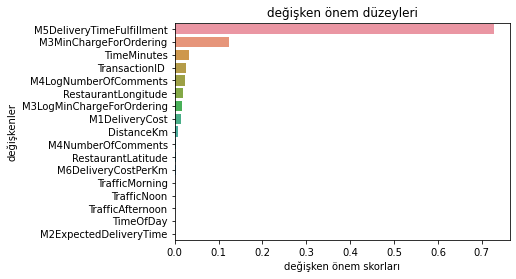

In [814]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [815]:
y = df["M5Class"]
X = df.drop(['TimeOfDay', 'RestaurantLatitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
        'M3MinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M6DeliveryCostPerKm'] , axis = 1)

In [816]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [817]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [818]:
abc_model = AdaBoostClassifier().fit(X_train , y_train)
abc_model

AdaBoostClassifier()

In [819]:
y_predict = abc_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.9072026800670017

In [820]:
abc_model = AdaBoostClassifier()

abc_model_parameters = {"n_estimators" : [100,300],
                        "learning_rate":[0.1,0.001]}

In [821]:
abc_model_cv = GridSearchCV(abc_model, abc_model_parameters , cv = 10 , n_jobs = -1 , verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [822]:
abc_model_cv.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [823]:
abc_model_final = AdaBoostClassifier(learning_rate = 0.1, n_estimators =300)
abc_model_final.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=300)

In [824]:
y_predict = abc_model_final.predict(X_test)
accuracy_score(y_test, y_predict)

0.9400335008375209

In [825]:
#Decision tree y=M6Class 

In [826]:
        #Accuracy Decision tree with gini y=M6Class 

In [827]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [828]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [829]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [830]:
dt = DecisionTreeClassifier(
    max_depth=3, 
    criterion='gini'
    )
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [831]:
y_pred = dt.predict(X_test)

In [832]:
accuracy_score(y_test, y_pred)

0.9862646566164154

In [833]:
        #Accuracy decision tree with gini after feature selection y=M6Class 

In [834]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [835]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [836]:
dt = DecisionTreeClassifier(
    max_depth=3, 
    criterion='gini'
    )
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [837]:
y_pred = dt.predict(X_test)

In [838]:
accuracy_score(y_test, y_pred)

0.9862646566164154

In [839]:
        #Accuracy Decision tree y=M6Class 

In [840]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [841]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [842]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [843]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9976549413735344


In [844]:
         #Accuracy decision tree after feature selection y=M6Class 

In [845]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [846]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [847]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.998324958123953


In [848]:
        #Accuracy Decision tree with entropy y=M6Class 

In [849]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [850]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [851]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9879396984924623


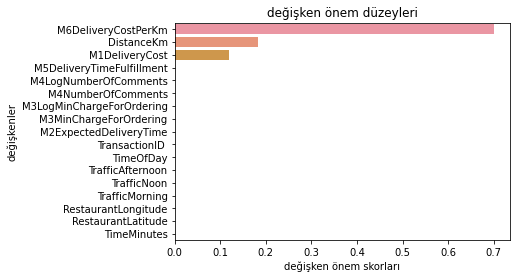

In [852]:
feature_importance = pd.Series(clf.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [853]:
         #Accuracy decision tree with entropy after feature selection y=M6Class 

In [854]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [855]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9879396984924623


In [856]:
#Decision Tree for Grid Search y=M6Class

In [857]:
#Libraries
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
#For work encode categorical atrubuts
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#For do a best a work flow
from sklearn.pipeline import Pipeline
#Missing values
from sklearn.impute import SimpleImputer

In [858]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [859]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [860]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'max_depth': [5, 6, 7, 8, 9]},
             verbose=True)

In [861]:
best_params = grid_search.best_params_
best_params

{'ccp_alpha': 0.001, 'max_depth': 5}

In [862]:
#model olustur
print("Best params:",best_params)

Best params: {'ccp_alpha': 0.001, 'max_depth': 5}


In [863]:
best_score=grid_search.best_score_

In [864]:
print("Best score:",best_score)

Best score: 0.9959792806396515


In [865]:
final_decision_tree_model = DecisionTreeClassifier(max_depth = 5,ccp_alpha=0.001)
final_decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5)

In [866]:
y_predict = final_decision_tree_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9963149078726968

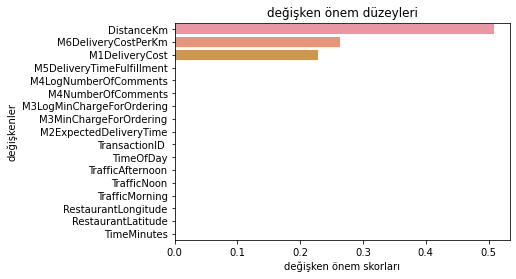

In [867]:
feature_importance = pd.Series(final_decision_tree_model.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [868]:
#Decision Tree for Grid Search after feature selection y=M6Class

In [869]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [870]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'max_depth': [5, 6, 7, 8, 9]},
             verbose=True)

In [871]:
best_params = grid_search.best_params_
best_params

{'ccp_alpha': 0.001, 'max_depth': 5}

In [872]:
#model olustur
print("Best params:",best_params)

Best params: {'ccp_alpha': 0.001, 'max_depth': 5}


In [873]:
best_score=grid_search.best_score_

In [874]:
print("Best score:",best_score)

Best score: 0.9959792806396515


In [875]:
final_decision_tree_model = DecisionTreeClassifier(max_depth = 5,ccp_alpha=0.001)
final_decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5)

In [876]:
y_predict = final_decision_tree_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9963149078726968

In [877]:
#Decision tree y=M5Class

In [878]:
             #Accuracy Decision tree y=M5Class 

In [879]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, log_loss, precision_score, confusion_matrix, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import neighbors
from sklearn.preprocessing import KBinsDiscretizer

In [880]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [881]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [882]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [883]:
model=DecisionTreeClassifier()

In [884]:
model=model.fit(X_train,y_train)

In [885]:
y_pred=model.predict(X_test)

In [886]:
print("Accuracy score %f" % metrics.accuracy_score(y_test,y_pred))

Accuracy score 0.979564


In [887]:
        #Accuracy decision tree after feature selection y=M5Class 

In [888]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, log_loss, precision_score, confusion_matrix, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import neighbors
from sklearn.preprocessing import KBinsDiscretizer

In [889]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [890]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [891]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [892]:
model=DecisionTreeClassifier()

In [893]:
model=model.fit(X_train,y_train)

In [894]:
y_pred=model.predict(X_test)

In [895]:
print("Accuracy score %f" % metrics.accuracy_score(y_test,y_pred))

Accuracy score 0.978224


In [896]:
        #Accuracy decision tree with gini  y=M5Class 

In [897]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, log_loss, precision_score, confusion_matrix, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import neighbors
from sklearn.preprocessing import KBinsDiscretizer

In [898]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [899]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [900]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [901]:
dt = DecisionTreeClassifier(
    max_depth=3, 
    criterion='gini'
    )
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [902]:
y_pred = dt.predict(X_test)

In [903]:
accuracy_score(y_test, y_pred)

0.9829145728643216

In [904]:
        #Accuracy decision tree with gini after feature selection y=M5Class 

In [905]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, log_loss, precision_score, confusion_matrix, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import neighbors
from sklearn.preprocessing import KBinsDiscretizer

In [906]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [907]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [908]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [909]:
dt = DecisionTreeClassifier(
    max_depth=3, 
    criterion='gini'
    )
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [910]:
y_pred = dt.predict(X_test)

In [911]:
accuracy_score(y_test, y_pred)

0.9822445561139028

In [912]:
        #Accuracy decision tree with entropy y=M5Class 

In [913]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, log_loss, precision_score, confusion_matrix, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import neighbors
from sklearn.preprocessing import KBinsDiscretizer

In [914]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [915]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [916]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [917]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9845896147403685


In [941]:
feature_importance = pd.Series(clf.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

ValueError: Length of values (9) does not match length of index (17)

In [942]:
        #Accuracy decision tree with entropy after feature selection y=M5Class 

In [943]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, log_loss, precision_score, confusion_matrix, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import neighbors
from sklearn.preprocessing import KBinsDiscretizer

In [944]:
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [945]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [946]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [947]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9845896147403685


In [948]:
#Decision Tree for Grid Search y=M5Class

In [949]:
#Libraries
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
#For work encode categorical atrubuts
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#For do a best a work flow
from sklearn.pipeline import Pipeline
#Missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

In [950]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [951]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [952]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [953]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'max_depth': [5, 6, 7, 8, 9]},
             verbose=True)

In [954]:
best_params = grid_search.best_params_
best_params

{'ccp_alpha': 0.1, 'max_depth': 5}

In [955]:
print("Best params:",best_params)

Best params: {'ccp_alpha': 0.1, 'max_depth': 5}


In [956]:
best_score=grid_search.best_score_

In [957]:
print("Best score:",best_score)

Best score: 0.987076391811273


In [958]:
final_decision_tree_model1 = DecisionTreeClassifier(max_depth = 5,ccp_alpha=0.001)
final_decision_tree_model1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5)

In [959]:
y_predict = final_decision_tree_model1.predict(X_test)
accuracy_score(y_test, y_predict)

0.9835845896147404

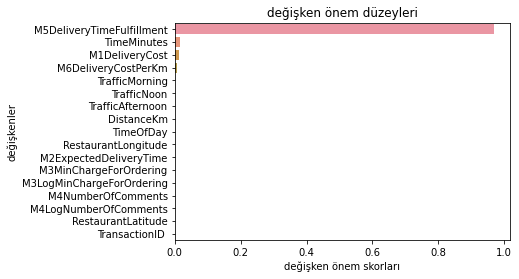

In [960]:
feature_importance = pd.Series(final_decision_tree_model1.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importance , y=feature_importance.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()

In [961]:
#Decision Tree for Grid Search after feature selection y=M5Class

In [962]:
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
#For work encode categorical atrubuts
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#For do a best a work flow
from sklearn.pipeline import Pipeline
#Missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

In [963]:
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [964]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [965]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [966]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'max_depth': [5, 6, 7, 8, 9]},
             verbose=True)

In [967]:
best_params = grid_search.best_params_
best_params

{'ccp_alpha': 0.1, 'max_depth': 5}

In [968]:
print("Best params:",best_params)

Best params: {'ccp_alpha': 0.1, 'max_depth': 5}


In [969]:
best_score=grid_search.best_score_

In [970]:
print("Best score:",best_score)

Best score: 0.987076391811273


In [971]:
final_decision_tree_model1 = DecisionTreeClassifier(max_depth = 5,ccp_alpha=0.001)
final_decision_tree_model1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5)

In [972]:
y_predict = final_decision_tree_model.predict(X_test)
accuracy_score(y_test, y_predict)

C:\Users\asus\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- M2ExpectedDeliveryTime
- M4LogNumberOfComments
- RestaurantLongitude
Feature names seen at fit time, yet now missing:
- M1DeliveryCost

  warnings.warn(message, FutureWarning)


ValueError: X has 9 features, but DecisionTreeClassifier is expecting 7 features as input.

In [973]:
#k nearest neighbor classification y=M6Class

In [974]:
!pip install scikit_learn

In [975]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [976]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [977]:
knn=KNeighborsClassifier(n_neighbors=5)

In [978]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [979]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [980]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [981]:
predictions = knn.predict(X_test)

In [982]:
accuracy=accuracy_score(y_test,predictions)

In [983]:
print("Accuracy:",accuracy)

Accuracy: 0.9608040201005025


In [984]:
#k nearest neighbor classification with feature selection y=M6Class

In [985]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [986]:
knn=KNeighborsClassifier(n_neighbors=5)

In [987]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [988]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [989]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [990]:
predictions = knn.predict(X_test)

In [991]:
predictions = knn.predict(X_test)

In [992]:
accuracy=accuracy_score(y_test,predictions)

In [993]:
print("Accuracy:",accuracy)

Accuracy: 0.9597989949748744


In [994]:
#k nearest neighbor classification y=M5Class

In [995]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, log_loss, precision_score, confusion_matrix, f1_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import neighbors
from sklearn.preprocessing import KBinsDiscretizer

In [996]:
y = df["M5Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)

In [997]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [998]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [999]:
model2=KNeighborsClassifier()

In [1000]:
model2=model2.fit(X_train,y_train)

In [1001]:
y_pred=model2.predict(X_test)

In [1002]:
print("Accuracy score %f" % metrics.accuracy_score(y_test,y_pred))

Accuracy score 0.894472


In [1003]:
#k nearest neighbor classification with feature selection y=M5Class

In [1004]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [1005]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [1006]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1007]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1008]:
model2=KNeighborsClassifier()

In [1009]:
model2=model2.fit(X_train,y_train)

In [1010]:
y_pred=model2.predict(X_test)

In [1011]:
print("Accuracy score %f" % metrics.accuracy_score(y_test,y_pred))

Accuracy score 0.916583


In [1012]:
#logisticregression
#TARGET M6

In [1013]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1014]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1015]:
# Train the model using the training data
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1016]:
# Test the model using the test data
y_pred = model.predict(X_test)

In [1017]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9812395309882747


In [1018]:
from sklearn.metrics import recall_score

In [1019]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [1020]:
# Calculate the recall
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

Recall: 0.9920194309507286


In [1021]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9826
Test set score: 0.9812


In [1022]:
#withfeautureselection

In [1023]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1024]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1025]:
# Train the model using the training data
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1026]:
# Test the model using the test data
y_pred = model.predict(X_test)

In [1027]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9932998324958124


In [1028]:
from sklearn.metrics import recall_score

In [1029]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [1030]:
# Calculate the recall
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

Recall: 0.9961832061068703


In [1031]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9911
Test set score: 0.9933


In [1032]:
#TARGET M5

In [1033]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore',category=DataConversionWarning)

In [1034]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M5Class"]

In [1035]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1036]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1037]:
# Train the model using the training data
model_cv = LogisticRegression()
model_cv.fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1038]:
# Test the model using the test data
y_pred = model_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.892462311557789

In [1039]:
print('Training set score: {:.4f}'.format(model_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_cv.score(X_test, y_test)))

Training set score: 0.8933
Test set score: 0.8925


In [1040]:
#featureselection

In [1041]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore',category=DataConversionWarning)

In [1042]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [1043]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1044]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1045]:
# Train the model using the training data
model_cv = LogisticRegression()
model_cv.fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1046]:
# Test the model using the test data
y_pred = model_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.9628140703517588

In [1047]:
print('Training set score: {:.4f}'.format(model_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_cv.score(X_test, y_test)))

Training set score: 0.9678
Test set score: 0.9628


In [1048]:
#logisticregressionwithgridsearch
#TARGETM6

In [1049]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.exceptions import NotFittedError

In [1050]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1051]:
# Define a logistic regression model
model = LogisticRegression().fit(X_train, y_train)
model 


C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1052]:
y_predict =model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.9812395309882747

In [1053]:
?model

Type:        LogisticRegression
String form: LogisticRegression()
File:        c:\users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py
Docstring:  
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal 

In [1054]:
# Define a parameter grid to search over
model = LogisticRegression()

param_grid_parameters = {'C': [0.1, 0.01],
              'max_iter' : [1,10,100],
              'penalty': ['l1', 'l2']}

In [1055]:
# Create a GridSearchCV object

grid_search_cv = GridSearchCV(model, param_grid_parameters, cv=5, n_jobs = -1, verbose = 2).fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: 

In [1056]:
grid_search_cv.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

In [1057]:
final_grid_search = LogisticRegression(C= 0.01 , max_iter= 100 ,penalty = 'l2')
final_grid_search.fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [1058]:
y_predict = final_grid_search.predict(X_test)
accuracy_score(y_test, y_predict)

0.9812395309882747

In [1059]:
print('Training set score: {:.4f}'.format(grid_search_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(grid_search_cv.score(X_test, y_test)))

Training set score: 0.9825
Test set score: 0.9822


In [1060]:
#withfeatureselection

In [1061]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.exceptions import NotFittedError

In [1062]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1063]:
# Define a logistic regression model
model = LogisticRegression().fit(X_train, y_train)
model 

C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1064]:
y_predict =model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.9932998324958124

In [1065]:
?model

Type:        LogisticRegression
String form: LogisticRegression()
File:        c:\users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py
Docstring:  
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal 

In [1066]:
# Define a parameter grid to search over
model = LogisticRegression()

param_grid_parameters = {'C': [0.1, 0.01],
              'max_iter' : [1,10,100],
              'penalty': ['l1', 'l2']}

In [1067]:
# Create a GridSearchCV object

grid_search_cv = GridSearchCV(model, param_grid_parameters, cv=5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: 

In [1068]:
grid_search_cv.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}

In [1069]:
final_grid_search = LogisticRegression(C= 0.01 , max_iter= 100 ,penalty = 'l2')
final_grid_search.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [1070]:
y_predict = final_grid_search.predict(X_test)
accuracy_score(y_test, y_predict)

0.9899497487437185

In [1071]:
print('Training set score: {:.4f}'.format(grid_search_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(grid_search_cv.score(X_test, y_test)))

Training set score: 0.9889
Test set score: 0.9899


In [1072]:
#logisticregressionwithgridsearch
#TARGET M5

In [1073]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M5Class"]

In [1074]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1075]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1076]:
# Define a logistic regression model
model = LogisticRegression().fit(X_train, y_train)
model 

C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1077]:
y_predict=model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.892462311557789

In [1078]:
?model

Type:        LogisticRegression
String form: LogisticRegression()
File:        c:\users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py
Docstring:  
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal 

In [1079]:
# Define a parameter grid to search over
model = LogisticRegression()

param_grid_parameters = {'C': [0.1, 0.01],
              'max_iter' : [1,10,100],
              'penalty': ['l1', 'l2']}

In [1080]:
# Create a GridSearchCV object
grid_search_cv = GridSearchCV(model, param_grid_parameters, cv=5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check

In [1081]:
grid_search_cv.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}

In [1082]:
final_grid_search = LogisticRegression(C= 0.01 , max_iter= 100 ,penalty = 'l2')
final_grid_search.fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [1083]:
y_predict = final_grid_search.predict(X_test)
accuracy_score(y_test, y_predict)

0.8921273031825796

In [1084]:
print('Training set score: {:.4f}'.format(grid_search_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(grid_search_cv.score(X_test, y_test)))

Training set score: 0.8943
Test set score: 0.8921


In [1085]:
#withfeautureselection

In [1086]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [1087]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1088]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1089]:
# Define a logistic regression model
model = LogisticRegression().fit(X_train, y_train)
model 

C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1090]:
y_predict=model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.9628140703517588

In [1091]:
?model

Type:        LogisticRegression
String form: LogisticRegression()
File:        c:\users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py
Docstring:  
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal 

In [1092]:
# Define a parameter grid to search over
model = LogisticRegression()

param_grid_parameters = {'C': [0.1, 0.01],
              'max_iter' : [1,10,100],
              'penalty': ['l1', 'l2']}

In [1093]:
# Create a GridSearchCV object
grid_search_cv = GridSearchCV(model, param_grid_parameters, cv=5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check

In [1094]:
grid_search_cv.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}

In [1095]:
final_grid_search = LogisticRegression(C= 0.01 , max_iter= 100 ,penalty = 'l2')
final_grid_search.fit(X_train, y_train)

C:\Users\asus\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [1096]:
y_predict = final_grid_search.predict(X_test)
accuracy_score(y_test, y_predict)

0.9634840871021776

In [1097]:
print('Training set score: {:.4f}'.format(grid_search_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(grid_search_cv.score(X_test, y_test)))

Training set score: 0.9683
Test set score: 0.9635


In [1098]:
#naivebayes
#TARGET M6

In [1099]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1100]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1101]:
model = GaussianNB()

In [1102]:
# Fit the model to the training data
model.fit(X_train, y_train)

GaussianNB()

In [1103]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [1104]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:f}')

Accuracy: 0.949414


In [1105]:
#withfeatureselection

In [1106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1107]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1108]:
model = GaussianNB()

In [1109]:
# Fit the model to the training data
model.fit(X_train, y_train)

GaussianNB()

In [1110]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [1111]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:f}')

Accuracy: 0.949749


In [1112]:
#TARGET M5 

In [1113]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [1114]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M5Class"]

In [1115]:
from sklearn.preprocessing import KBinsDiscretizer

In [1116]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1117]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1118]:
naive_model = GaussianNB().fit(X_train, y_train)

In [1119]:
#fit edip oluşturduğum modelin tahminini hesaplıyorum
y_pred=naive_model.predict(X_test)

In [1123]:
# Evaluate the model's performance

accuracy = naive_model.score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\asus\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but GaussianNB is expecting 17 features as input.

In [1124]:
#withFeatureSelection

In [1125]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [1126]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [1127]:
from sklearn.preprocessing import KBinsDiscretizer

In [1128]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1129]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1130]:
naive_model = GaussianNB().fit(X_train, y_train)

In [1131]:
#fit edip oluşturduğum modelin tahminini hesaplıyorum
y_pred=naive_model.predict(X_test)

In [1132]:
# Evaluate the model's performance

accuracy = naive_model.score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\asus\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but GaussianNB is expecting 9 features as input.

In [1133]:
#ridge
#TARGET M6

In [1134]:
from sklearn.linear_model import RidgeClassifier

In [1135]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1136]:
# Create the Ridge classifier
clf = RidgeClassifier(alpha=1.0)

In [1137]:
# Train the classifier
clf.fit(X_train, y_train)

RidgeClassifier()

In [1138]:
# Make predictions on the test data
y_pred = clf.predict(X_test)


In [1139]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9654941373534338


In [1140]:
#withfeautureselection

In [1141]:
from sklearn.linear_model import RidgeClassifier

In [1142]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1143]:
# Create the Ridge classifier
clf = RidgeClassifier(alpha=1.0)

In [1144]:
# Train the classifier
clf.fit(X_train, y_train)

RidgeClassifier()

In [1145]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [1146]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9654941373534338


In [1147]:
#ridge
#TARGET M5

In [1148]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import KBinsDiscretizer

In [1149]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M5Class"]

In [1150]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1151]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1152]:
# Create the Ridge classifier
clf = RidgeClassifier(alpha=1.0)

In [1153]:
# Train the classifier
clf.fit(X_train, y_train)

RidgeClassifier()

In [1154]:
# Make predictions on the test data
y_pred = clf.predict(X_test)


In [1155]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9306532663316583


In [1156]:
#withfeatureselection

In [1157]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import KBinsDiscretizer

In [1158]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [1159]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1160]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1161]:
# Create the Ridge classifier
clf = RidgeClassifier(alpha=1.0)

In [1162]:
# Train the classifier
clf.fit(X_train, y_train)

RidgeClassifier()

In [1163]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [1164]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9296482412060302


In [1165]:
#ridgewithgridsearch
#TARGETM6

In [1166]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

In [1167]:
y = df["M6Class"]
X = df.drop(["M6Class","M5Class"] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1168]:
ridge_model = RidgeClassifier().fit(X_train , y_train)
ridge_model

RidgeClassifier()

In [1169]:
y_predict = ridge_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.9654941373534338

In [1170]:
?ridge_model

Type:        RidgeClassifier
String form: RidgeClassifier()
File:        c:\users\asus\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py
Docstring:  
Classifier using Ridge regression.

This classifier first converts the target values into ``{-1, 1}`` and
then treats the problem as a regression task (multi-output regression in
the multiclass case).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : float, default=1.0
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify stronger regularization.
    Alpha corresponds to ``1 / (2C)`` in other linear models such as
    :class:`~sklearn.linear_model.LogisticRegression` or
    :class:`~sklearn.svm.LinearSVC`.

fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set to false, no
    intercept will be used in calculations (e.g. dat

In [1171]:
ridge_model = RidgeClassifier()

ridge_model_parameters = {"alpha" : [0.1,1.0],
                        "max_iter":[3,5]}

In [1172]:
ridge_model_cv = GridSearchCV(ridge_model, ridge_model_parameters , cv = 10 , n_jobs = -1 , verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [1173]:
ridge_model_cv.best_params_

{'alpha': 0.1, 'max_iter': 3}

In [1174]:
final_ridge_model = RidgeClassifier(alpha= 0.1, max_iter = 3)
final_ridge_model.fit(X_train, y_train)

RidgeClassifier(alpha=0.1, max_iter=3)

In [1175]:
y_predict = final_ridge_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9654941373534338

In [1176]:
#withfeautureselection

In [1177]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

In [1178]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1179]:
ridge_model = RidgeClassifier().fit(X_train , y_train)
ridge_model

RidgeClassifier()

In [1180]:
y_predict = ridge_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.9654941373534338

In [1181]:
?ridge_model

Type:        RidgeClassifier
String form: RidgeClassifier()
File:        c:\users\asus\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py
Docstring:  
Classifier using Ridge regression.

This classifier first converts the target values into ``{-1, 1}`` and
then treats the problem as a regression task (multi-output regression in
the multiclass case).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : float, default=1.0
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify stronger regularization.
    Alpha corresponds to ``1 / (2C)`` in other linear models such as
    :class:`~sklearn.linear_model.LogisticRegression` or
    :class:`~sklearn.svm.LinearSVC`.

fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set to false, no
    intercept will be used in calculations (e.g. dat

In [1182]:
ridge_model = RidgeClassifier()

ridge_model_parameters = {"alpha" : [0.1,1.0],
                        "max_iter":[3,5]}

In [1183]:
ridge_model_cv = GridSearchCV(ridge_model, ridge_model_parameters , cv = 10 , n_jobs = -1 , verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [1184]:
ridge_model_cv.best_params_

{'alpha': 0.1, 'max_iter': 3}

In [1185]:
final_ridge_model = RidgeClassifier(alpha= 0.1, max_iter = 3)
final_ridge_model.fit(X_train, y_train)

RidgeClassifier(alpha=0.1, max_iter=3)

In [1186]:
y_predict = final_ridge_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9654941373534338

In [1187]:
#ridgewithgridsearch
#TARGETM5

In [1188]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer

In [1189]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M5Class"]

In [1190]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1191]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1192]:
ridge_model = RidgeClassifier().fit(X_train , y_train)
ridge_model

RidgeClassifier()

In [1193]:
y_predict = ridge_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.9306532663316583

In [1194]:
?ridge_model

Type:        RidgeClassifier
String form: RidgeClassifier()
File:        c:\users\asus\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py
Docstring:  
Classifier using Ridge regression.

This classifier first converts the target values into ``{-1, 1}`` and
then treats the problem as a regression task (multi-output regression in
the multiclass case).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : float, default=1.0
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify stronger regularization.
    Alpha corresponds to ``1 / (2C)`` in other linear models such as
    :class:`~sklearn.linear_model.LogisticRegression` or
    :class:`~sklearn.svm.LinearSVC`.

fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set to false, no
    intercept will be used in calculations (e.g. dat

In [1195]:
ridge_model = RidgeClassifier()

ridge_model_parameters = {"alpha" : [0.1,1.0],
                        "max_iter":[3,5]}

In [1196]:
ridge_model_cv = GridSearchCV(ridge_model, ridge_model_parameters , cv = 10 , n_jobs = -1 , verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


C:\Users\asus\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [1197]:
ridge_model_cv.best_params_

{'alpha': 0.1, 'max_iter': 3}

In [1198]:
final_ridge_model = RidgeClassifier(alpha= 0.1, max_iter = 3)
final_ridge_model.fit(X_train, y_train)

RidgeClassifier(alpha=0.1, max_iter=3)

In [1199]:
y_predict = final_ridge_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9309882747068676

In [1200]:
#withfeautureselection

In [1201]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer

In [1202]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [1203]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1204]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1205]:
ridge_model = RidgeClassifier().fit(X_train , y_train)
ridge_model

RidgeClassifier()

In [1206]:
y_predict = ridge_model.predict(X_test)
accuracy_score(y_test, y_predict) #valide edilmemiş hatamız

0.9296482412060302

In [1207]:
?ridge_model

Type:        RidgeClassifier
String form: RidgeClassifier()
File:        c:\users\asus\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py
Docstring:  
Classifier using Ridge regression.

This classifier first converts the target values into ``{-1, 1}`` and
then treats the problem as a regression task (multi-output regression in
the multiclass case).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : float, default=1.0
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify stronger regularization.
    Alpha corresponds to ``1 / (2C)`` in other linear models such as
    :class:`~sklearn.linear_model.LogisticRegression` or
    :class:`~sklearn.svm.LinearSVC`.

fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set to false, no
    intercept will be used in calculations (e.g. dat

In [1208]:
ridge_model = RidgeClassifier()

ridge_model_parameters = {"alpha" : [0.1,1.0],
                        "max_iter":[3,5]}

In [1209]:
ridge_model_cv.best_params_

{'alpha': 0.1, 'max_iter': 3}

In [1210]:
final_ridge_model = RidgeClassifier(alpha= 0.1, max_iter = 3)
final_ridge_model.fit(X_train, y_train)

RidgeClassifier(alpha=0.1, max_iter=3)

In [1211]:
y_predict = final_ridge_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9299832495812396

In [1212]:
#svm
#TARGET M6

In [1213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [1214]:
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M6Class"]

In [1215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [1216]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [1217]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [1218]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.992965


In [1219]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predict))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predict))

Precision: 0.9948150708606982
Recall: 0.9979195561719834


In [1220]:
#withfeautureselection

In [1221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [1222]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [1224]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [1225]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [1226]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.993970


In [1227]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predict))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predict))

Precision: 0.996191135734072
Recall: 0.9975728155339806


In [1228]:
#svm
#TARGET M5

In [1229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import KBinsDiscretizer

In [1230]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M5Class"]

In [1231]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1232]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1233]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [1234]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.890787


In [1235]:
#WithFeatureSelection

In [1236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import KBinsDiscretizer

In [1237]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [1238]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1239]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1240]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [1241]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.890787


In [1242]:
#VERSION 2

In [1243]:
#For M6

In [1244]:
!pip install scikit-learn

In [1245]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [1246]:
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M6Class"]

In [1247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1248]:
# Train a SVM model
clf = svm.SVC()
clf = clf.fit(X_train, y_train)

In [1249]:
# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print("SVM accuracy:", accuracy)

SVM accuracy: 0.969179229480737


In [1250]:
y_pred = clf.predict(X_test)

In [1251]:
accuracy_score(y_test,y_pred)

0.969179229480737

In [1252]:
#withfeautureselection

In [1253]:
!pip install scikit-learn

In [1254]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [1255]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1257]:
# Train a SVM model
clf = svm.SVC()
clf = clf.fit(X_train, y_train)

In [1258]:
y_pred = clf.predict(X_test)

In [1259]:
accuracy_score(y_test,y_pred)

0.9715242881072027

In [1260]:
#For M5

In [1261]:
!pip install scikit-learn

In [1262]:
from sklearn import svm

In [1263]:
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M5Class"]

In [1264]:
from sklearn.preprocessing import KBinsDiscretizer
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1266]:
# Train a SVM model
clf = svm.SVC()
clf = clf.fit(X_train, y_train)

In [1267]:
# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print("SVM accuracy:", accuracy)

SVM accuracy: 0.8938023450586264


In [1268]:
y_pred = clf.predict(X_test)

In [1269]:
accuracy_score(y_test,y_pred)

0.8938023450586264

In [1270]:
#WithFeatureSelection

In [1271]:
!pip install scikit-learn

In [1272]:
from sklearn import svm

In [1273]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [1274]:
from sklearn.preprocessing import KBinsDiscretizer
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [1275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1276]:
# Train a SVM model
clf = svm.SVC()
clf = clf.fit(X_train, y_train)

In [1277]:
# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print("SVM accuracy:", accuracy)

SVM accuracy: 0.895142378559464


In [1278]:
y_pred = clf.predict(X_test)

In [1279]:
accuracy_score(y_test,y_pred)

0.895142378559464

In [1280]:
#Svm with gridSearch
#TARGETM6

In [1281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

In [1282]:
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M6Class"]

In [1283]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [1284]:
svm = SVC()

In [1285]:
svm_params = {"C":np.arange(1,3),
              "kernel":["linear","rbf"]}

In [ ]:
svm_cv_model = GridSearchCV(svm,svm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
svm_cv_model.best_score_

In [ ]:
svm_tuned = SVC(C=2,kernel="linear").fit(X_train,y_train)

In [ ]:
y_pred = svm_tuned.predict(X_test)

In [ ]:
accuary_score(y_test,y_pred)

In [ ]:
#withfeautureselection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

In [ ]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [ ]:
svm = SVC()

In [ ]:
svm_params = {"C":np.arange(1,3),
              "kernel":["linear","rbf"]}

In [ ]:
svm_cv_model = GridSearchCV(svm,svm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

In [ ]:
svm_cv_model.best_score_

In [ ]:
svm_tuned = SVC(C=2,kernel="linear").fit(X_train,y_train)

In [ ]:
y_pred = svm_tuned.predict(X_test)

In [ ]:
accuary_score(y_test,y_pred)

In [ ]:
#For M5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

In [ ]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M5Class"]

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [ ]:
svm = SVC()

In [ ]:
svm_params = {"C":np.arange(1,3),
              "kernel":["linear","rbf"]}

In [ ]:
svm_cv_model = GridSearchCV(svm,svm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

In [ ]:
svm_cv_model.best_score_

In [ ]:
svm_tuned = SVC(C=2,kernel="linear").fit(X_train,y_train)

In [ ]:
y_pred = svm_tuned.predict(X_test)

In [ ]:
accuary_score(y_test,y_pred)

In [ ]:
#WithFeatureSelection

In [543]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

In [544]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [545]:
from sklearn.preprocessing import KBinsDiscretizer
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [546]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [547]:
svm = SVC()

In [548]:
svm_params = {"C":np.arange(1,3),
              "kernel":["linear","rbf"]}

In [ ]:
svm_cv_model = GridSearchCV(svm,svm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Simay YASAR\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [ ]:
svm_cv_model.best_score_

In [ ]:
svm_tuned = SVC(C=2,kernel="linear").fit(X_train,y_train)

In [ ]:
y_pred = svm_tuned.predict(X_test)

In [ ]:
accuary_score(y_test,y_pred)

In [389]:
#auc

In [390]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import KBinsDiscretizer

In [391]:
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M6Class"]

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [393]:
clf=DecisionTreeClassifier()

In [394]:
clf=clf.fit(X_train,y_train)

In [395]:
y_pred=clf.predict(X_test)

In [396]:
print("Accuracy score %f" % metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.996315


[[2871    3]
 [   8  103]]


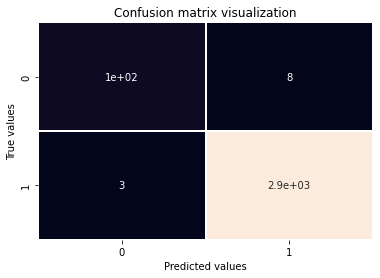

In [397]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred,labels = [1,0]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,lw=2,cbar=False) 
plt.ylabel("True values")
plt.xlabel("Predicted values")
plt.title("Confusion matrix visualization")
plt.show()

                      

In [398]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9980879541108986

In [399]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       111
           1       1.00      1.00      1.00      2874

    accuracy                           1.00      2985
   macro avg       0.98      0.96      0.97      2985
weighted avg       1.00      1.00      1.00      2985



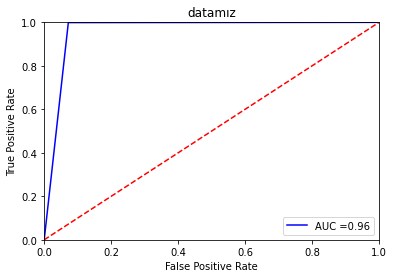

In [400]:
import sklearn.metrics as metrics 
fpr, tpr, threshold =metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr,tpr)

plt.title('datamız')
plt.plot(fpr,tpr, 'b' ,label ='AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1] , [0,1] , 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#WithFeatureSelection

In [486]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import KBinsDiscretizer

In [487]:
y = df["M6Class"]
X = df.drop(['TimeOfDay', 'RestaurantLongitude',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M2ExpectedDeliveryTime',
       'M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M6Class', 'M5Class',
       'M4NumberOfComments', 'M4LogNumberOfComments'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [489]:
clf=DecisionTreeClassifier()

In [490]:
clf=clf.fit(X_train,y_train)

In [491]:
y_pred=clf.predict(X_test)

In [492]:
print("Accuracy score %f" % metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.996315


[[2869    5]
 [   6  105]]


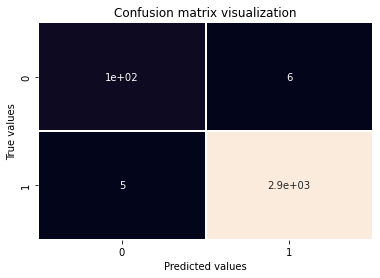

In [493]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred,labels = [1,0]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,lw=2,cbar=False) 
plt.ylabel("True values")
plt.xlabel("Predicted values")
plt.title("Confusion matrix visualization")
plt.show()

In [494]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.998086623760654

In [495]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       111
           1       1.00      1.00      1.00      2874

    accuracy                           1.00      2985
   macro avg       0.98      0.97      0.97      2985
weighted avg       1.00      1.00      1.00      2985



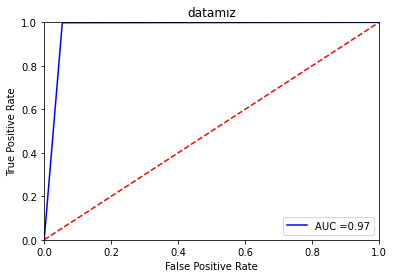

In [496]:
import sklearn.metrics as metrics 
fpr, tpr, threshold =metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr,tpr)

plt.title('datamız')
plt.plot(fpr,tpr, 'b' ,label ='AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1] , [0,1] , 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1]:
#TARGET M5
#auc

In [447]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import KBinsDiscretizer

In [448]:

#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(["M6Class","M5Class"] , axis = 1)
y = df["M5Class"]

In [449]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [451]:
clf=DecisionTreeClassifier()

In [452]:
clf=clf.fit(X_train,y_train)

In [453]:
y_pred=clf.predict(X_test)

In [454]:
print("Accuracy score %f" % metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.981910


[[  0   0]
 [  0 273]]


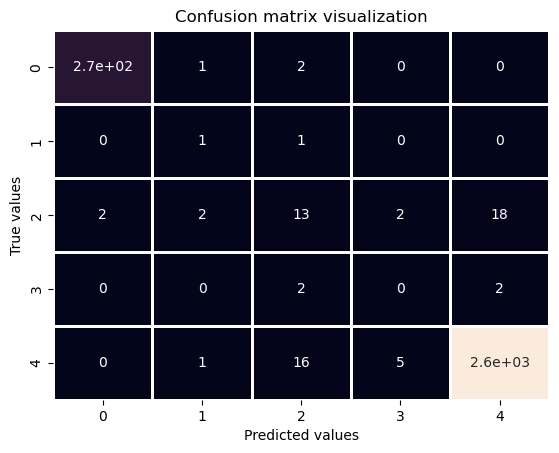

In [455]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred,labels = [1,0]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,lw=2,cbar=False) 
plt.ylabel("True values")
plt.xlabel("Predicted values")
plt.title("Confusion matrix visualization")
plt.show()


In [458]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       276
         2.0       0.20      0.50      0.29         2
         3.0       0.38      0.35      0.37        37
         4.0       0.00      0.00      0.00         4
         5.0       0.99      0.99      0.99      2666

    accuracy                           0.98      2985
   macro avg       0.51      0.57      0.53      2985
weighted avg       0.98      0.98      0.98      2985



In [460]:
#withfeautureselection

In [461]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import KBinsDiscretizer

In [462]:
#sımdı target olarak m5 i secmeye calısıyoruz.
X = df.drop(['M6Class','M5Class','TimeOfDay',
       'TrafficMorning', 'TrafficNoon', 'TrafficAfternoon', 'M1DeliveryCost','M3MinChargeForOrdering', 'M3LogMinChargeForOrdering','M4NumberOfComments'] , axis = 1)
y = df["M5Class"]

In [463]:
# Convert the continuous target variable into a categorical variable
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.values.reshape(-1, 1))

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [465]:
clf=DecisionTreeClassifier()

In [466]:
clf=clf.fit(X_train,y_train)

In [467]:
y_pred=clf.predict(X_test)

In [468]:
print("Accuracy score %f" % metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.982580


[[  0   0]
 [  0 275]]


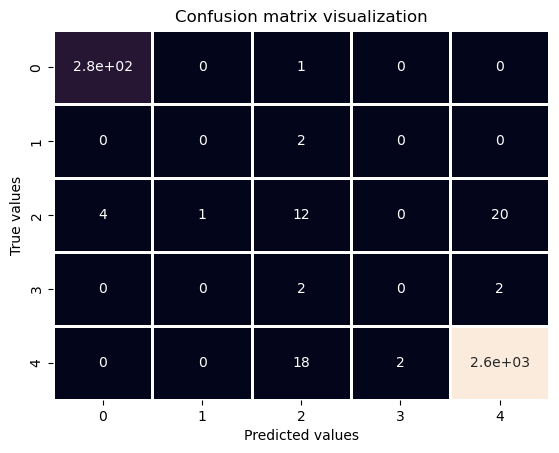

In [469]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred,labels = [1,0]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,lw=2,cbar=False) 
plt.ylabel("True values")
plt.xlabel("Predicted values")
plt.title("Confusion matrix visualization")
plt.show()

In [470]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       276
         2.0       0.00      0.00      0.00         2
         3.0       0.34      0.32      0.33        37
         4.0       0.00      0.00      0.00         4
         5.0       0.99      0.99      0.99      2666

    accuracy                           0.98      2985
   macro avg       0.46      0.46      0.46      2985
weighted avg       0.98      0.98      0.98      2985

